In [1]:
import sys
import os
sys.path.insert(0, '/home/groups/rwr/alpv95/tracksml')
from ipopt import minimize_ipopt
import pickle
import numpy as np
import cvxpy as cp
import ipopt
from util.methods import *
# from matplotlib import rcParams
import matplotlib.pyplot as plt
plt.style.use('/home/groups/rwr/alpv95/util/plot.mplstyle')
import torch
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from util.net_test import *
from astropy.io import fits
from astropy import stats
import scipy
import pandas as pd
from scipy.signal import savgol_filter
from scipy.optimize import minimize_scalar
from sklearn.metrics import confusion_matrix
from util.plot_confusion import plot_confusion_matrix_from_data
from scipy.special import i0,i1
from scipy.optimize import minimize_scalar


%matplotlib inline
home_dir = '/home/groups/rwr/alpv95/tracksml/'

In [2]:
with open(home_dir + "fom_pol_big_train___bigEpol2__ensemble_paper.pickle", "rb") as file:
    A = pickle.load(file)

In [7]:
with open(home_dir + "fom_pol_big_train___flat_all_pol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "review_unpol_train___flat_all_unpol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [29]:
with open(home_dir + "fom_pol_big_train___pl1_pol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "fom_pol_big_train___pl1_weight_pol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [6]:
with open(home_dir + "fom_pol_big_train___flat_weight_pol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "fom_pol_big_train___flat_weightE_pol__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [84]:
with open(home_dir + "tailvpeak733_test___tailvpeak_reg__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [2]:
with open(home_dir + "733tailvpeak3_test___tailvpeak3__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [89]:
with open(home_dir + "test733_pol_train___iclr_bess__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [7]:
with open(home_dir + "test733_pol_train___iclr__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [3]:
with open(home_dir + "test733_pol_train___iclr_bess2__ensemble.pickle", "rb") as file:
    A = pickle.load(file)

In [5]:
# idx = -1
ecut = [(energies_sim <= 4.7)*(energies_sim >= 1.5)]

angs = circular_mean(angles[:,:,:][ecut],axis=(1,2))
print(len(angs))
errs = np.sqrt(np.mean(errors[:,:,:][ecut]**2,axis=(1,2)))
print("VM mdp, lambda: ", minimiseMDP(angs, weightVM(errs)))
print("PL mdp, lambda: ", minimiseMDP(angs, weightPL(errs)))
print("Gauss mdp, lambda: ", minimiseMDP(angs, weightGauss(errs)))

mu, _, Neff = weighted_stokes(angs, weightVM(errs), 1)
print('VM mdp: ', MDP99(Neff,mu))
mu, _, Neff = weighted_stokes(angs, weightPL(errs), 1)
print('PL mdp: ', MDP99(Neff,mu))
mu, _, Neff = weighted_stokes(angs, weightGauss(errs), 1)
print('Gauss mdp: ', MDP99(Neff,mu))
mu, _, Neff = weighted_stokes(angs, None, 1)
print('None mdp: ', MDP99(Neff,mu))
print("Neff, mu: ", Neff,mu)

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


364560


/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


VM mdp, lambda:  (1.9203294106911062, 0.8998499004813136)
PL mdp, lambda:  (1.9283326643767922, 1.3355189528899682)
Gauss mdp, lambda:  (1.9306074881656081, 0.2741594578738787)
VM mdp:  1.9222957595955696
PL mdp:  1.9452888863669793
Gauss mdp:  2.1442161101698005
None mdp:  2.383963018144294
Neff, mu:  364560.0 0.29803911860651716


In [9]:
# idx = -1
ecut = [(energies_sim <= 4.7)*(energies_sim >= 1.5)]

angs = circular_mean(angles[:,:,:][ecut],axis=(1,2))
print(len(angs))
errs = np.sqrt(np.mean(errors[:,:,:][ecut]**2,axis=(1,2)))
print("VM mdp, lambda: ", minimiseMDP(angs, weightVM(errs)))
print("PL mdp, lambda: ", minimiseMDP(angs, weightPL(errs)))
print("Gauss mdp, lambda: ", minimiseMDP(angs, weightGauss(errs)))

mu, _, Neff = weighted_stokes(angs, weightVM(errs), 1)
print('VM mdp: ', MDP99(Neff,mu))
mu, _, Neff = weighted_stokes(angs, weightPL(errs), 1)
print('PL mdp: ', MDP99(Neff,mu))
mu, _, Neff = weighted_stokes(angs, weightGauss(errs), 1)
print('Gauss mdp: ', MDP99(Neff,mu))
mu, _, Neff = weighted_stokes(angs, None, 1)
print('None mdp: ', MDP99(Neff,mu))
print("Neff, mu: ", Neff,mu)

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


364560


/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


VM mdp, lambda:  (1.9812640342494112, 1.5677749165036499)
PL mdp, lambda:  (2.0146466874263234, 2.103137440874355)
Gauss mdp, lambda:  (1.9589939657731603, 0.6126517599400405)
VM mdp:  2.030604657123454
PL mdp:  2.1201157600071707
Gauss mdp:  2.06119622276025
None mdp:  2.3724360139950873
Neff, mu:  364560.0 0.29948720746393503


In [6]:
# idx = 4
ecut = [(energies_sim <= 7.7)*(energies_sim >= 2.2)]

angs = circular_mean(angles[:,:,:][ecut],axis=(1,2))
errs = np.sqrt(np.mean(errors[:,:,:][ecut]**2,axis=(1,2)))
# idxs = np.random.choice([i for i in range(len(angs))], 342456, replace=False)

# angs = angs[idxs]
# errs = errs[idxs]
print(len(angs))
print("VM mdp, lambda: ", minimiseMDP(angs, weightVM(errs)))
print("PL mdp, lambda: ", minimiseMDP(angs, weightPL(errs)))
print("Gauss mdp, lambda: ", minimiseMDP(angs, weightGauss(errs)))

mu, _, Neff = weighted_stokes(angs, weightVM(errs), 1)
print('VM mdp: ', MDP99(Neff,mu))
mu, _, Neff = weighted_stokes(angs, weightPL(errs), 1)
print('PL mdp: ', MDP99(Neff,mu))
mu, _, Neff = weighted_stokes(angs, weightGauss(errs), 1)
print('Gauss mdp: ', MDP99(Neff,mu))
mu, _, Neff = weighted_stokes(angs, None, 1)
print('None mdp: ', MDP99(Neff,mu))
print("Neff, mu: ", Neff,mu)

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


618840
VM mdp, lambda:  (1.0063597190098963, 1.2155036194297366)
PL mdp, lambda:  (1.0200693249937665, 1.2920382030259487)
Gauss mdp, lambda:  (1.0025233694947706, 0.49865884543657696)
VM mdp:  1.0093051967138333
PL mdp:  1.0255240688123708
Gauss mdp:  1.0544337187335258
None mdp:  1.1338053262410595
Neff, mu:  618840.0 0.48098287131814277


In [77]:
idx = 0
ecut = [(energies_sim <= 4.0)*(energies_sim >= 1.0)]

angs = circular_mean(angles[:,:,idx][ecut],axis=1)
errs = np.sqrt(np.mean(errors[:,:,idx][ecut]**2,axis=1))
idxs = np.random.choice([i for i in range(len(angs))], 342456, replace=False)

angs = angs[idxs]
errs = errs[idxs]
print(len(angs))
print("VM mdp, lambda: ", minimiseMDP(angs, weightVM(errs)))
print("PL mdp, lambda: ", minimiseMDP(angs, weightPL(errs)))
print("Gauss mdp, lambda: ", minimiseMDP(angs, weightGauss(errs)))

mu, _, Neff = weighted_stokes(angs, weightVM(errs), 1)
print('VM mdp: ', MDP99(Neff,mu))
mu, _, Neff = weighted_stokes(angs, weightPL(errs), 1)
print('PL mdp: ', MDP99(Neff,mu))
mu, _, Neff = weighted_stokes(angs, weightGauss(errs), 1)
print('Gauss mdp: ', MDP99(Neff,mu))
mu, _, Neff = weighted_stokes(angs, None, 1)
print('None mdp: ', MDP99(Neff,mu))
print("Neff, mu: ", Neff,mu)

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


342456
VM mdp, lambda:  (2.59148258042787, 1.9091319661052246)
PL mdp, lambda:  (2.647368538253975, 2.7177963665864504)
Gauss mdp, lambda:  (2.5426091935833584, 0.7235768356644983)
VM mdp:  2.7594374797920564
PL mdp:  2.9377742091889307
Gauss mdp:  2.623413980823529
None mdp:  3.3139100962678394
Neff, mu:  342456.0 0.2212148004233005


/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.6040947743173145, 1.5688477679552693)
331688


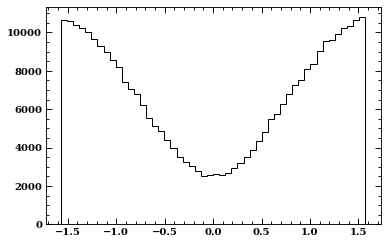

In [33]:
idx = 0
ecut = [(energies_sim <= 9.0)*(energies_sim >= 6.0)]
angs = circular_mean(angles[:,:,idx][ecut],axis=1)
plt.hist(angs,histtype="step")
print(stokes(angs))
print(len(angs))

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.630539758677384, 1.5706022640625037)
231951


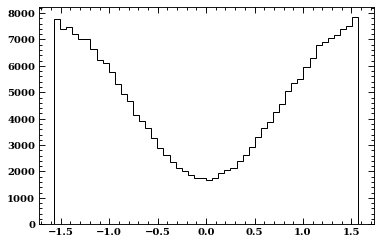

In [30]:
idx = 0
ecut = [(energies_sim <= 9.0)*(energies_sim >= 6.0)]
angs = np.random.choice(circular_mean(angles[:,:,idx][ecut],axis=1),231951,replace=False)
plt.hist(angs,histtype="step")
print(stokes(angs))
print(len(angs))

(0.4953793390950072, -1.5679083643858824)


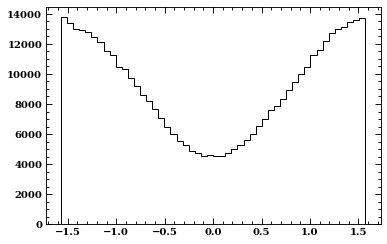

In [6]:
ecut= (energies_sim <= 7.0)*(energies_sim >= 3.0)
plt.hist(circular_mean(angles[:,:,:2],axis=(1,2))[ecut],histtype="step")
print(stokes(circular_mean(angles[:,:,:2],axis=(1,2))[ecut]))

In [13]:
min(np.sqrt(np.mean(errors[:,:,0]**2,axis=1))[(energies_sim <= 8.0)*(energies_sim >= 6.0)])

0.36786901456450105

(array([4.7730e+04, 7.7753e+04, 3.4724e+04, 2.0056e+04, 1.3096e+04,
        8.8000e+03, 6.3850e+03, 4.8640e+03, 3.9050e+03, 3.3440e+03,
        2.7560e+03, 2.4140e+03, 1.8150e+03, 1.3460e+03, 8.7200e+02,
        6.0800e+02, 3.6800e+02, 2.4800e+02, 1.9400e+02, 1.2900e+02,
        1.0000e+02, 1.0000e+02, 6.0000e+01, 6.0000e+01, 5.8000e+01,
        4.9000e+01, 4.2000e+01, 4.0000e+01, 4.6000e+01, 4.1000e+01,
        2.5000e+01, 3.2000e+01, 2.8000e+01, 1.8000e+01, 2.2000e+01,
        2.5000e+01, 2.2000e+01, 2.5000e+01, 1.2000e+01, 1.0000e+01,
        5.0000e+00, 2.0000e+00, 5.0000e+00, 1.0000e+00, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.36786901, 0.55953589, 0.75120277, 0.94286964, 1.13453652,
        1.32620339, 1.51787027, 1.70953714, 1.90120402, 2.09287089,
        2.28453777, 2.47620464, 2.66787152, 2.85953839, 3.05120527,
        3.24287214, 3.43453902, 3.62620589, 3.81787277, 4.00953964,
        4.20120652, 4.3928734 , 4.58454027, 4.

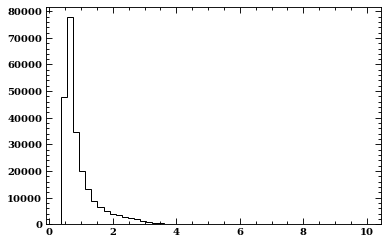

In [12]:
plt.hist(np.sqrt(np.mean(errors[:,:,0]**2,axis=1))[(energies_sim <= 8.0)*(energies_sim >= 6.0)],histtype="step")

In [ ]:
with open(home_dir + "data/expanded/fom_pol_big/train/" + "tracks_full.pickle", "rb") as f:
    tracks_all = pickle.load(f)

In [ ]:
PHA = []
for idx in range(len(tracks_all)):
    PHA.append(np.sum(tracks_all[idx][0,0,2,:].numpy()))
PHA = np.array(PHA)

In [2]:
angles_cum,_,_,_,_,energy_cum = torch.load(home_dir + "data/expanded/fom_pol_big/train/labels_full.pt")
# tail = tail.numpy().reshape(-1)

In [57]:
with open(home_dir + "fom_pol_big_train___fom_pol_big_tailvpeak3__ensemble.pickle", "rb") as file:
    A = pickle.load(file)
tails, _, _, _, _, _, _, _, \
_, _, _, _, _ = A
tails_shaped = np.mean(triple_angle_reshape(tails,4), axis=1)[:,3]

In [63]:
np.sum(tails_shaped[cut][PHA[cut]<22000] <= 0.5) / len(tails_shaped[cut][PHA[cut]<22000])

0.1255219847703267

Text(0,0.5,'$\\sigma$')

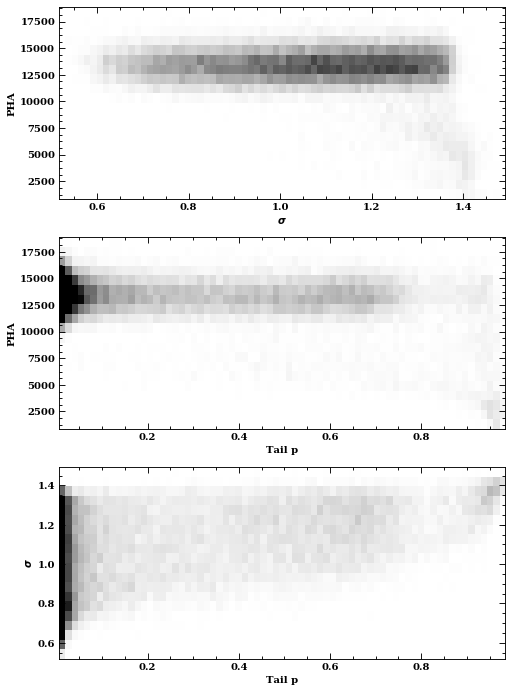

In [85]:
cut = (energy_cum[:,0].numpy() == 4.0) #* (energy_cum[:,0].numpy() <= 6.0)
vmax=250

fig, (ax1,ax2,ax3) = plt.subplots(figsize=(8,12),nrows=3)
ax1.hist2d(np.mean(errors,axis=(1,2))[cut], PHA[cut], bins=(71, 20), 
                  cmap=plt.cm.binary,vmax=vmax)
ax1.set_xlabel(r"$\sigma$")
ax1.set_ylabel(r"PHA")
ax2.hist2d(tails_shaped[cut], PHA[cut], bins=(71, 20), 
                  cmap=plt.cm.binary,vmax=vmax)
ax2.set_xlabel(r"Tail p")
ax2.set_ylabel(r"PHA")
ax3.hist2d(tails_shaped[cut], np.mean(errors,axis=(1,2))[cut], bins=(71, 20), 
                  cmap=plt.cm.binary,vmax=vmax)
ax3.set_xlabel(r"Tail p")
ax3.set_ylabel(r"$\sigma$") 

In [26]:
print(len(PHA[tail == 1]))
print(len(PHA[tail == 0]))

118238
1194738


(array([8.6000e+02, 2.2950e+03, 3.3210e+03, 4.0850e+03, 5.0790e+03,
        1.0024e+04, 2.2023e+04, 3.5146e+04, 4.2202e+04, 4.3556e+04,
        4.4332e+04, 4.3701e+04, 4.4016e+04, 4.3166e+04, 4.3344e+04,
        4.3406e+04, 4.2548e+04, 4.2137e+04, 4.1964e+04, 4.1483e+04,
        4.1481e+04, 4.0810e+04, 4.0373e+04, 4.0168e+04, 3.9691e+04,
        3.9114e+04, 3.8805e+04, 3.8139e+04, 3.7540e+04, 3.7278e+04,
        3.6069e+04, 3.5808e+04, 3.5012e+04, 3.3919e+04, 3.3009e+04,
        3.1348e+04, 2.9129e+04, 2.5508e+04, 2.0869e+04, 1.5804e+04,
        1.0817e+04, 6.6230e+03, 3.7780e+03, 1.8480e+03, 8.4500e+02,
        3.2600e+02, 1.2200e+02, 4.6000e+01, 6.0000e+00, 3.0000e+00]),
 array([  750.  ,  1493.72,  2237.44,  2981.16,  3724.88,  4468.6 ,
         5212.32,  5956.04,  6699.76,  7443.48,  8187.2 ,  8930.92,
         9674.64, 10418.36, 11162.08, 11905.8 , 12649.52, 13393.24,
        14136.96, 14880.68, 15624.4 , 16368.12, 17111.84, 17855.56,
        18599.28, 19343.  , 20086.72, 20830.44

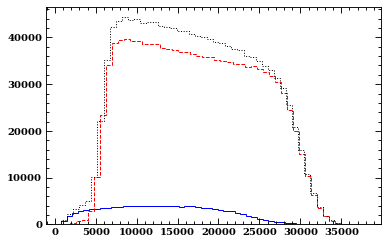

In [99]:
plt.figure(1)
n1,bins,_ = plt.hist(PHA[tail == 1],histtype='step',color="b")
n2,_,_ = plt.hist(PHA[tail == 0],histtype='step',color="r")
plt.hist(PHA,histtype='step')

(array([ 143.,  312.,  436.,  537.,  595.,  686.,  907., 1227., 1376.,
        1529., 1434., 1408., 1354., 1324., 1324., 1196., 1270., 1179.,
        1199., 1162., 1047., 1008.,  956.,  984.,  987.,  933.,  808.,
         783.,  724.,  708.,  688.,  621.,  628.,  561.,  463.,  486.,
         424.,  363.,  337.,  290.,  241.,  181.,  125.,  109.,   57.,
          18.,    8.,    2.,    3.,    3.]),
 array([  826.,  1525.,  2224.,  2923.,  3622.,  4321.,  5020.,  5719.,
         6418.,  7117.,  7816.,  8515.,  9214.,  9913., 10612., 11311.,
        12010., 12709., 13408., 14107., 14806., 15505., 16204., 16903.,
        17602., 18301., 19000., 19699., 20398., 21097., 21796., 22495.,
        23194., 23893., 24592., 25291., 25990., 26689., 27388., 28087.,
        28786., 29485., 30184., 30883., 31582., 32281., 32980., 33679.,
        34378., 35077., 35776.]),
 <a list of 1 Patch objects>)

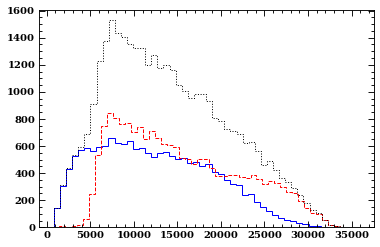

In [10]:
plt.figure(1)
n1,bins,_ = plt.hist(PHA[tail == 1],histtype='step',color="b")
n2,_,_ = plt.hist(PHA[tail == 0],histtype='step',color="r")
plt.hist(PHA,histtype='step')
# plt.ylim(0,10000)

(array([8.1800e+02, 2.4880e+03, 3.5780e+03, 4.8000e+03, 5.7900e+03,
        6.2560e+03, 6.3110e+03, 6.3740e+03, 6.4610e+03, 6.5060e+03,
        6.5600e+03, 6.8920e+03, 7.7080e+03, 9.1970e+03, 1.0532e+04,
        1.1511e+04, 1.1867e+04, 1.1675e+04, 1.1288e+04, 1.0913e+04,
        1.0370e+04, 1.0021e+04, 9.6530e+03, 9.6960e+03, 9.3440e+03,
        9.2110e+03, 8.9930e+03, 8.6420e+03, 8.6860e+03, 8.4270e+03,
        8.6520e+03, 8.2420e+03, 7.9960e+03, 7.7040e+03, 7.7510e+03,
        7.4080e+03, 7.3680e+03, 7.2600e+03, 7.0370e+03, 6.7770e+03,
        6.6040e+03, 6.4520e+03, 6.1470e+03, 5.7400e+03, 5.4590e+03,
        5.0850e+03, 5.1250e+03, 4.7620e+03, 4.7920e+03, 4.6470e+03,
        4.4000e+03, 4.0360e+03, 3.5880e+03, 2.9960e+03, 2.5330e+03,
        1.9400e+03, 1.4030e+03, 1.0170e+03, 6.6500e+02, 4.1400e+02,
        2.5500e+02, 1.4900e+02, 6.9000e+01, 3.4000e+01, 2.0000e+01,
        8.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([  727.        ,  1264.55882353,  1802.11764706,  2339.67647059

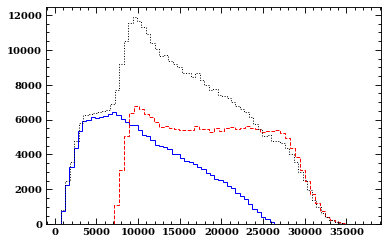

In [56]:
plt.figure(1)
n1,bins,_ = plt.hist(PHA[tail == 1],histtype='step',color="b")
n2,_,_ = plt.hist(PHA[tail == 0],histtype='step',color="r")
plt.hist(PHA,histtype='step',bins=68)


# plt.figure(2)
# plt.plot(bins[1:], n1/n2)
# plt.ylim(0,2)

In [7]:
energies_sim = np.reshape(energies_sim,[4,-1])
angles = np.reshape(angles,[4,-1])
angles_sim = np.reshape(angles_sim,[4,-1])

In [27]:
xor = (angles[1,:][(PHA >= 17000) * (PHA <= 22000)] >= 0.5) != (angles_sim[1,:][(PHA >= 17000) * (PHA <= 22000)])

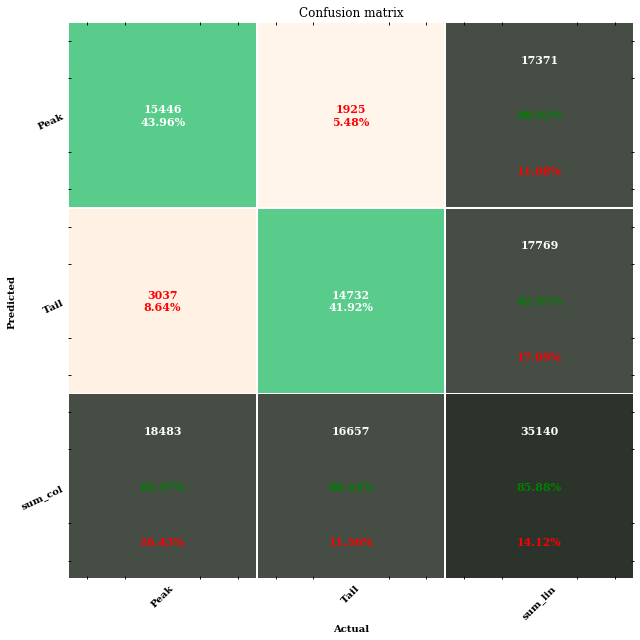

In [20]:
plot_confusion_matrix_from_data(angles_sim[2,:][(PHA >= 0) * (PHA <= 35000)], 
                                angles[2,:][(PHA >= 0) * (PHA <= 35000)] >= 0.5,
                                columns=["Peak","Tail"])

In [31]:
x = np.array([5228.,  365.,  260.,  256.,  192.,  161.,  161.,  156.,  157.,
         155.,  152.,  141.,  163.,  172.,  221.,  243.,  278.,  359.,
         526., 3820.])
sure = x[0] + x[-1]
unsure = np.sum(x[1:-1])
print(unsure/(sure+unsure))

0.31277533039647576


Text(0.5,0,'p(tail)')

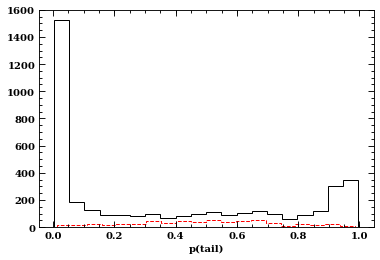

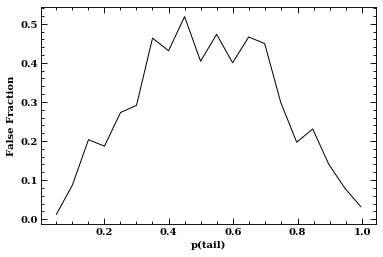

In [28]:
total,bins,_ = plt.hist(angles[1,:][(PHA >= 17000) * (PHA <= 22000)], histtype="step",bins=20)
false,_,_ = plt.hist(angles[1,:][(PHA >= 17000) * (PHA <= 22000)][xor], histtype="step",bins=20,color="r")
plt.xlabel("p(tail)",fontweight='bold')
# plt.hist(angles_sim[0,:][(PHA >= 7000) * (PHA <= 22000)], histtype="step",color="r")

plt.figure()
plt.plot(bins[1:],false/total)
plt.ylabel("False Fraction",fontweight="bold")
plt.xlabel("p(tail)",fontweight="bold")

In [ ]:
plt.cumsum()

In [26]:
len(angles[0,:][(PHA >= 8000) * (PHA <= 22000)][(angles[0,:][(PHA >= 8000) * (PHA <= 22000)] > 0.2)*(angles[0,:][(PHA >= 8000) * (PHA <= 22000)] < 0.8) ])

2074

In [27]:
2074/len(angles[0,:][(PHA >= 8000) * (PHA <= 22000)])

0.15752696339055142

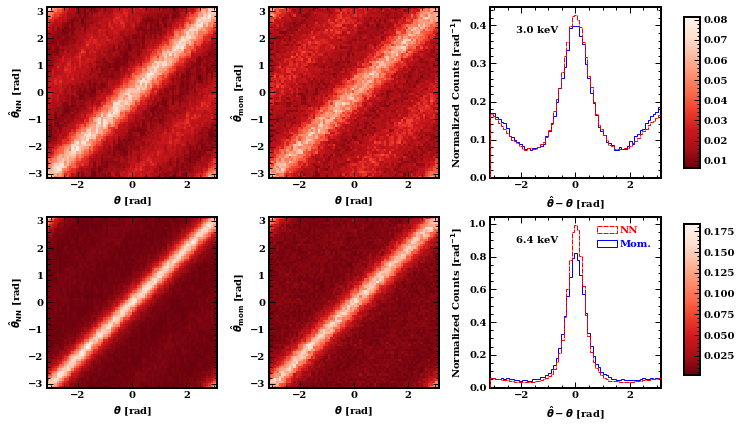

In [26]:
name = "confusion_matrix"
e = [(3.0,3.1),(6.4,6.5)]
fig, ax = plt.subplots(figsize=(11,7.0),ncols=3, nrows=2,gridspec_kw={"hspace":0.23,"wspace":0.3})
axs = [ax.flat[:3],ax.flat[3:]]
for i in range(2):
    e1,e2 = e[i]
    ax1,ax2,ax3 = axs[i]
    
    cut = (e1 <= energies_sim) * (energies_sim <= e2)

    sim = np.ndarray.flatten(np.tile(np.expand_dims(np.tile(np.expand_dims(angles_sim[cut],-1),3),-1),15))
    mom = np.ndarray.flatten(np.tile(np.expand_dims(np.tile(np.expand_dims(angles_mom[cut],-1),3),-1),15))
    
    trck = ax1.hist2d(sim,np.ndarray.flatten(angles[cut,:,:]), bins=70,cmap="Reds_r",normed=True)
#     ax1.axvline(a[0],color="k",ls="--")
#     ax1.axvline(a[1],color="k",ls="--")
    ax1.set_xlabel(r"$\theta$ [rad]",fontweight="bold")
    ax1.set_ylabel(r"$\hat{\theta}_{\rm NN}$ [rad]",fontweight="bold")

    ax2.hist2d(angles_sim[cut], angles_mom[cut], bins=70,cmap="Reds_r",normed=True)
#     ax2.axvline(a[0],color="k",ls="--")
#     ax2.axvline(a[1],color="k",ls="--")
    ax2.set_xlabel(r"$\theta$ [rad]",fontweight="bold")
    ax2.set_ylabel(r"$\hat{\theta}_{\rm mom}$ [rad]",fontweight="bold")
        
    histNN = []
    histMom = []
    for a1,a2 in pairwise(np.linspace(-np.pi,np.pi,300)):
        histNN.append(pi_pi(np.ndarray.flatten(angles[cut,:,:])[(sim <= a2) * (sim >= a1)] - (a1 + a2)/2 ))
        histMom.append(pi_pi(angles_mom[cut * (angles_sim <= a2) * (angles_sim >= a1)] - (a1 + a2)/2))

    ax3.hist(np.concatenate(histNN), bins=65,density=True,
             color="r",histtype="step",zorder=10,ls=(0, (5, 1)),label="NN")
    ax3.hist(np.concatenate(histMom), bins=65,density=True,
             color="b",histtype="step",label="Mom.")
#     ax3.axvline(a[0],color="k",ls="--")
#     ax3.axvline(a[1],color="k",ls="--")
    ax3.annotate(r"{} keV".format(e1), xy=(0.15, 0.85), xycoords='axes fraction')
    ax3.set_xlabel(r"$\hat{\theta} - \theta$ [rad]",fontweight="bold")
    ax3.set_ylabel(r"Normalized Counts [rad$^{-1}$]",fontweight="bold")
    ax3.set_xlim(-np.pi,np.pi)
    

    cb_ax = fig.add_axes([0.93, 0.56 - i*0.41, 0.02, 0.3])
    cbar = fig.colorbar(trck[3], cax=cb_ax)
    
leg = ax3.legend(loc = 1,)
for color, text in zip(["r","b"],leg.get_texts()):
    text.set_color(color)
plt.savefig("plots/" + name + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

## Energy Resolution

In [28]:
tracks_cum,angles_cum,_,_,_,_,energy_cum = torch.load(home_dir + "data/expanded/gen4_old/test/data_full.pt")
tracks_cum1,angles_cum,_,_,_,_,energy_cum1 = torch.load(home_dir + "data/expanded/gen4_old/val/data_full.pt")


In [29]:
pha = np.concatenate([np.sum(tracks_cum[:,0,0,:,:].numpy(),axis=(-2,-1)),
                    np.sum(tracks_cum1[:,0,0,:,:].numpy(),axis=(-2,-1))])
energy = np.concatenate([energy_cum[:,0].numpy(),energy_cum1[:,0].numpy()])

In [30]:
pha_list = []
energy_list = []
for e in np.sort(list(set(energy))):
    med = np.median(pha[energy == e])
    dev = stats.median_absolute_deviation(pha[energy == e])
    cut = (pha[energy == e] > med - 1.4*dev) * (pha[energy == e] < med + 1.4*dev)
    pha_list.extend(list(pha[energy == e][cut]))
    energy_list.extend([e]*len(list(pha[energy == e][cut])))
pha = np.array(pha_list)
energy = np.array(energy_list)

In [31]:
pha.shape

(63483,)

In [182]:
import cvxpy as cp

In [33]:
#Huber Regression
M = 0.25
m = len(pha)
n = 2
np.random.seed(1)
#q = 2*M*np.ones(m)
#P = np.eye(length)
A = np.stack([pha,np.ones(len(pha))]).T
b = energy

np.linalg.lstsq(A,b)
# Define and solve the CVXPY problem.
#u = cp.Variable(m)
#v = cp.Variable(m)
# x = cp.Variable(n)
# #constraints = [u+v >= A@x - b, -u-v <= A@x - b, u >= 0, u <= M*np.ones(m), v >= 0]

# prob = cp.Problem(cp.Minimize(cp.sum(cp.huber(A@x - b, M))))
# prob.solve()

# # Print result.
# print("\nThe optimal value is", prob.value)
# print("A solution x is")
# print(x.value)

/home/users/alpv95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # This is added back by InteractiveShellApp.init_path()


(array([0.00029483, 0.05735115]),
 array([3630.41562774]),
 2,
 array([4.45090362e+06, 8.84536856e+01]))

In [9]:
beta_ls = np.array([0.00029483, 0.05735115])

In [37]:
beta = np.array([0.00029353, 0.06787126])

In [4]:
with open(home_dir+ "data/expanded/fom_pol_big/train/" + "tracks_full.pickle", "rb") as f:
    tracks_all = pickle.load(f)

In [5]:
_,_,_,_,_,energy_cum = torch.load(home_dir + "data/expanded/fom_pol_big/train/labels_full.pt")

In [9]:
energy_test = energy_cum[:,0].numpy()

In [7]:
pha_test = []
for i in range(len(tracks_all)):
    pha_test.append(np.sum(tracks_all[i][0,0,2,:].numpy()))
pha_test = np.array(pha_test)

In [4]:
pha_test,energy_test = np.load("PHAs.npy")
beta_ls = np.array([0.00029483, 0.05735115])
energy_pred = pha_test*beta_ls[0] + beta_ls[1]

In [6]:
pha_test.shape

(2210400,)

(array([0.00607958, 0.00822531, 0.01215916, 0.01072867, 0.01251678,
        0.01466252, 0.0128744 , 0.01680825, 0.01072868, 0.01358964,
        0.01394726, 0.01645064, 0.01573537, 0.01645064, 0.01358964,
        0.02002686, 0.02002684, 0.01931162, 0.02145735, 0.02288782,
        0.02932502, 0.02610642, 0.03182845, 0.02503355, 0.03755033,
        0.04756375, 0.04363   , 0.0565043 , 0.06186863, 0.06437199,
        0.06401436, 0.08475665, 0.11586957, 0.18989736, 0.29146205,
        0.38515996, 0.53571797, 0.59079318, 0.58077836, 0.50532009,
        0.37156941, 0.24997788, 0.1308897 , 0.07009394, 0.0339741 ,
        0.01394733, 0.00250336, 0.00143049, 0.        , 0.00107287]),
 array([ 0.32151884,  0.52389604,  0.72627324,  0.92865044,  1.1310277 ,
         1.3334049 ,  1.5357821 ,  1.7381593 ,  1.9405365 ,  2.1429136 ,
         2.345291  ,  2.5476682 ,  2.7500453 ,  2.9524226 ,  3.1547997 ,
         3.357177  ,  3.559554  ,  3.7619314 ,  3.9643085 ,  4.1666856 ,
         4.369063  ,  4.57

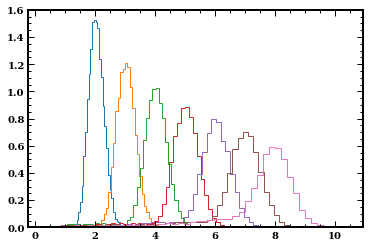

In [41]:
plt.hist(pha_test[energy_test == 2.0]*beta_ls[0] + beta_ls[1],density=True,bins=50,histtype="step")
plt.hist(pha_test[energy_test == 3.0]*beta_ls[0] + beta_ls[1],density=True,bins=50,histtype="step")
plt.hist(pha_test[energy_test == 4.0]*beta_ls[0] + beta_ls[1],density=True,bins=50,histtype="step")
plt.hist(pha_test[energy_test == 5.0]*beta_ls[0] + beta_ls[1],density=True,bins=50,histtype="step")
plt.hist(pha_test[energy_test == 6.0]*beta_ls[0] + beta_ls[1],density=True,bins=50,histtype="step")
plt.hist(pha_test[energy_test == 7.0]*beta_ls[0] + beta_ls[1],density=True,bins=50,histtype="step")
plt.hist(pha_test[energy_test == 8.0]*beta_ls[0] + beta_ls[1],density=True,bins=50,histtype="step")

In [107]:
def mad(sample,side=0):
    med = np.median(sample)
    res = sample - med 
    if side > 0:
        out = np.median(res[res >= 0])
    elif side < 0:
        out = abs(np.median(res[res <= 0]))
    else:
        out = np.median(abs(res))
    return out

In [6]:
def fwhm(sample):
    n, bins, _ = plt.hist(sample,bins=160,density=True)
    plt.clf()
    mx = np.max(n)
    return np.sum((n >= mx/2) * abs(bins[1] - bins[2]))

In [7]:
def mode(sample):
    n, bins, _ = plt.hist(sample,bins=160,density=True)
    plt.clf()
    mx = np.argmax(n)
    return bins[mx]

/home/users/alpv95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


Text(0.5,0,'E [keV]')

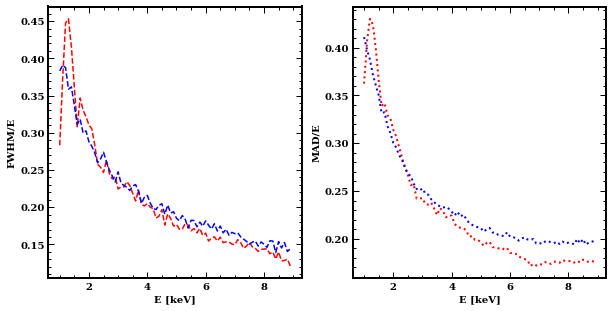

In [102]:
NN = []
NN_l1 = []
NN_mad = []
NN_med = []
mom = []
mom_l1 = []
mom_mad = []
mom_med = []
for e in np.sort(list(set(energies_sim))):
    if e <= 2.5:
        side = 0
    elif e <= 4.5:
        side = -1
    else:
        side= 0
    cut_nn = (energies_sim == e)
    NN.append(np.sqrt(np.mean((energies[cut_nn] - energies_sim[cut_nn])**2)))
    NN_l1.append(np.sqrt(np.mean(abs(energies[cut_nn] - energies_sim[cut_nn]))))
    if e >= 6.6:
        hist = highE_correct(energies[cut_nn])
        hist = hist[~np.isnan(hist)]
    elif e <= 1.5:
        hist = lowE_correct(energies[cut_nn])
        hist = hist[~np.isnan(hist)]
    else:
        hist = energies[cut_nn]
    NN_med.append(3.46 * mad(hist,side) / e)
    NN_mad.append(fwhm(hist)/e)
    #NN_med.append(mode(energies[cut_nn]))
    
for e in np.sort(list(set(energy_test))):
    if e <= 2.5:
        side = 0
    elif e <= 4.5:
        side = -1
    else:
        side= 0
    cut_mom = (energy_test == e)
    mom.append(np.sqrt(np.mean((energy_pred[cut_mom] - energy_test[cut_mom])**2)))
    mom_l1.append(np.sqrt(np.mean(abs(energy_pred[cut_mom] - energy_test[cut_mom]))))
    mom_med.append(3.46 * mad(energy_pred[cut_mom],side) / e)
    mom_mad.append(fwhm(energy_pred[cut_mom])/e)
    #mom_med.append(mode(energy_pred[cut_mom]))
    
fig,(ax3,ax4) = plt.subplots(figsize=(10,5),ncols=2)
# ax1.plot(np.sort(list(set(energies_sim))), NN,'r')
# ax1.plot(np.sort(list(set(energy_test))), mom, 'b')
# ax1.set_ylabel("RMSE",fontweight="bold")
# ax1.set_xlabel("E [keV]",fontweight="bold")

# ax2.plot(np.sort(list(set(energies_sim))), NN_l1,'r')
# ax2.plot(np.sort(list(set(energy_test))), mom_l1, 'b')
# ax2.set_ylabel("RMAE",fontweight="bold")
# ax2.set_xlabel("E [keV]",fontweight="bold")

ax3.plot(np.sort(list(set(energies_sim))), NN_mad,'r--')
ax3.plot(np.sort(list(set(energy_test))), mom_mad, 'b--')
ax3.set_ylabel("FWHM/E",fontweight="bold")
ax3.set_xlabel("E [keV]",fontweight="bold")

ax4.plot(np.sort(list(set(energies_sim))), NN_med,'r:', linewidth=2)
ax4.plot(np.sort(list(set(energy_test))), mom_med, 'b:', linewidth=2)
#ax4.plot(np.sort(list(set(energy_test))), np.sort(list(set(energy_test))), 'k')
ax4.set_ylabel("MAD/E",fontweight="bold")
ax4.set_xlabel("E [keV]",fontweight="bold")

In [43]:
def highE_correct(pred):
    """
    E >= 6.8
    """
    e2,e1,e0 = -0.08390193750064412, 1.1390039077295535, -3.8988187828682386
    return (-(e1+1) + np.sqrt((e1+1)**2 - 4*e2*(e0 - pred))) / (2 * e2)

In [44]:
def lowE_correct(pred):
    """
     1.03 <= E <= 1.4
    """
    e2,e1,e0 = 0.4810610473959431, -1.4948961933283693, 1.1567350041938906
    return (-(e1+1) + np.sqrt((e1+1)**2 - 4*e2*(e0 - pred))) / (2 * e2)

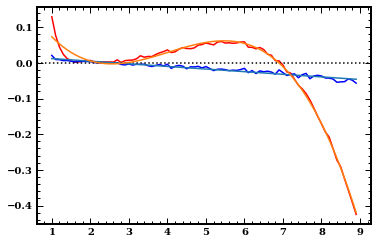

In [10]:
medians = []
medians_mom = []
for e in E:
    cut_nn = (energies_sim == e)
    med = np.median(energies[cut_nn])
    dev = stats.median_absolute_deviation(energies[cut_nn])
    cut_q = (energies[cut_nn] > med - 3.5*dev) * (energies[cut_nn] < med + 3.5*dev)
    medians.append(np.median(energies[cut_nn][cut_q]) - e)
    
    cut_mom = (energy_test == e)
    med = np.median(energy_pred[cut_mom])
    dev = stats.median_absolute_deviation(energy_pred[cut_mom])
    cut_q = (energy_pred[cut_mom] > med - 3.5*dev) * (energy_pred[cut_mom] < med + 3.5*dev)
    medians_mom.append(np.median(energy_pred[cut_mom][cut_q]) - e)
    
plt.plot(E,medians,"r")
plt.plot(E,medians_mom,"b")
plt.axhline(0,ls=":",color="k")
e1, e0 = np.polyfit(E,medians_mom,1)
plt.plot(E,e0 + e1*E)
e3, e2, e1, e0 = np.polyfit(E,medians,3)
plt.plot(E,e0 + e1*E + e2*E**2 + e3*E**3)

/home/users/alpv95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


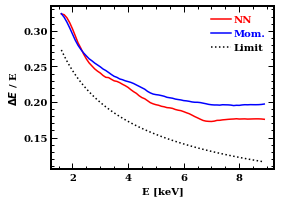

In [17]:
fig, ax1 = plt.subplots(figsize=(4.0,3.0))
NN = []
mom = []
for e in np.sort(list(set(energies_sim)))[6:]:
    cut_nn = (energies_sim == e)
    if e <= 4.5:
        side = -1
    else:
        side= 0
        
    if e >= 6.6:
        hist = highE_correct(energies[cut_nn])
        hist = hist[~np.isnan(hist)]
    elif e <= 1.5:
        hist = lowE_correct(energies[cut_nn])
        hist = hist[~np.isnan(hist)]
    else:
        hist = energies[cut_nn]

    NN.append(mad(hist,side))
    mom.append(mad(energy_pred[cut_nn],side))
ax1.plot(np.sort(list(set(energy_test)))[6:], 3.455*savgol_filter(NN[:] / np.sort(list(set(energy_test)))[6:],11,3),"r",label="NN",linewidth=1.5,)
ax1.plot(np.sort(list(set(energy_test)))[6:], 3.455*savgol_filter(mom[:] / np.sort(list(set(energy_test)))[6:],11,3),"b",label="Mom.",linewidth=1.5,)
ax1.plot(np.sort(list(set(energy_test)))[6:],0.1*3.455*np.sort(list(set(energy_test)))[6:]**0.5 / np.sort(list(set(energy_test)))[6:],color='k',linestyle=':', label="Limit")
ax1.set_xlabel("E [keV]",fontweight="bold")
ax1.set_ylabel(r"$\Delta E$ / E",fontweight="bold")
leg = ax1.legend(loc = 1,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
plt.savefig("plots/" + "energy_mad" + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

/home/users/alpv95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


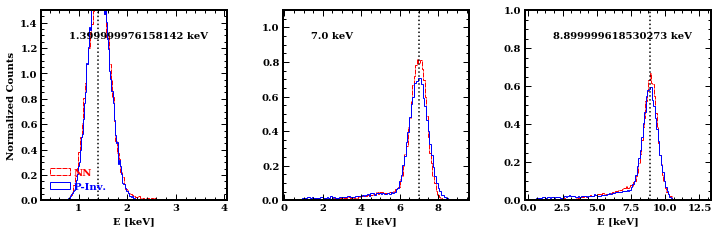

In [92]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,3.5),ncols=3,gridspec_kw={"wspace":0.3})#sharex=True,gridspec_kw={"hspace":0.0})
#for jdx,ax in enumerate(ax.flat):

e = E[4]
cut_nn = (energies_sim == e)
x = lowE_correct(energies[cut_nn])
ax1.hist(x[~np.isnan(x)],bins=100, density=True,color="r", label="NN",histtype="step",ls=(0, (5, 1)))
ax1.hist(energy_pred[cut_nn],bins=100, density=True,color="b",alpha=1,histtype="step", label="P-Inv.")
ax1.set_xlabel(r"E [keV]",fontweight="bold")
ax1.set_ylabel(r"Normalized Counts",fontweight="bold")
ax1.axvline(e,color='k',linestyle=':')
ax1.set_ylim(0.0,1.5)
ax1.annotate(r"{} keV".format(e), xy=(0.15, 0.85), xycoords='axes fraction')
leg = ax1.legend(loc = 3)
# leg = ax1.legend(loc = 1,)
# for line, text in zip(leg.get_lines(), leg.get_texts()):
#     text.set_color(line.get_color())

e = 7.0
cut_nn = (energies_sim == e)
ax2.hist(energies[cut_nn],bins=100, density=True,color="r",histtype="step",ls=(0, (5, 1)))
ax2.hist(energy_pred[cut_nn],bins=100, density=True,color="b",alpha=1,histtype="step")
ax2.set_xlabel(r"E [keV]",fontweight="bold")
#ax2.set_ylabel(r"Normalized Counts",fontweight="bold")
ax2.axvline(e,color='k',linestyle=':')
ax2.set_ylim(0.0,1.1)
ax2.annotate(r"{} keV".format(e), xy=(0.15, 0.85), xycoords='axes fraction')

e = E[-1]
cut_nn = (energies_sim == e)
x = highE_correct(energies[cut_nn])
ax3.hist(x[~np.isnan(x)],bins=100, density=True,color="r",histtype="step",ls=(0, (5, 1)))
ax3.hist(energy_pred[cut_nn],bins=100, density=True,color="b",alpha=1,histtype="step")
ax3.set_xlabel(r"E [keV]",fontweight="bold")
ax3.axvline(e,color='k',linestyle=':')
ax3.set_ylim(0.0,1.0)
ax3.annotate(r"{} keV".format(e), xy=(0.15, 0.85), xycoords='axes fraction')
#USE FWHM, can fit gaussian
#ax3.set_ylabel(r"Normalized Counts",fontweight="bold")

for color, text in zip(["r","b"],leg.get_texts()):
    text.set_color(color)

#plt.savefig("plots/" + "energy_ehist" + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

# Energy Tail vs Peak

In [9]:
input_file = home_dir + "data/gen4_pol3/gen4_4p0_recon.fits"

with fits.open(input_file, memmap=False) as hdu:
    sim_data = hdu[3].data

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        4.0000e+00, 0.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        6.0000e+00, 2.2800e+02, 2.7380e+03, 1.0732e+04, 1.1988e+04,
        3.8530e+03, 3.7400e+02, 1.0000e+01, 5.0000e+00, 6.0000e+00,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 5.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([-7.11587816, -6.82057379, -6.52526942, -6.22996505, -5.93466069,
        -5.63935632, -5.34405195, -5.04874758, -4.75344321, -4.45813884,
        -4.16283447, -3.8675301 , -3.57222574, -3.27692137, -2.981617  ,
        -2.68631263, -2.39100826, -2.09570389, -1.80039952, -1.50509515,
        -1.20979079, -0.91

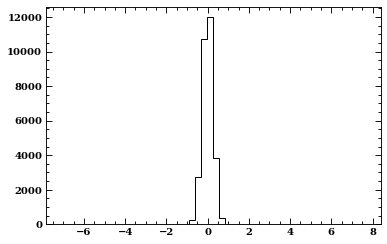

In [12]:
plt.hist(sim_data['ABS_Y'],histtype='step')

In [27]:
sim_data.shape

(70000,)

In [38]:
def mse(theta_hat,theta):
    return np.sqrt(np.sum((np.cos(2*theta) - np.cos(2*theta_hat))**2 + (np.sin(2*theta) - np.sin(2*theta_hat))**2) / len(theta))

In [39]:
input_file = home_dir + "data/training733/gen4_9p0_recon.fits"

with fits.open(input_file, memmap=False) as hdu:
    data = hdu[1].data
with fits.open(input_file.replace('_recon',''), memmap=False) as hdu:
#     print(hdu[3].header)
    sim_data = hdu[3].data
    
cut = (data['NUM_CLU'] > 0)*(abs(data['BARX']) < 6.3)*(abs(data['BARY']) < 6.3)
cut *= (sim_data['PE_PHI'] != 0.0) #to remove bump in training data
moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]
Z = sim_data["ABS_Z"][cut]
PHA = data["PHA"][cut]
X = data['PIX_X'][cut]
Y = data['PIX_Y'][cut]
C = data['PIX_PHA'][cut]
THETA = sim_data['PE_PHI'][cut]
THETA_HAT = data['DETPHI'][cut]
print(mse(THETA,THETA_HAT), " Total MSE")

0.9174560240581946  Total MSE


(array([0.00011484, 0.00045938, 0.00011484, 0.00022969, 0.00022969,
        0.        , 0.        , 0.        , 0.00022969, 0.        ,
        0.00022969, 0.00045938, 0.00011484, 0.00022969, 0.00011484,
        0.00034453, 0.00022969, 0.00022969, 0.00034453, 0.00068907,
        0.00080391, 0.00045938, 0.00022969, 0.00011484, 0.        ,
        0.00034453, 0.00034453, 0.00022969, 0.00022969, 0.00022969,
        0.00022969, 0.00022969, 0.00011484, 0.        , 0.00034453,
        0.00011484, 0.00022969, 0.00022969, 0.        , 0.00011484,
        0.00011484, 0.        , 0.        , 0.00011484, 0.        ,
        0.00034453, 0.00011484, 0.        , 0.        , 0.00011484]),
 array([2499.  , 2601.44, 2703.88, 2806.32, 2908.76, 3011.2 , 3113.64,
        3216.08, 3318.52, 3420.96, 3523.4 , 3625.84, 3728.28, 3830.72,
        3933.16, 4035.6 , 4138.04, 4240.48, 4342.92, 4445.36, 4547.8 ,
        4650.24, 4752.68, 4855.12, 4957.56, 5060.  , 5162.44, 5264.88,
        5367.32, 5469.76, 5572.2 ,

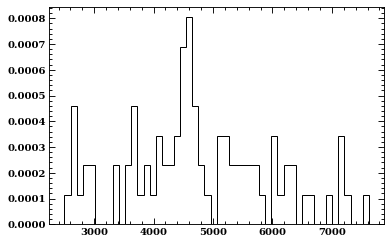

In [82]:
plt.hist(PHA[Z > 10.82],histtype="step",density=True)

In [61]:
len(THETA_HAT[(Z<0.9)])

1089

(array([0.16087746, 0.15784204, 0.11838153, 0.14266492, 0.20033835,
        0.1396295 , 0.14873577, 0.15177119, 0.16087746, 0.14266492,
        0.1821256 , 0.16391289, 0.2033734 , 0.2033734 , 0.1821256 ,
        0.17909001, 0.17909001, 0.19123179, 0.14570034, 0.15784212,
        0.16391289, 0.16694835, 0.14266496, 0.17909005, 0.13962953,
        0.1487358 , 0.11534613, 0.15480665, 0.1730192 , 0.18516086,
        0.19730264, 0.17301916, 0.15177126, 0.16087746, 0.14570034,
        0.16694847, 0.14873577, 0.14570034, 0.1912317 , 0.15784219,
        0.15784204, 0.14570034, 0.15480662, 0.14266492, 0.13355865,
        0.12748804, 0.13052323, 0.13659407, 0.17301916, 0.14266492]),
 array([-3.1392355e+00, -3.0136855e+00, -2.8881354e+00, -2.7625854e+00,
        -2.6370354e+00, -2.5114856e+00, -2.3859355e+00, -2.2603855e+00,
        -2.1348355e+00, -2.0092854e+00, -1.8837354e+00, -1.7581855e+00,
        -1.6326355e+00, -1.5070854e+00, -1.3815354e+00, -1.2559855e+00,
        -1.1304355e+00, -1.004

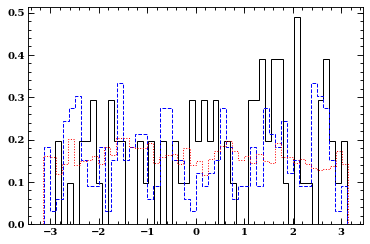

In [83]:
plt.hist(THETA_HAT[(Z>10.82)],histtype="step",density=True)
plt.hist(THETA_HAT[(Z<0.9)],histtype="step",density=True,color='b')
plt.hist(THETA_HAT[(Z>1)*(Z<10.7)][:2624],histtype="step",density=True,color='r')

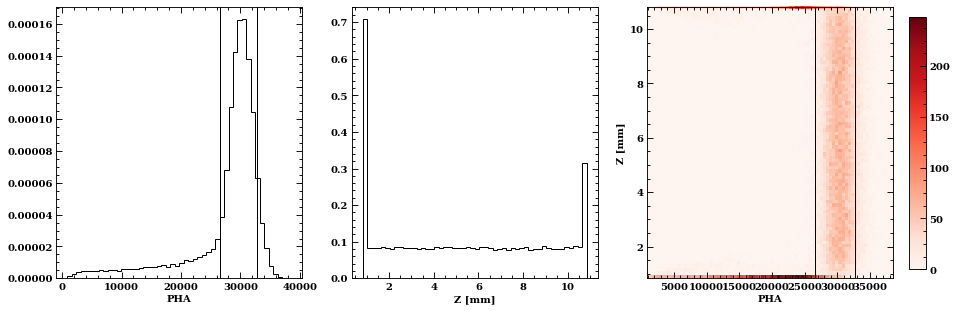

In [40]:
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(15,5),ncols=3)
ax2.hist(Z,density=True,histtype="step")
ax2.set_xlabel("Z [mm]")
ax1.hist(PHA,density=True,histtype="step")
ax1.set_xlabel("PHA")
im = ax3.hist2d(PHA,Z,bins=80, cmap="Reds")
ax3.set_xlabel("PHA")
ax3.set_ylabel("Z [mm]")
# ax3.axhline(10.7)
# ax3.axhline(1)
med = np.median(PHA)
ax3.axvline(med - 1.75*mad(PHA))
ax3.axvline(med + 1.75*mad(PHA))
ax1.axvline(med - 1.75*mad(PHA))
ax1.axvline(med + 1.75*mad(PHA))
cb_ax = fig.add_axes([0.915, 0.15, 0.015, 0.7])
cbar = fig.colorbar(im[3], cax=cb_ax)

1.3520014224975079  High Z
1.2929712619924285  Low Z
1.3993174024742605  Peak


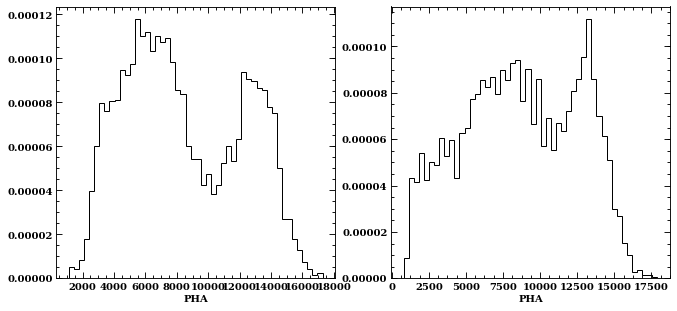

In [150]:
high = 10.7
low = 1
pha_cut = 19000

fig,(ax1,ax2,) = plt.subplots(figsize=(11,5),ncols=2)
ax1.hist(PHA[Z>high],density=True,histtype="step")
print(mse(THETA_HAT[(Z>high)*(PHA<pha_cut)],THETA[(Z>high)*(PHA<pha_cut)])," High Z")
ax1.set_xlabel("PHA")
ax2.hist(PHA[Z<low],density=True,histtype="step")
print(mse(THETA_HAT[(Z<low)*(PHA<pha_cut)],THETA[(Z<low)*(PHA<pha_cut)])," Low Z")
ax2.set_xlabel("PHA")
print(mse(THETA_HAT[(Z>low)*(Z<high)*(PHA>pha_cut)],THETA[(Z>low)*(Z<high)*(PHA>pha_cut)])," Peak")

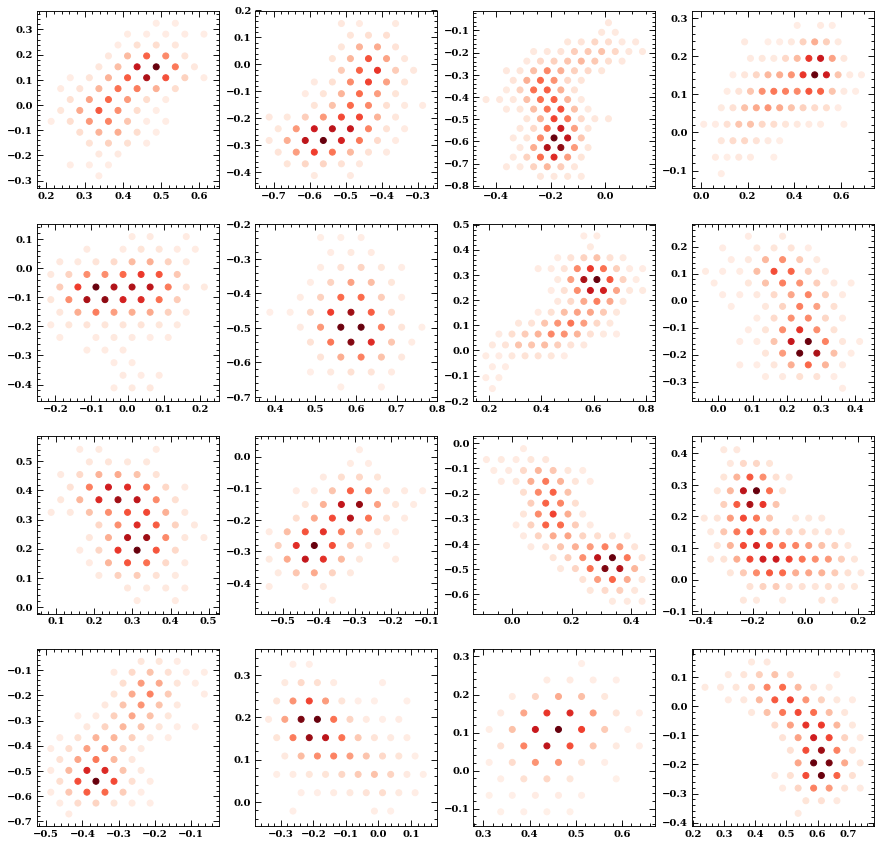

In [63]:
fig, axs = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
tail = (PHA > 18500) *(PHA < 19500) * (Z < 0.95) 

for tdx, ax in enumerate(axs.flat):
    ax.scatter(X[tail][tdx], Y[tail][tdx], c=C[tail][tdx], cmap="Reds"
               ,vmin=-60)

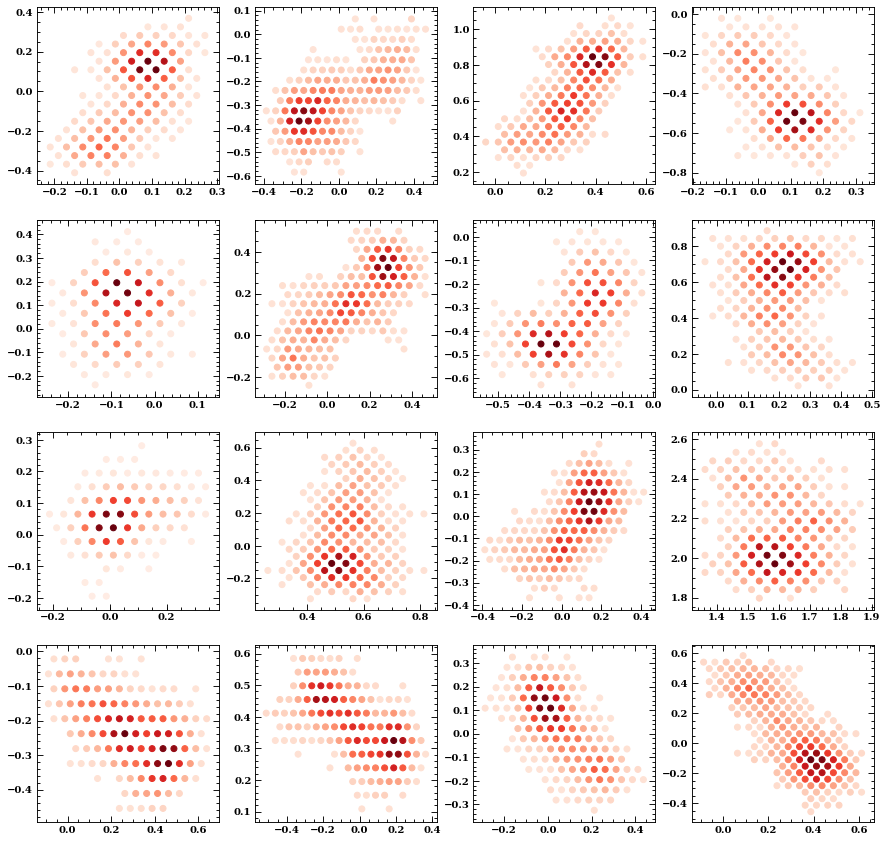

In [38]:
fig, axs = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
tail = (PHA > 18500) *(PHA < 19500) * (Z > 1) * (Z < 10.5) 

for tdx, ax in enumerate(axs.flat):
    ax.scatter(X[tail][tdx], Y[tail][tdx], c=C[tail][tdx], cmap="Reds"
               ,vmin=-60)

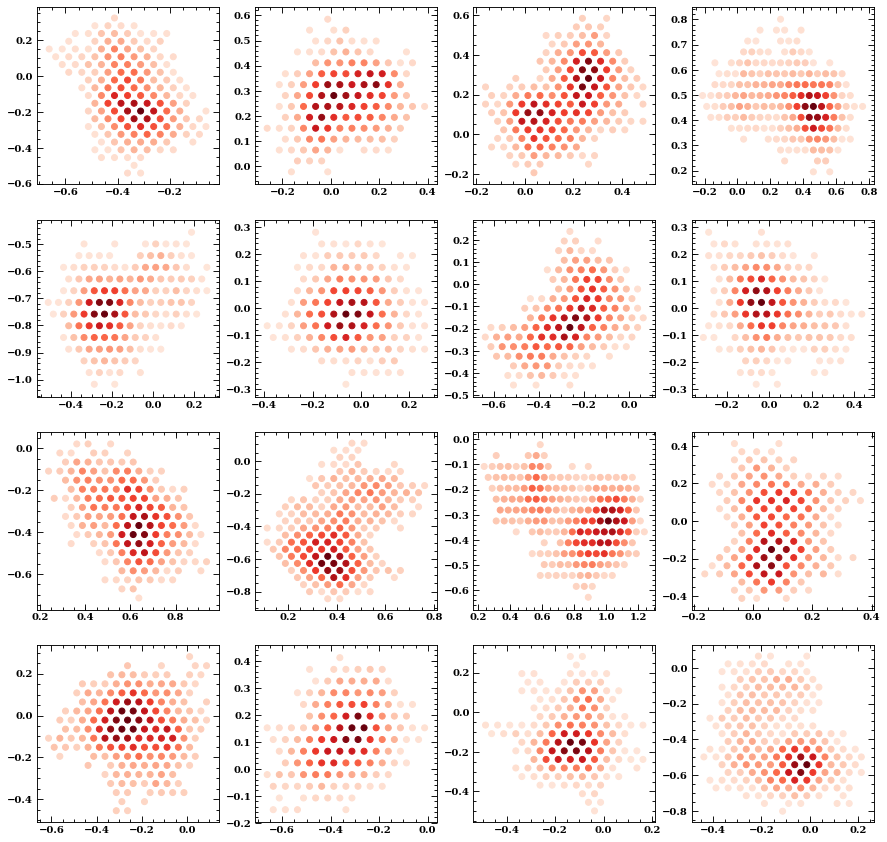

In [40]:
fig, axs = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
tail = (PHA > 18500) *(PHA < 19500) * (Z > 10.5) 

for tdx, ax in enumerate(axs.flat):
    ax.scatter(X[tail][tdx], Y[tail][tdx], c=C[tail][tdx], cmap="Reds"
               ,vmin=-60)

# Tracks

In [26]:
input_file = home_dir + "data/training733/gen4_9p5_recon.fits"
with fits.open(input_file, memmap=False) as hdu:
    #print(hdu[1].header)
    data1 = hdu[1].data
    print(data1["DETPHI"].shape)
with fits.open(input_file.replace('_recon',''), memmap=False) as hdu:
    #print(hdu[3].header)
    sim_data1 = hdu[3].data

(100000,)


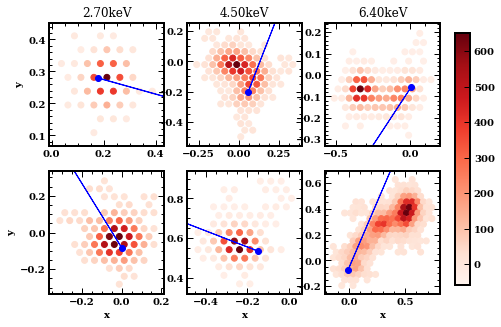

In [171]:
name = "hex6"
fig, ax = plt.subplots(figsize=(7,5),ncols=3,nrows=2)#sharex=True,gridspec_kw={"hspace":0.0})
for jdx,ax in enumerate(ax.flat):
    tdx = 4000 +jdx
    
    if jdx == 0 or jdx == 3:
        input_file = home_dir + "data/gen4/gen4_2p7_recon.fits"
    elif jdx == 1 or jdx == 4:
        input_file = home_dir + "data/gen4/gen4_4p5_recon.fits"
    elif jdx ==2 or jdx == 5:
        input_file = home_dir + "data/gen4/gen4_6p4_recon.fits"
#     elif jdx == 2:
#         input_file = home_dir + "real_data/5.89keV_unpol.lv1_recon.fits"
#     else:
#         input_file = home_dir + "real_data/2.70keV_unpol.lv1_recon.fits"
        
    with fits.open(input_file, memmap=False) as hdu:
        data = hdu[1].data
    with fits.open(input_file.replace('_recon',''), memmap=False) as hdu:
        sim_data = hdu[3].data
    cut = (data['NUM_CLU'] > 0)*(abs(data['BARX']) < 6.3)*(abs(data['BARY']) < 6.3)
    moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]
    mom_abs_pts = np.column_stack((data['DETX'],data['DETY']))[cut]
    bars = np.column_stack((data['BARX'],data['BARY']))[cut]
    
    if jdx < 2:
        cut *= (sim_data['PE_PHI'] != 0.0) #to remove bump in training data
        abs_pts = np.column_stack((sim_data['ABS_X'],sim_data['ABS_Y']))[cut]
        moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]
        
    
    #plt.subplot(2,2,jdx)
    ax.minorticks_on()
    trck = ax.scatter(data['PIX_X'][cut][tdx], data['PIX_Y'][cut][tdx], c=data['PIX_PHA'][cut][tdx], cmap="Reds"
               ,vmin=-60)
    
    if jdx == 0:
        ax.set_title("{:.2f}keV".format(2.7))
    if jdx == 1:
        ax.set_title("{:.2f}keV".format(4.5))
    if jdx == 2:
        ax.set_title("{:.2f}keV".format(6.4))
        
        
    if jdx > 2:
        ax.set_xlabel("x",fontweight="bold")
    if jdx == 0 or jdx == 3:
        ax.set_ylabel("y",fontweight="bold")
    
#     if jdx < 2:
#         #ax[jdx].colorbar()
    abs_scatter = np.column_stack((sim_data['ABS_X'],sim_data['ABS_Y']))[cut]
    mom_abs_scatter = np.column_stack((data['DETX'],data['DETY']))[cut]
    ax.scatter(abs_scatter[tdx,0],abs_scatter[tdx,1],c='b')
    #plt.title("{:.4f}".format(sim_data['PE_PHI'][cut][tdx]))
    ax.arrow(abs_scatter[tdx,0],abs_scatter[tdx,1],10 * np.cos(sim_data['PE_PHI'][cut][tdx]), 10 * np.sin(sim_data['PE_PHI'][cut][tdx]),color='b')
    #plt.scatter(mom_abs_scatter[tdx,0],mom_abs_scatter[tdx,1],c='g')

cb_ax = fig.add_axes([0.93, 0.15, 0.03, 0.7])
cbar = fig.colorbar(trck, cax=cb_ax)
plt.savefig("plots/" + name + ".pdf",format="pdf",pad_inches=1.0,bbox_inches="tight")
    

In [51]:
tracks_cum, angles_cum, moms_cum, mom_phis_cum, abs_cum, mom_abs_cum, energy_cum = torch.load(home_dir + "data/expanded/paper_plot/train/data_full.pt")

In [53]:
tracks_cum.shape

torch.Size([10000, 3, 2, 30, 30])

(0.125, 0.5368181818181819, 0.35227272727272724, 0.34318181818181814)


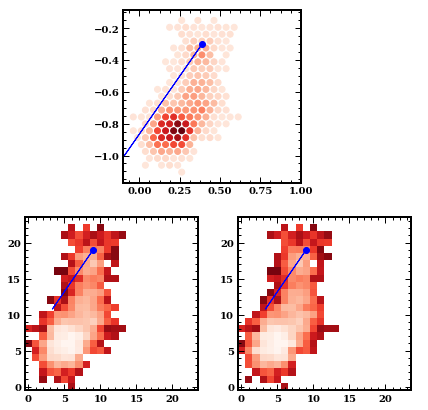

In [52]:
name = "square3"
fig, ax = plt.subplots(figsize=(7,7),ncols=2,nrows=2)#sharex=True,gridspec_kw={"hspace":0.0})
for jdx,ax in enumerate(ax.flat):
    if jdx == 1:
        ax.axis("off")
        continue
    if jdx == 0:
        print(ax.get_position().bounds)
        ax.set_position([0.125+0.2, 0.5368181818181819, 0.35227272727272724, 0.34318181818181814])
        tdx = 45138 +jdx

        input_file = home_dir + "data/gen4/gen4_6p4_recon.fits"

        with fits.open(input_file, memmap=False) as hdu:
            data = hdu[1].data
        with fits.open(input_file.replace('_recon',''), memmap=False) as hdu:
            sim_data = hdu[3].data
        cut = (data['NUM_CLU'] > 0)*(abs(data['BARX']) < 6.3)*(abs(data['BARY']) < 6.3)
        moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]
        mom_abs_pts = np.column_stack((data['DETX'],data['DETY']))[cut]
        bars = np.column_stack((data['BARX'],data['BARY']))[cut]


        cut *= (sim_data['PE_PHI'] != 0.0) #to remove bump in training data
        abs_pts = np.column_stack((sim_data['ABS_X'],sim_data['ABS_Y']))[cut]
        moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]


        #plt.subplot(2,2,jdx)
        ax.minorticks_on()
        trck = ax.scatter(data['PIX_X'][cut][tdx], data['PIX_Y'][cut][tdx], c=data['PIX_PHA'][cut][tdx], cmap="Reds"
                   ,vmin=-60)

    #     if jdx == 0:
    #         ax.set_title("{:.2f}keV".format(5.9))
    #     if jdx == 1:
    #         ax.set_title("{:.2f}keV".format(2.7))
    #     if jdx > 1:
    #         ax.set_xlabel("x",fontweight="bold")
    #     if jdx == 0 or jdx == 2:
    #         ax.set_ylabel("y",fontweight="bold")

    #     if jdx < 2:
        abs_scatter = np.column_stack((sim_data['ABS_X'],sim_data['ABS_Y']))[cut]
        mom_abs_scatter = np.column_stack((data['DETX'],data['DETY']))[cut]
        ax.scatter(abs_scatter[tdx,0],abs_scatter[tdx,1],c='b')
        ax.set_xlim(-0.1,1.0)
        #ax.set_title("$\epsilon = ${:.2f}".format(moms[tdx]))
        #ax.set_title("{:.2f}keV".format(energy_cum[60,0]))
        #plt.title("{:.4f}".format(sim_data['PE_PHI'][cut][tdx]))
        ax.arrow(abs_scatter[tdx,0],abs_scatter[tdx,1],10 * np.cos(sim_data['PE_PHI'][cut][tdx]), 10 * np.sin(sim_data['PE_PHI'][cut][tdx]),color='b')
        #plt.scatter(mom_abs_scatter[tdx,0],mom_abs_scatter[tdx,1],c='g')
        
    if jdx == 2:
        tdx = 6611 #35043
#         ax.subplot(3,2,2*jdx+1)
        ax.imshow(tracks_cum[tdx,0,0,:24,:24], norm=LogNorm(vmin=5,vmax=600),origin='lower', cmap="Reds_r")
        ax.scatter(abs_cum.numpy()[tdx,0,0,0],abs_cum.numpy()[tdx,0,0,1], c='b')
        #plt.scatter(mom_abs_cum.numpy()[tdx,0,0,0],mom_abs_cum.numpy()[tdx,0,0,1], c='g')
        ax.arrow(abs_cum.numpy()[tdx,0,0,0],abs_cum.numpy()[tdx,0,0,1],10 * np.cos(angles_cum[tdx,0]), 10 * np.sin(angles_cum[tdx,0]),color='b')
        #ax.set_title("$\epsilon = ${:.2f}".format(moms_cum[tdx,0]))
        #ax.set_title("{:.2f}keV".format(energy_cum[tdx,0]))
        ax.minorticks_on()
    elif jdx == 3:
        tdx = 6611
#     plt.subplot(3,2,2*jdx+2)
        ax.imshow(tracks_cum[tdx,0,1,:24,:24], norm=LogNorm(vmin=5,vmax=600), origin='lower', cmap="Reds_r")
        ax.scatter(abs_cum.numpy()[tdx,0,0,0],abs_cum.numpy()[tdx,0,0,1], c='b')
        ax.arrow(abs_cum.numpy()[tdx,0,0,0],abs_cum.numpy()[tdx,0,0,1],10 * np.cos(angles_cum[tdx,0]), 10 * np.sin(angles_cum[tdx,0]),color='b')
        #ax.set_title("$\epsilon = ${:.2f}".format(moms_cum[tdx,0]))
        ax.minorticks_on()
    #plt.scatter(abs_cum.numpy()[tdx,1,0],abs_cum.numpy()[tdx,1,1], c='r')
    #plt.scatter(mom_abs_cum.numpy()[tdx,1,0],mom_abs_cum.numpy()[tdx,1,1], c='g')
    #plt.arrow(abs_cum.numpy()[tdx,1,0],abs_cum.numpy()[tdx,1,1],10 * np.cos(angles_cum[tdx,1]), 10 * np.sin(angles_cum[tdx,1]),color='r')
    #plt.title("{:.2f}".format(energy_cum[tdx,1]))
        

#cb_ax = fig.add_axes([0.93, 0.15, 0.03, 0.7])
#cbar = fig.colorbar(trck, cax=cb_ax)
#plt.savefig("plots/" + name + ".pdf",format="pdf")

In [5]:
import matplotlib.gridspec as gridspec

In [13]:
angles_cum, moms_cum, mom_phis_cum, abs_cum, mom_abs_cum, energy_cum, _ = torch.load(home_dir + "data/expanded/paper_plot733/train/labels_full.pt")
with open(home_dir + "data/expanded/paper_plot733/train/tracks_full.pickle", "rb") as file:
        tracks_cum = pickle.load(file)

track = torch.stack([
    torch.stack([torch.sparse.FloatTensor(sparse[0,0,:2,:].long(), sparse[0,0,2,:], torch.Size([self.pixels,self.pixels])).to_dense(), 
                    torch.sparse.FloatTensor(sparse[0,1,:2,:].long(), sparse[0,1,2,:], torch.Size([self.pixels,self.pixels])).to_dense()]),
    torch.stack([torch.sparse.FloatTensor(sparse[1,0,:2,:].long(), sparse[1,0,2,:], torch.Size([self.pixels,self.pixels])).to_dense(), 
                    torch.sparse.FloatTensor(sparse[1,1,:2,:].long(), sparse[1,1,2,:], torch.Size([self.pixels,self.pixels])).to_dense()]),
    torch.stack([torch.sparse.FloatTensor(sparse[2,0,:2,:].long(), sparse[2,0,2,:], torch.Size([self.pixels,self.pixels])).to_dense(), 
                    torch.sparse.FloatTensor(sparse[2,1,:2,:].long(), sparse[2,1,2,:], torch.Size([self.pixels,self.pixels])).to_dense()])
])        
        


In [28]:
from IPython import display
import time

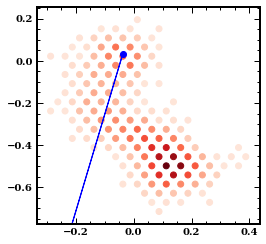

In [43]:
input_file = home_dir + "data/training733/gen4_6p4_recon.fits"

with fits.open(input_file, memmap=False) as hdu:
    data = hdu[1].data
with fits.open(input_file.replace('_recon',''), memmap=False) as hdu:
    sim_data = hdu[3].data
cut = (data['NUM_CLU'] > 0)*(abs(data['BARX']) < 6.3)*(abs(data['BARY']) < 6.3)
moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]


cut *= (sim_data['PE_PHI'] != 0.0) #to remove bump in training data

fig, ax = plt.subplots(figsize=(4,4))
for tdx in [13]:
    print(tdx)
    ax.cla()
    trck = ax.scatter(data['PIX_X'][cut][tdx], data['PIX_Y'][cut][tdx], c=data['PIX_PHA'][cut][tdx], cmap="Reds"
               ,vmin=-60)

    abs_scatter = np.column_stack((sim_data['ABS_X'],sim_data['ABS_Y']))[cut]
    mom_abs_scatter = np.column_stack((data['DETX'],data['DETY']))[cut]
    ax.scatter(abs_scatter[tdx,0],abs_scatter[tdx,1],c='b')
    #ax.set_xlim(-0.1,0.9)
    ax.arrow(abs_scatter[tdx,0],abs_scatter[tdx,1],10 * np.cos(sim_data['PE_PHI'][cut][tdx]), 10 * np.sin(sim_data['PE_PHI'][cut][tdx]),color='b')
    display.clear_output(wait=True)
    

In [39]:
sparse = tracks_cum[np.argmin(abs(moms_cum[:,0] - moms[13]))]
n_pixels = 50
track = torch.stack([
    torch.stack([torch.sparse.FloatTensor(sparse[0,0,:2,:].long(), sparse[0,0,2,:], torch.Size([n_pixels,n_pixels])).to_dense(), 
                    torch.sparse.FloatTensor(sparse[0,1,:2,:].long(), sparse[0,1,2,:], torch.Size([n_pixels,n_pixels])).to_dense()]),
    torch.stack([torch.sparse.FloatTensor(sparse[1,0,:2,:].long(), sparse[1,0,2,:], torch.Size([n_pixels,n_pixels])).to_dense(), 
                    torch.sparse.FloatTensor(sparse[1,1,:2,:].long(), sparse[1,1,2,:], torch.Size([n_pixels,n_pixels])).to_dense()]),
    torch.stack([torch.sparse.FloatTensor(sparse[2,0,:2,:].long(), sparse[2,0,2,:], torch.Size([n_pixels,n_pixels])).to_dense(), 
                    torch.sparse.FloatTensor(sparse[2,1,:2,:].long(), sparse[2,1,2,:], torch.Size([n_pixels,n_pixels])).to_dense()])
])    

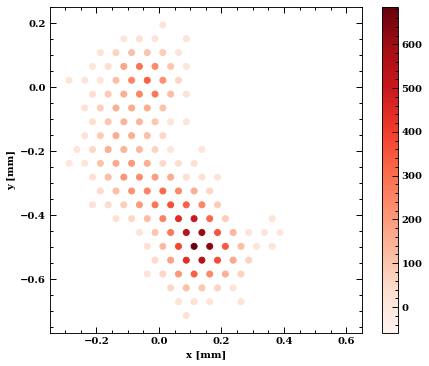

In [7]:
name = "Martin2"
fig, ax = plt.subplots(figsize=(7,6))
tdx = 13
input_file = home_dir + "data/training733/gen4_6p4_recon.fits"

with fits.open(input_file, memmap=False) as hdu:
    data = hdu[1].data
with fits.open(input_file.replace('_recon',''), memmap=False) as hdu:
    sim_data = hdu[3].data
cut = (data['NUM_CLU'] > 0)*(abs(data['BARX']) < 6.3)*(abs(data['BARY']) < 6.3)
moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]
cut *= (sim_data['PE_PHI'] != 0.0) #to remove bump in training data

trck = ax.scatter(data['PIX_X'][cut][tdx], data['PIX_Y'][cut][tdx], c=data['PIX_PHA'][cut][tdx], cmap="Reds"
           ,vmin=-60)

abs_scatter = np.column_stack((sim_data['ABS_X'],sim_data['ABS_Y']))[cut]
mom_abs_scatter = np.column_stack((data['DETX'],data['DETY']))[cut]
# ax.scatter(abs_scatter[tdx,0],abs_scatter[tdx,1],c='b')
ax.set_xlim(-0.35,0.65)
ax.set_xlabel("x [mm]",fontweight="bold")
ax.set_ylabel("y [mm]",fontweight="bold")
# ax.arrow(abs_scatter[tdx,0],abs_scatter[tdx,1],10 * np.cos(sim_data['PE_PHI'][cut][tdx]), 10 * np.sin(sim_data['PE_PHI'][cut][tdx]),color='b')
cbar = fig.colorbar(trck)
plt.savefig("plots/" + name + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

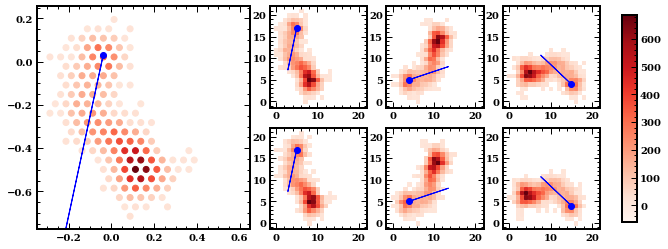

In [83]:
name = "square7"

fig = plt.figure(figsize=(10.1,4.1))
gs = gridspec.GridSpec(2, 5, hspace=0.2,wspace=0.2)
ax1 = fig.add_subplot(gs[:, :2])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])
ax4 = fig.add_subplot(gs[0, 4])
ax5 = fig.add_subplot(gs[1, 4])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[1, 3])

axs = [ax1,ax2,ax6,ax3,ax7,ax4,ax5]

for jdx,ax in enumerate(axs):
    if jdx == 0:
        tdx = 13 + jdx
        input_file = home_dir + "data/training733/gen4_6p4_recon.fits"

        with fits.open(input_file, memmap=False) as hdu:
            data = hdu[1].data
        with fits.open(input_file.replace('_recon',''), memmap=False) as hdu:
            sim_data = hdu[3].data
        cut = (data['NUM_CLU'] > 0)*(abs(data['BARX']) < 6.3)*(abs(data['BARY']) < 6.3)
        moms = (data['TRK_M2L'] / data['TRK_M2T'])[cut]
        cut *= (sim_data['PE_PHI'] != 0.0) #to remove bump in training data

        trck = ax.scatter(data['PIX_X'][cut][tdx], data['PIX_Y'][cut][tdx], c=data['PIX_PHA'][cut][tdx], cmap="Reds"
                   ,vmin=-60)
        
        abs_scatter = np.column_stack((sim_data['ABS_X'],sim_data['ABS_Y']))[cut]
        mom_abs_scatter = np.column_stack((data['DETX'],data['DETY']))[cut]
        ax.scatter(abs_scatter[tdx,0],abs_scatter[tdx,1],c='b')
        ax.set_xlim(-0.35,0.65)
        ax.arrow(abs_scatter[tdx,0],abs_scatter[tdx,1],10 * np.cos(sim_data['PE_PHI'][cut][tdx]), 10 * np.sin(sim_data['PE_PHI'][cut][tdx]),color='b')
        
        tdx = np.argmin(abs(moms_cum[:,0] - moms[13]))
        sparse = tracks_cum[tdx]
        n_pixels = 50
        track = torch.stack([
            torch.stack([torch.sparse.FloatTensor(sparse[0,0,:2,:].long(), sparse[0,0,2,:], torch.Size([n_pixels,n_pixels])).to_dense(), 
                            torch.sparse.FloatTensor(sparse[0,1,:2,:].long(), sparse[0,1,2,:], torch.Size([n_pixels,n_pixels])).to_dense()]),
            torch.stack([torch.sparse.FloatTensor(sparse[1,0,:2,:].long(), sparse[1,0,2,:], torch.Size([n_pixels,n_pixels])).to_dense(), 
                            torch.sparse.FloatTensor(sparse[1,1,:2,:].long(), sparse[1,1,2,:], torch.Size([n_pixels,n_pixels])).to_dense()]),
            torch.stack([torch.sparse.FloatTensor(sparse[2,0,:2,:].long(), sparse[2,0,2,:], torch.Size([n_pixels,n_pixels])).to_dense(), 
                            torch.sparse.FloatTensor(sparse[2,1,:2,:].long(), sparse[2,1,2,:], torch.Size([n_pixels,n_pixels])).to_dense()])
        ])    

        
    elif jdx ==1 or jdx==2:
        #ax.imshow(track[0,jdx-1,:24,:24], norm=LogNorm(vmin=5,vmax=600),origin='lower', cmap="Reds")
        ax.scatter(sparse[0,jdx-1,1,:],sparse[0,jdx-1,0,:],c=sparse[0,jdx-1,2,:],cmap="Reds",vmin=-60,marker="s",s=12.1)
        ax.set_xlim(-1.5,22)
        ax.set_ylim(-1.5,22)
        ax.scatter(abs_cum.numpy()[tdx,0,0,0],abs_cum.numpy()[tdx,0,0,1], c='b')
        ax.arrow(abs_cum.numpy()[tdx,0,0,0],abs_cum.numpy()[tdx,0,0,1],10 * np.cos(angles_cum[tdx,0]), 10 * np.sin(angles_cum[tdx,0]),color='b')
    elif jdx ==3 or jdx ==4:
        #ax.imshow(track[1,jdx-3,:24,:24], origin='lower', cmap="Reds")
        ax.scatter(sparse[1,jdx-3,1,:],sparse[1,jdx-3,0,:],c=sparse[1,jdx-3,2,:],cmap="Reds",vmin=-60,marker="s",s=12.1)
        ax.set_xlim(-1.5,22)
        ax.set_ylim(-1.5,22)
        ax.scatter(abs_cum.numpy()[tdx,1,0,0],abs_cum.numpy()[tdx,1,0,1], c='b')
        ax.arrow(abs_cum.numpy()[tdx,1,0,0],abs_cum.numpy()[tdx,1,0,1],10 * np.cos(angles_cum[tdx,1]), 10 * np.sin(angles_cum[tdx,1]),color='b')
    elif jdx ==5 or jdx==6:
        #ax.imshow(track[2,jdx-5,:24,:24], norm=LogNorm(vmin=5,vmax=600), origin='lower', cmap="Reds")
        ax.scatter(sparse[2,jdx-5,1,:],sparse[2,jdx-5,0,:],c=sparse[2,jdx-5,2,:],cmap="Reds",vmin=-60,marker="s",s=12.1)
        ax.set_xlim(-1.5,22)
        ax.set_ylim(-1.5,22)
        ax.scatter(abs_cum.numpy()[tdx,2,0,0],abs_cum.numpy()[tdx,2,0,1], c='b')
        ax.arrow(abs_cum.numpy()[tdx,2,0,0],abs_cum.numpy()[tdx,2,0,1],10 * np.cos(angles_cum[tdx,2]), 10 * np.sin(angles_cum[tdx,2]),color='b')
        
cb_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
cbar = fig.colorbar(trck, cax=cb_ax)
plt.savefig("plots/" + name + ".pdf",format="pdf",pad_inches=1.0,bbox_inches="tight")

In [175]:
def binary_search(dist, centre, ci=0.67, eps=1e-3):
    N = len(dist)
    bounds = [centre,centre]
    n = 0
    while n <= ci*N:
        upper = np.sum((dist <= bounds[1] + eps) * (dist >= bounds[1]))
        lower = np.sum((dist >= bounds[0] - eps) * (dist <= bounds[0]))
        if upper > lower or bounds[0] <= 0:
            bounds[1] += eps
        else:
            bounds[0] -= eps
        n = np.sum((dist >= bounds[0])*(dist <= bounds[1]))    
    return bounds[1]
    
    

# Bootstrap

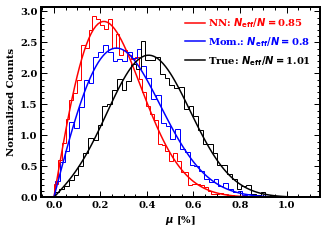

In [53]:
fig, ax2 = plt.subplots(figsize=(5,3.5))
N = 576215
colors = ["r","b","k"]
labels = ["NN","Mom.","True"]
adj = [1.07,1.00,1.01,0.85,0.80]
# for idx in range(3):
#     ax1.hist(mu0[:,idx]*100,bins=50,density=True,histtype="step",color=colors[idx], )
#     ax1.plot(dists[idx][0][:110],dists[idx][1][:110],color=colors[idx],
#              label=f"{labels[idx]}: $N_{{\mathrm{{eff}}}}/N = ${adj[idx]}")
    
for idx in range(2):
    ax2.hist(mu0[:,idx+3]*100,bins=50,density=True,histtype="step",color=colors[idx], )
    ax2.plot(dists[idx+3][0][:110],dists[idx+3][1][:110],color=colors[idx],
             label=f"{labels[idx]}: $N_{{\mathrm{{eff}}}}/N = ${adj[idx+3]}")
ax2.hist(mu0[:,2]*100,bins=50,density=True,histtype="step",color="k")
ax2.plot(dists[2][0][:110],dists[2][1][:110],color=colors[2],
        label=f"{labels[2]}: $N_{{\mathrm{{eff}}}}/N = ${adj[2]}")
# ax2.hist(mu0[:,1]*100,bins=50,density=True,histtype="step",color="b",ls="--")
# ax2.plot(dists[1][0][:110],dists[1][1][:110],color=colors[2],
#         label=f"{labels[1]}: $N_{{\mathrm{{eff}}}}/N = ${adj[1]}")

# leg1 = ax1.legend()
leg2 = ax2.legend()
# ax1.set_xlabel(r"$\mu$ [%]",fontweight="bold")
# ax1.set_ylabel(r"Normalized Counts",fontweight="bold")
ax2.set_xlabel(r"$\mu$ [%]",fontweight="bold")
ax2.set_ylabel(r"Normalized Counts",fontweight="bold")
# for line, text in zip(leg1.get_lines(), leg1.get_texts()):
#     text.set_color(line.get_color())
for line, text in zip(leg2.get_lines(), leg2.get_texts()):
    text.set_color(line.get_color())

plt.savefig("plots/" + "bootstrap_single" + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

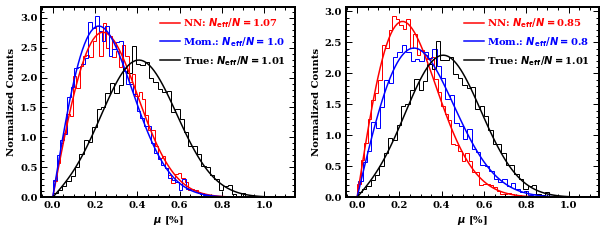

In [32]:
fig, (ax1,ax2) = plt.subplots(figsize=(10,3.5), ncols=2)
N = 576215
colors = ["r","b","k"]
labels = ["NN","Mom.","True"]
adj = [1.07,1.00,1.01,0.85,0.80]
for idx in range(3):
    ax1.hist(mu0[:,idx]*100,bins=50,density=True,histtype="step",color=colors[idx], )
    ax1.plot(dists[idx][0][:110],dists[idx][1][:110],color=colors[idx],
             label=f"{labels[idx]}: $N_{{\mathrm{{eff}}}}/N = ${adj[idx]}")
    
for idx in range(2):
    ax2.hist(mu0[:,idx+3]*100,bins=50,density=True,histtype="step",color=colors[idx], )
    ax2.plot(dists[idx+3][0][:110],dists[idx+3][1][:110],color=colors[idx],
             label=f"{labels[idx]}: $N_{{\mathrm{{eff}}}}/N = ${adj[idx+3]}")
ax2.hist(mu0[:,2]*100,bins=50,density=True,histtype="step",color="k")
ax2.plot(dists[2][0][:110],dists[2][1][:110],color=colors[2],
        label=f"{labels[2]}: $N_{{\mathrm{{eff}}}}/N = ${adj[2]}")

leg1 = ax1.legend()
leg2 = ax2.legend()
ax1.set_xlabel(r"$\mu$ [%]",fontweight="bold")
ax1.set_ylabel(r"Normalized Counts",fontweight="bold")
ax2.set_xlabel(r"$\mu$ [%]",fontweight="bold")
ax2.set_ylabel(r"Normalized Counts",fontweight="bold")
for line, text in zip(leg1.get_lines(), leg1.get_texts()):
    text.set_color(line.get_color())
for line, text in zip(leg2.get_lines(), leg2.get_texts()):
    text.set_color(line.get_color())

plt.savefig("plots/" + "bootstrap_joint" + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

In [4]:
def circular_std2(angles, axis):
    mean = 1/(np.sqrt(2)) * np.array([np.sum(np.cos(angles),axis=axis), np.sum(np.sin(angles),axis=axis),
                np.sum(np.cos(2*angles),axis=axis), np.sum(np.sin(2*angles),axis=axis)]) / angles.shape[axis]
    R = np.linalg.norm(mean,axis=0)
    return np.sqrt((1 - R**2) / (R * (4 - R**2)))

In [8]:
def MLError(angles, mu_hat, phi_hat):
    denom = (1 + mu_hat*np.cos(2*(angles - phi_hat)))**2
    I00 = np.sum(np.cos(2*(angles - phi_hat))**2 / denom)
    I01 = np.sum(2*np.sin(2*(angles - phi_hat)) / denom)
    I11 = np.sum(4*mu_hat*(mu_hat + np.cos(2*(angles - phi_hat)) ) / denom)
    I = np.array([[I00,I01],[I01,I11]])
    I_1 = np.linalg.inv(I)
    return np.sqrt(I_1[0,0]), np.sqrt(I_1[1,1]), I_1[0,1]/np.sqrt(I_1[0,0]*I_1[1,1])
    

3.0  <= Energy <=  3.0
2.0  <= Energy <=  2.0
6.0  <= Energy <=  6.5
(0.34516889808324563, -1.5612702636700997)
0.3452441424441561


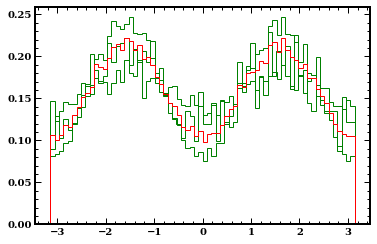

In [75]:
e1 = E[20]
e2 = E[20]
print(e1, " <= Energy <= ",e2 )
cut = (angles_sim != 0) * (e1 <= energies_sim) * (e2 >= energies_sim) 
#pl_factor = int(np.sum(cut) * (e * (8.2 - 1.8 + 1) + 1.8 - 0.5)**(-2) * 1.75**2 )
anglesE1 = angles_mom[cut]
anglesE1 = anglesE1[:int(len(anglesE1)/8)]
plt.hist(anglesE1,bins=70,density=True,histtype="step",color="g")

e1 = E[10]
e2 = E[10]
print(e1, " <= Energy <= ",e2 )
cut = (angles_sim != 0) * (e1 <= energies_sim) * (e2 >= energies_sim) 
#pl_factor = int(np.sum(cut) * (e * (8.2 - 1.8 + 1) + 1.8 - 0.5)**(-2) * 1.75**2 )
anglesE2 = angles_mom[cut]
plt.hist(anglesE2,bins=70,density=True,histtype="step",color="g")

e1 = E[50]
e2 = E[55]
print(e1, " <= Energy <= ",e2 )
cut = (angles_sim != 0) * (e1 <= energies_sim) * (e2 >= energies_sim) 
#pl_factor = int(np.sum(cut) * (e * (8.2 - 1.8 + 1) + 1.8 - 0.5)**(-2) * 1.75**2 )
anglesE3 = angles_mom[cut]
anglesE3 = anglesE3[:int(len(anglesE3)/4)]
plt.hist(anglesE3,bins=70,density=True,histtype="step",color="g")


plt.hist(np.concatenate([anglesE1,anglesE2,anglesE3]),bins=70,density=True,histtype="step",color="r")

print(stokes(np.concatenate([anglesE1,anglesE2, anglesE3])))
print((stokes(anglesE1)[0] * len(anglesE1) + 
       stokes(anglesE2)[0]*len(anglesE2) +
        stokes(anglesE3)[0]*len(anglesE3) )  / (len(anglesE1) + len(anglesE2) + len(anglesE3)) ) 

In [19]:
def bootstrap2(angles, B, n_cpu=None):
    '''
    Non-parametric bootstrap
    angles -> distribution to be boostrapped (angles, angles_mom, angles_sim, moms, errors,)
    B -> number of boostrap samples
    '''
    t = NetTest(n_nets=15)
    if not n_cpu:
        n_cpu = os.cpu_count()
    print("Beginning parallelization on {} cores\n".format(n_cpu))
    chunks = []
    chunks += [np.random.choice(np.arange(len(angles[0])), len(angles[0]), replace=True) for _ in range(B)]
    def sub(idxs):
        A1 = (angles[0][idxs],angles[1][idxs],angles[2][idxs],angles[3][idxs],angles[4][idxs])
        mu, phi, _, _ = t.fit_mod(A1, method='stokes')
        return mu, phi,
    with mp.Pool(processes=n_cpu) as pool:
        results = pool.map(sub, chunks)
    print("DONE!")
    mus, phis, = zip(*results)
    MUs = np.concatenate([mus],axis=1)
    PHIs = np.concatenate([phis],axis=1)

    return MUs, PHIs

In [9]:
e1 = E[20]
e2 = E[30]
cut = (angles_sim != 0) * (e1 <= energies_sim) * (e2 >= energies_sim)

anglesE = angles[cut]
angles_momE = angles_mom[cut] 
angles_simE = angles_sim[cut]
momsE = moms[cut]
errorsE = errors[cut] 

errorsE = np.sqrt(errorsE.T**2 + 3.25*circular_std(np.reshape(anglesE,[len(anglesE),-1]),axis=1)**2).T

# A1 = (anglesE, angles_momE, angles_simE, momsE, errorsE,)
# mus2, phis2 = bootstrap2(A1,4000)

#errorsE = circular_std(np.reshape(anglesE,[len(anglesE),-1]),axis=1)
anglesE = circular_mean(np.reshape(anglesE,[len(anglesE),-1]),axis=1)
errorsE = np.sqrt(np.mean(np.reshape(errorsE**2,[len(errorsE),-1]),axis=1))

# anglesE = angles_momE
# errorsE = 1/momsE
print("Unweighted: ", stokes(anglesE))
print("Unweighted MDP: ", MDP99(len(anglesE), stokes(anglesE)[0]))

def mdp(lambd):
    mu, _, Neff = weighted_stokes(anglesE, 1/errorsE, lambd)
    return MDP99(Neff,mu)

res = minimize_scalar(mdp, bounds=(0,8),method="bounded")
mu, _, Neff = weighted_stokes(anglesE, 1/errorsE, res['x'])

print("mu_eff >>",mu)
print("N_eff / N >>", Neff / len(anglesE) )
print("MDP >>", res['fun'] )
print(r"lambda >>", res['x'])



Unweighted:  (0.3774857770872788, -1.568805371357936)
Unweighted MDP:  2.06066349400902
mu_eff >> 0.4500335843982394
N_eff / N >> 0.8531887245391518
MDP >> 1.8712861006150112
lambda >> 2.011119453137959


In [4]:
t = NetTest(n_nets=15)
n_pixels = 50

mu_list = []
phi_list = []
mu_err_list = []
phi_err_list = []

muW_list = []
muW1_list = []
muW3_list = []
phiW_list = []
phiW1_list = []
muW_err_list = []
muW1_err_list = []
muW3_err_list = []
phiW_err_list = []
phiW1_err_list = []
lambdas = []
neffs = []


# muW_err_bootstrap = []
# phiW_err_bootstrap = []


abs_acc = []
abs_acc_err = []
abs_acc_round = []
abs_mom_acc = []
abs_mom_acc_err = []
energy_acc = []
abs_sim_hist = []


it = iter(E)
ee = list(zip(it,it))
N = []
for e1, e2 in ee: #[(E[0],E[6]),(E[6],E[11]),(E[11],E[16]),(E[16],E[21]),(E[21],E[26]),
              #(E[26],E[31]),(E[31],E[36]),(E[36],E[41]), (E[41],E[46]),
            #(E[46],E[51]),(E[51],E[56]),(E[56],E[61]),(E[61],E[66]),(E[66],E[71]),(E[71],E[77])]:
    #print(e1 * (8.2 - 1.8 ) + 1.8 )
    #print(e1 * 1.6 + 3.44)
    print(e1, " <= Energy <= ",e2 )
    cut = (angles_sim != 0) * (e1 <= energies_sim) * (e2 >= energies_sim) 
    #pl_factor = int(np.sum(cut) * (e * (8.2 - 1.8 + 1) + 1.8 - 0.5)**(-2) * 1.75**2 )
    anglesE = angles[cut]
    angles_momE = angles_mom[cut] 
    momsE = moms[cut]
    errorsE = errors[cut] 
    abs_ptsE = abs_pts[cut] 
    mom_abs_ptsE = mom_abs_pts[cut] 
    abs_pts_simE = abs_pts_sim[cut] 
    energiesE = energies[cut] 
    energies_simE = energies_sim[cut]
    angles_simE = angles_sim[cut]
    N.append(len(anglesE))
    
#     print(len(abs_ptsE), abs_ptsE.shape)
#     abs_sim_hist.append(np.mean(abs_pts_simE))
#     abs_mom_acc_hist = np.sum((mom_abs_ptsE*n_pixels - abs_pts_simE*n_pixels)**2,axis=1)

    #abs_acc.append(np.sqrt(np.sum((abs_ptsE*n_pixels - abs_pts_simE*n_pixels)**2) / len(abs_ptsE)))
    #abs_acc = abs_ptsE*n_pixels - abs_pts_simE*n_pixels
    abs_acc.append(2*np.median(np.sqrt(np.sum((abs_ptsE*n_pixels - abs_pts_simE*n_pixels)**2,axis=1))))
    #abs_acc_round.append(np.sqrt(np.sum((np.round(abs_ptsE*n_pixels) - abs_pts_simE*n_pixels)**2) / len(abs_ptsE)))
    #abs_acc_round.append(2*np.median(np.sqrt(np.sum((np.round(abs_ptsE*n_pixels) - abs_pts_simE*n_pixels)**2,axis=1))))
    #abs_mom_acc.append(np.sqrt(np.sum((mom_abs_ptsE*n_pixels - abs_pts_simE*n_pixels)**2) / len(mom_abs_ptsE)))
    #abs_mom_acc = mom_abs_ptsE*n_pixels - abs_pts_simE*n_pixels
    abs_mom_acc.append(2*np.median(np.sqrt(np.sum((mom_abs_ptsE*n_pixels - abs_pts_simE*n_pixels)**2,axis=1))))
#     #energy_acc.append(np.mean(((energiesE - energies_simE)*((8.2 - 1.8 ) + 1.8))**2))
#     energy_acc.append(np.mean(((energiesE - energies_simE)*1.6)**2))

    print("Size: ", len(anglesE))
    
    errorsE = np.sqrt(errorsE.T**2/4 + circular_std(np.reshape(anglesE,[len(anglesE),-1]),axis=1)**2).T
#     errorsE = circular_std(np.reshape(anglesE,[len(anglesE),-1]),axis=1)
    
#     #idxs = np.random.choice(np.arange(len(anglesE)),int(len(anglesE)/13))
    anglesE = circular_mean(np.reshape(anglesE,[len(anglesE),-1]),axis=1)
    errorsE = np.sqrt(np.mean(np.reshape(errorsE**2,[len(errorsE),-1]),axis=1))
    A1 = (anglesE, angles_momE, angles_simE, momsE, errorsE,)
    
#     #plt.hist(angles_mom1,density=True,alpha=0.3,bins=50)
    mu, phi0, mu_err, phi0_err = t.fit_mod(A1, method='stokes')
    print(mu[0], " (NN) -- ", mu[1], " (Mom.) -- ",mu[2], " (True.) ")
    print(phi0[0], " (NN) -- ", phi0[1], " (Mom.) -- ",phi0[2], " (True.) ")
    mu_list.append(mu)
    phi_list.append(phi0)
    mu_err_list.append(mu_err)
    phi_err_list.append(phi0_err)   
    
    mu, phi0, mu_err, phi0_err = t.fit_mod(A1, method='weighted_MLE', error_weight=2.1)
    mu1, phi01, mu_err1, phi0_err1 = t.fit_mod(A1, method='weighted_MLE', error_weight=1.1)
#     def mdp(lambd):
#         mu, _, Neff = weighted_stokes(anglesE, 1/errorsE, lambd)
#         return MDP99(Neff,mu)

#     res = minimize_scalar(mdp, bounds=(0,20),method="bounded")
#     mu, phi0, Neff = weighted_stokes(anglesE, 1/errorsE, 2)
#     print("WEIGHTED_STOKES: ", mu, phi0)
#     lambdas.append(res["x"])
#     neffs.append(Neff/len(anglesE))

        
    print("MLE mu:", mu[0], " (NN) -- ", mu[1], " (Mom.) ")
    print("MLE Phi:", phi0[0], " (NN) -- ", phi0[1], " (Mom.) ")
    
    
    
# #     print("abs_pt:", abs_acc[-1])
# #     print("abs_pt_round:", abs_acc_round[-1])
# #     print("abs_mom_pt", abs_mom_acc[-1])
    
# #     print("energy:", energy_acc[-1])
    
    muW_list.append(mu)
    phiW_list.append(phi0)
    muW_err_list.append(mu_err)
    phiW_err_list.append(phi0_err)

    
    muW1_list.append(mu1)
    phiW1_list.append(phi01)
    muW1_err_list.append(mu_err1)
    phiW1_err_list.append(phi0_err1)
    
#     print(muW_list)
#     print(mu_list)
# #     print(muW_err_list)
# #     print(mu_err_list)
    


1.0  <= Energy <=  1.100000023841858
Size:  115934
Method: stokes

0.004828568609530566  (NN) --  0.005172586817945077  (Mom.) --  0.005687089263277803  (True.) 
-1.517100317632944  (NN) --  -1.1601648097311552  (Mom.) --  0.38480315789015096  (True.) 
Method: weighted_MLE



/home/groups/rwr/alpv95/tracksml/util/net_test.py:311: RuntimeWarning: invalid value encountered in log
  loglike_ipopt = lambda x: -np.sum((1 / error**error_weight) * np.log(1 + cs@x))


Moment cut at 1.25, leaving 0.805 of dataset

Moment cut at 1.25, leaving 0.805 of dataset

Method: weighted_MLE

Moment cut at 1.25, leaving 0.805 of dataset

Moment cut at 1.25, leaving 0.805 of dataset

MLE mu: 0.0050651845676482335  (NN) --  0.004496767026921456  (Mom.) 
MLE Phi: -1.4989552326998532  (NN) --  -1.4313020476198883  (Mom.) 
1.2000000476837158  <= Energy <=  1.2999999523162842
Size:  116078
Method: stokes

0.01152017784703304  (NN) --  0.007214082882944736  (Mom.) --  0.0047788358263108205  (True.) 
0.5724225485324094  (NN) --  0.46605095867213137  (Mom.) --  0.8722939078181919  (True.) 
Method: weighted_MLE

Moment cut at 1.20, leaving 0.810 of dataset

Moment cut at 1.20, leaving 0.810 of dataset

Method: weighted_MLE

Moment cut at 1.20, leaving 0.810 of dataset

Moment cut at 1.20, leaving 0.810 of dataset

MLE mu: 0.011432548384876808  (NN) --  0.011169402484096161  (Mom.) 
MLE Phi: 0.5491370992107042  (NN) --  0.4920918663272401  (Mom.) 
1.399999976158142  <= Ene

Moment cut at 1.28, leaving 0.811 of dataset

Moment cut at 1.28, leaving 0.811 of dataset

MLE mu: 0.004145105400836111  (NN) --  0.005173397258399465  (Mom.) 
MLE Phi: -0.4631367638012889  (NN) --  -0.4980607039705003  (Mom.) 
3.799999952316284  <= Energy <=  3.9000000953674316
Size:  116163
Method: stokes

0.00207349990655499  (NN) --  0.002318172453300849  (Mom.) --  0.003280664312746556  (True.) 
-0.22219400513018697  (NN) --  0.4535669173683326  (Mom.) --  0.03409237690986431  (True.) 
Method: weighted_MLE



/home/groups/rwr/alpv95/tracksml/util/net_test.py:200: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(I_1[0,0]), np.sqrt(I_1[1,1]), I_1[0,1]/np.sqrt(I_1[0,0]*I_1[1,1])


Moment cut at 1.32, leaving 0.807 of dataset

Moment cut at 1.32, leaving 0.807 of dataset

Method: weighted_MLE

Moment cut at 1.32, leaving 0.807 of dataset

Moment cut at 1.32, leaving 0.807 of dataset

MLE mu: 0.0009964090531178194  (NN) --  0.001830591986562471  (Mom.) 
MLE Phi: 1.120148876759639  (NN) --  -0.008661217795029465  (Mom.) 
4.0  <= Energy <=  4.099999904632568
Size:  116049
Method: stokes

0.007829469725176237  (NN) --  0.008170188831943355  (Mom.) --  0.006073745377980996  (True.) 
-0.23775576817757116  (NN) --  -0.3060356063205203  (Mom.) --  -0.19804408401986645  (True.) 
Method: weighted_MLE

Moment cut at 1.35, leaving 0.815 of dataset

Moment cut at 1.35, leaving 0.815 of dataset

Method: weighted_MLE

Moment cut at 1.35, leaving 0.815 of dataset

Moment cut at 1.35, leaving 0.815 of dataset

MLE mu: 0.009748950614152607  (NN) --  0.009212898302808368  (Mom.) 
MLE Phi: -0.33321928975446047  (NN) --  -0.19709493524726698  (Mom.) 
4.199999809265137  <= Energy <=  

Method: weighted_MLE

Moment cut at 2.13, leaving 0.814 of dataset

Moment cut at 2.13, leaving 0.814 of dataset

MLE mu: 0.005043040758245187  (NN) --  0.004047109355556687  (Mom.) 
MLE Phi: 0.06658984252581523  (NN) --  0.4134834736820753  (Mom.) 
6.599999904632568  <= Energy <=  6.699999809265137
Size:  116092
Method: stokes

0.004964212500491135  (NN) --  0.005446726687519074  (Mom.) --  0.005783716642834411  (True.) 
-0.7500764728266919  (NN) --  -0.4074255082606097  (Mom.) --  -0.13941022355616597  (True.) 
Method: weighted_MLE

Moment cut at 2.22, leaving 0.815 of dataset

Moment cut at 2.22, leaving 0.815 of dataset

Method: weighted_MLE

Moment cut at 2.22, leaving 0.815 of dataset

Moment cut at 2.22, leaving 0.815 of dataset

MLE mu: 0.005346866917700485  (NN) --  0.003181174586401897  (Mom.) 
MLE Phi: -0.9115179233509968  (NN) --  -0.882917481314639  (Mom.) 
6.800000190734863  <= Energy <=  6.900000095367432
Size:  116205
Method: stokes

0.007720998898699297  (NN) --  0.008

Text(0,0.5,'HPD [pixels]')

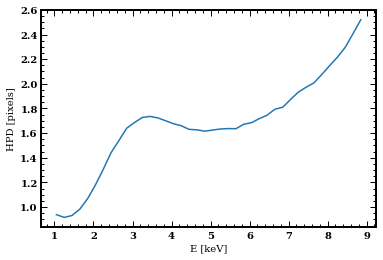

In [6]:
plt.plot(np.arange(1.05,9,0.2), abs_acc)
#plt.plot(np.arange(1.05,8.8,0.2), abs_mom_acc)
#plt.plot(np.arange(1.05,8.8,0.2), abs_acc_round)
plt.xlabel("E [keV]")
plt.ylabel("HPD [pixels]")

In [6]:
from scipy import interpolate

In [8]:
f = interpolate.interp1d(np.arange(1.05,9,0.2), abs_acc, kind="cubic")
print(f(2.7))
print(f(4.5))
print(f(6.4))
print(f(8.0))

1.564958958149478
1.627677693366709
1.7363452977703124
2.1294450343976448


In [ ]:
plt.plot(np.arange(1.05,8.8,0.2), np.sqrt(abs_acc))
plt.plot(np.arange(1.05,8.8,0.2), np.sqrt(abs_mom_acc))
plt.xlabel("E [keV]")
plt.ylabel("RMSE [pixels]")

In [ ]:
name = "abs_pts"
X,Y = np.load("plots/" + name + ".npy",allow_pickle=True)
#X = [np.arange(1.9,8.3,0.2),np.arange(1.8,8.3,0.1),]
#Y = [np.sqrt(np.array(abs_acc_round)),np.sqrt(np.array(abs_mom_acc)),np.array(err_round)]

fig, ax = plt.subplots(figsize=(4.5,3.5))
#ax.semilogx(x, y, 'o', label = "data")
#ax.plot(np.arange(1.9,8.3,0.2), np.sqrt(np.array(abs_acc)),color='r',linewidth=2,linestyle="solid",label="NN")
ax.plot(X[0], Y[0],color='r',linewidth=2,linestyle="solid",label="NN" )
ax.plot(X[0], Y[1],color='b',linewidth=2,linestyle="solid" ,label="Mom.")
#ax.plot(np.arange(1.8,8.3,0.1), np.array(err),color='k',linewidth=2,linestyle="solid" ,label="Bary.")
ax.plot(X[1][1:], savgol_filter(Y[2][1:],5,3),color='k',linewidth=2,linestyle="solid",label="Bary.")

ax.plot([1.5,8.5],[2.43,2.43],linestyle=":",color='k', label="HPD/4")

leg = ax.legend(loc = 4,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
ax.set_xlabel(r"E [keV]",fontweight="bold")
ax.set_ylabel(r"RMSE [pixels]",fontweight="bold")
ax.set_ylim(0.5,3.0)
ax.set_xlim(1.7,8.3)
ax.minorticks_on()
plt.savefig("plots/" + name + ".pdf",format="pdf")

np.save("plots/" + name, (X,Y))

In [28]:

Y_pol = [copy.copy(np.array(mu_list))[:,0],copy.copy(np.array(mu_list))[:,1],copy.copy(np.array(mu_list))[:,2],
     copy.copy(np.array(muW_list))[:,0],copy.copy(np.array(muW_list))[:,1],copy.copy(np.array(muW1_list))[:,0]]

Y_pol_err = [copy.copy(np.array(mu_err_list))[:,0],copy.copy(np.array(mu_err_list))[:,1],copy.copy(np.array(mu_err_list))[:,2],
     copy.copy(np.array(muW_err_list))[:,0],copy.copy(np.array(muW_err_list))[:,1],copy.copy(np.array(muW1_err_list))[:,0]]

Y_phi = [copy.copy(np.array(phi_list))[:,0],copy.copy(np.array(phi_list))[:,1],copy.copy(np.array(phi_list))[:,2],
     copy.copy(np.array(phiW_list))[:,0],copy.copy(np.array(phiW_list))[:,1],copy.copy(np.array(phiW1_list))[:,0]]

Y_phi_err = [copy.copy(np.array(phi_err_list))[:,0],copy.copy(np.array(phi_err_list))[:,1],copy.copy(np.array(phi_err_list))[:,2],
     copy.copy(np.array(phiW_err_list))[:,0],copy.copy(np.array(phiW_err_list))[:,1],copy.copy(np.array(phiW1_err_list))[:,0]]

In [32]:
Y_unpol = [copy.copy(np.array(mu_list))[:,0],copy.copy(np.array(mu_list))[:,1],copy.copy(np.array(mu_list))[:,2],
     copy.copy(np.array(muW_list))[:,0],copy.copy(np.array(muW_list))[:,1],copy.copy(np.array(muW1_list))[:,0]]

Y_unpol_err = [copy.copy(np.array(mu_err_list))[:,0],copy.copy(np.array(mu_err_list))[:,1],copy.copy(np.array(mu_err_list))[:,2],
     copy.copy(np.array(muW_err_list))[:,0],copy.copy(np.array(muW_err_list))[:,1],copy.copy(np.array(muW1_err_list))[:,0]]


/home/users/alpv95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


[ -1.9523094  103.50495455]


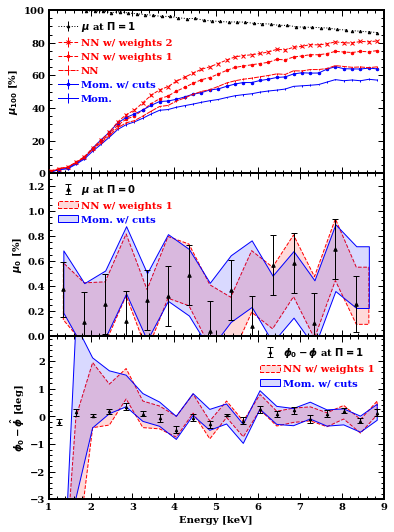

In [112]:
name = "modulation_review"
R1,T1,Yerr1 = np.load("plots/" + "modulation" + ".npy",allow_pickle=True)

true_angles = T1[2]
x_true = R1[0]
true_angles_err = Yerr1[2]

true,_,_,_ = np.linalg.lstsq(np.stack([x_true,np.ones(len(x_true))],axis=1),true_angles)
print(true)

X1 = np.arange(1.05,9.0,0.2)
X = np.arange(1.35,8.7,0.5)

# np.save("plots/" + name, (X,X1,Y_pol,Y_pol_err,Y_phi,Y_phi_err,Y_unpol,Y_unpol_err))
X, X1, Y_pol,Y_pol_err,Y_phi,Y_phi_err,Y_unpol,Y_unpol_err = np.load("plots/" + name + ".npy",allow_pickle=True)

fig, ax = plt.subplots(nrows=3,sharex=True,gridspec_kw={"hspace":0.0},figsize=(6,9))

errbr0 = ax[0].errorbar(x_true, true_angles ,color='k',yerr=true_angles_err, label= r"$\mu$ at $\Pi = 1$",linestyle='dotted',capsize=0, marker="^",markersize=2.5,linewidth=1)
true_fix = ax[0].plot(X1[36:], X1[36:]*true[0] + true[1], color='k', linestyle='dotted', marker="^",markersize=2.5,linewidth=1)
errbr1 = ax[0].errorbar(X1, Y_pol[5]*100, yerr=Y_pol_err[0]*100 ,color='r',linestyle='--', label=r"NN w/ weights 2",marker="x",markersize=3.2,zorder=30,capsize=0,linewidth=1)
errbr2 = ax[0].errorbar(X1, Y_pol[3]*100, yerr=Y_pol_err[0]*100 ,color='r',linestyle='--', label=r"NN w/ weights 1",marker="o",markersize=2.5,capsize=0,linewidth=1)
errbr4 = ax[0].errorbar(X1,Y_pol[0]*100, color='r',yerr=Y_pol_err[0]*100 , label= r"NN",linestyle=(0, (5, 1)),zorder=10,capsize=0,linewidth=1)
errbr5 = ax[0].errorbar(X1,Y_pol[4]*100, yerr=Y_pol_err[4]*100 ,color='b',linestyle='solid', label=r"Mom. w/ cuts",fmt="o",markersize=2.5,capsize=0,linewidth=1)
errbr6 = ax[0].errorbar(X1,Y_pol[1]*100, color='b',yerr=Y_pol_err[1]*100 , label= r"Mom.",linestyle='solid',capsize=0,linewidth=1)
#errbr7 = ax[0].plot(X1,np.array(muW_list)*100, color='k', linestyle='solid')

leg = ax[0].legend(loc = 2,)
lines = [errbr0.lines[0],errbr1.lines[0],errbr2.lines[0],errbr4.lines[0],errbr5.lines[0],errbr6.lines[0]]
for line, text in zip(lines, leg.get_texts()):
    text.set_color(line.get_color())
    
ax[0].set_ylabel(r"$\mu_{100}$ [%]",fontweight="bold")
ax[0].set_ylim(0.1,100.0)
ax[0].set_xlim(1.0,9.0)
ax[0].minorticks_on()


errbr0 = ax[1].errorbar(X,Y_unpol[2]*100 ,color='k',fmt="^",yerr=Y_unpol_err[2]*100, label= r"$\mu$ at $\Pi = 0$",ls=None, linewidth=1, marker="^",markersize=3.5,zorder=10)
#errbr1 = ax[1].errorbar(X+0.01, Y_unpol[3]*100,color='r',linestyle='--', label=r"NN w/ weights 1",marker="x",markersize=3,linewidth=1)
#errbr3 = ax[1].errorbar(X+0.02, Y_unpol[5]*100,color='r',linestyle='--', label=r"NN w/ weights 2",marker="o",markersize=2.5,linewidth=1)
#errbr4 = ax[1].errorbar(X+0.03,Y_unpol[0]*100 ,color='r', label= r"NN",yerr=Y_unpol_err[0]*100,linestyle='solid',linewidth=1)
#errbr5 = ax[1].errorbar(X+0.04,Y_unpol[4]*100,color='b',linestyle='--', label=r"Mom. w/ cuts",fmt="o",markersize=2.5,linewidth=1)
#errbr6 = ax[1].errorbar(X+0.05,Y_unpol[1]*100 , color='b',yerr=Y_unpol_err[1]*100, label= r"Mom.",linestyle='solid',linewidth=1)

X = np.append(X,X[-1]+0.3)
Y_unpol[3] = np.append(Y_unpol[3],Y_unpol[3][-1])
Y_unpol_err[0] = np.append(Y_unpol_err[0],Y_unpol_err[0][-1])
Y_unpol[4] = np.append(Y_unpol[4],Y_unpol[4][-1])
Y_unpol_err[4] = np.append(Y_unpol_err[4],Y_unpol_err[4][-1])
fill1 = ax[1].fill_between(X,(Y_unpol[3] + Y_unpol_err[0]/np.sqrt(0.95))*100,(Y_unpol[3] - Y_unpol_err[0]/np.sqrt(0.95))*100,facecolor=(1,0,0,0.15),edgecolor="r", label="NN w/ weights 1",linestyle="--")
fill2 = ax[1].fill_between(X,(Y_unpol[4] + Y_unpol_err[4])*100,(Y_unpol[4] - Y_unpol_err[4])*100,edgecolor="b",facecolor=(0,0,1,0.15), label="Mom. w/ cuts")

handles, labels = ax[1].get_legend_handles_labels()
order = [2,0,1]
leg = ax[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order])
lines = [fill1,fill2]
colors = ["r","b"]
for line, text, color in zip(lines, leg.get_texts()[1:],colors):
    text.set_alpha(line.get_alpha())
    text.set_color(color)

#ax[1].set_xlabel(r"Energy [keV]",fontweight="bold")
ax[1].set_ylabel(r"$\mu_{0}$ [%]",fontweight="bold")
ax[1].set_ylim(0.0,1.3)
ax[1].set_xlim(1.0,8.1)
ax[1].minorticks_on()


errbr0 = ax[2].errorbar(X1[1::2], pi2_pi2((2*pi2_pi2(Y_phi[2]) - 2*np.pi/2))[1::2]*180/np.pi/2, fmt="^",color='k',yerr=Y_phi_err[2][1::2]*180/np.pi, label= r"$\phi_0 - \phi$ at $\Pi = 1$",ls=None,linewidth=1,markersize=2.5,zorder=10)
#errbr1 = ax[2].errorbar(X1[1::2]+0.01,  pi2_pi2((2*pi2_pi2(Y_phi[5]) - 2*np.pi/2))[1::2]*180/np.pi/2 ,color='r',linestyle='--', label=r"NN w/ weights 2", marker='o',markersize=3,linewidth=1) #yerr=Y_phi_err[0][1::2]*180/np.pi
#errbr1 = ax[2].errorbar(X1[1::2]+0.01,  pi2_pi2((2*pi2_pi2(Y_phi[3]) - 2*np.pi/2))[1::2]*180/np.pi/2 ,color='r',linestyle='--', label=r"NN w/ weights 1", marker='x',markersize=3,linewidth=1)
#errbr2 = ax[2].errorbar(X1[1::2]+0.02, pi2_pi2((2*pi2_pi2(Y_phi[0]) - 2*np.pi/2))[1::2]*180/np.pi/2 ,color='r',yerr=Y_phi_err[0][1::2]*180/np.pi, label= r"NN",linestyle='solid',linewidth=1) #,yerr=Y_phi_err[0][1::2]*180/np.pi
#errbr3 = ax[2].errorbar(X1[1::2]+0.03, pi2_pi2((2*pi2_pi2(Y_phi[4]) - 2*np.pi/2))[1::2]*180/np.pi/2, color='b',linestyle='--', label=r"Mom. w/ cuts",marker='o',markersize=3,linewidth=1) #yerr=Y_phi_err[4][1::2]*180/np.pi,
#errbr4 = ax[2].errorbar(X1[1::2]+0.04, pi2_pi2((2*pi2_pi2(Y_phi[1]) - 2*np.pi/2))[1::2]*180/np.pi/2 , color='b',yerr=Y_phi_err[1][1::2]*180/np.pi, label= r"Moments",linestyle='solid',linewidth=1)

fill1 = ax[2].fill_between(X1[1::2],pi2_pi2((2*pi2_pi2(Y_phi[0]) - 2*np.pi/2))[1::2]*180/np.pi/2 + Y_phi_err[0][1::2]*180/np.pi,
                   pi2_pi2((2*pi2_pi2(Y_phi[0]) - 2*np.pi/2))[1::2]*180/np.pi/2 - Y_phi_err[0][1::2]*180/np.pi,facecolor=(1,0,0,0.15),edgecolor="r", label="NN w/ weights 1",linestyle="--")
fill2 = ax[2].fill_between(X1[1::2],pi2_pi2((2*pi2_pi2(Y_phi[1]) - 2*np.pi/2))[1::2]*180/np.pi/2 + Y_phi_err[1][1::2]*180/np.pi,
                   pi2_pi2((2*pi2_pi2(Y_phi[1]) - 2*np.pi/2))[1::2]*180/np.pi/2 - Y_phi_err[1][1::2]*180/np.pi,facecolor=(0,0,1,0.15),edgecolor="b", label="Mom. w/ cuts")

handles, labels = ax[2].get_legend_handles_labels()
order = [2,0,1]
leg = ax[2].legend([handles[idx] for idx in order],[labels[idx] for idx in order])
lines = [fill1,fill2]
colors = ["r","b"]
for line, text, color in zip(lines, leg.get_texts()[1:],colors):
    text.set_alpha(line.get_alpha())
    text.set_color(color)

ax[2].set_xlabel(r"Energy [keV]",fontweight="bold")
ax[2].set_ylabel(r"$\phi_0 - \hat{\phi}$ [deg]",fontweight="bold")
# ax.set_ylim(0.0,6)
ax[2].set_xlim(1.0,9.0)
ax[2].set_ylim(-3.0,2.9)
ax[2].minorticks_on()

plt.savefig("plots/" + "modulation_joint_review" + ".pdf",format="pdf")

Text(0,0.5,'RMSE [pixels]')

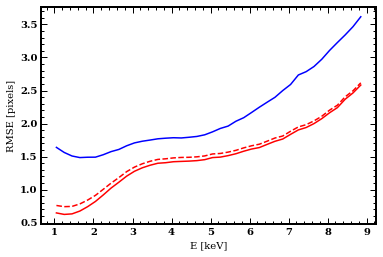

In [10]:
x = np.arange(1.05,9.0,0.2)
plt.plot(x,np.sqrt(np.array(abs_acc)), "r")
plt.plot(x,np.sqrt(np.array(abs_acc_round)), "r--")
plt.plot(x,np.sqrt(np.array(abs_mom_acc)),"b")
plt.xlabel("E [keV]")
plt.ylabel("RMSE [pixels]")

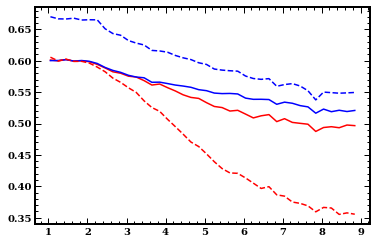

In [5]:
x = np.arange(1.05,9.0,0.2)
plt.plot(x,np.array(mu_err_list)[:,0]*100,"r")
plt.plot(x,np.array(mu_err_list)[:,1]*100,"b")
plt.plot(x,np.array(muW_err_list)[:,0]*100,"r--")
plt.plot(x,np.array(muW_err_list)[:,1]*100,"b--")

Text(0,0.5,'$\\mu$ [%]')

/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


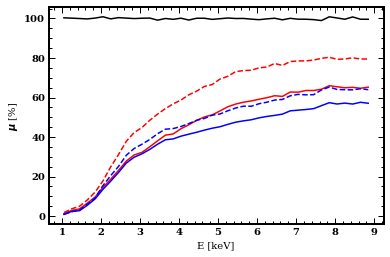

In [8]:
x = np.arange(1.05,8.9,0.2)
plt.plot(x, np.array(mu_list)[:,0]*100,"r")
plt.plot(x, np.array(mu_list)[:,1]*100,"b")
plt.plot(x, np.array(mu_list)[:,2]*100,"k")
plt.plot(x, np.array(muW_list)[:,0]*100,"r--")
plt.plot(x, np.array(muW_list)[:,1]*100,"b--")
# plt.ylim(0,20)
# plt.xlim(1,3)
plt.xlabel("E [keV]")
plt.ylabel(r"$\mu$ [%]")

In [ ]:
def GKing(r,sigma=9.85,r_c=7.57,eta=1.629,W=3.87e-4,N=2.574e-3):
    return W*np.exp(-r**2/(2*sigma**2)) + N*(1 + (r/r_c)**2)**(-eta)

In [ ]:
n, bins, _ = plt.hist(2.57*X[0], bins=500, density=True, label="NN",color="r")

In [ ]:
fig,ax = plt.subplots()
name = "PSF_hist"
# X = np.load("plots/" + name + ".npy",allow_pickle=True)
X = [np.sqrt(abs_acc_hist)]

ax.set_xlabel(r"r [arcsec]")
ax.set_ylabel(r"Normalized Counts/r")
ax.set_ylim(0.0,1.1)
ax.set_xlim(0.0,2.57*4.5)
ax.minorticks_on()
#n, bins, _ = plt.hist(2.57*X[0], bins=500, density=True, label="NN",color="r")
start = (bins[1] - bins[0]) / 2
width = (bins[1] - bins[0])

x = np.array([start + i*width for i in range(500)])
y = n / (np.pi*x)
y /= y[0]

ax.plot(np.linspace(0,12,500), y, color='b',linestyle="solid", label="NN")
ax.plot(np.arange(0,12,0.1),(1/0.002961)*GKing(np.arange(0,12,0.1)), color="k",linestyle=":",label="PSF 2.98keV")
print(GKing(np.arange(0,12,0.1))[0])

leg = ax.legend(loc = 1,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
#leg.get_texts()[1].set_color("r")
plt.savefig("plots/" + name + ".pdf",format="pdf")

np.save("plots/" + name, X)


In [ ]:
fig,ax = plt.subplots()
X = np.load("plots/" + name + ".npy",allow_pickle=True)
name = "PSF_histlog"

ax.set_xlabel(r"r [arcsec]")
ax.set_ylabel(r"Normalized Counts/r")
# ax.set_ylim(0.0,1.1)
ax.set_xlim(0.001,10)
ax.set_yscale("log")
ax.set_xscale("log")
ax.minorticks_on()
#n, bins, _ = plt.hist(2.57*X[0], bins=500, density=True, label="NN",color="r")
start = (bins[1] - bins[0]) / 2
width = (bins[1] - bins[0])

x = np.array([start + i*width for i in range(500)])
y = n / (np.pi*x)
y /= y[0]

ax.plot(np.linspace(0,12,500), y, color='b',linestyle="solid", label="NN")
ax.plot(np.arange(0,12,0.1),(1/0.002961)*GKing(np.arange(0,12,0.1)), color="k",linestyle=":",label="PSF 2.98keV")
print(GKing(np.arange(0,12,0.1))[0])

leg = ax.legend(loc = 3,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
#leg.get_texts()[1].set_color("r")
plt.savefig("plots/" + name + ".pdf",format="pdf")


In [2]:
with fits.open(home_dir + "real_data/systematic_UnpFF_DU2.fits", memmap=False) as hdu:
    print(hdu.info())
    Q = hdu[1].data
    U = hdu[2].data
    ENE = hdu[3].data
    PHA = hdu[4].data

Filename: /home/groups/rwr/alpv95/tracksml/real_data/systematic_UnpFF_DU2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  Q             1 ImageHDU         9   (100, 100, 6)   float64   
  2  U             1 ImageHDU         9   (100, 100, 6)   float64   
  3  ENERGIES      1 ImageHDU         7   (6,)   float64   
  4  PHA           1 ImageHDU         7   (0,)      
None


In [4]:
ENE

array([2.041, 2.306, 2.675, 3.092, 3.708, 5.956])

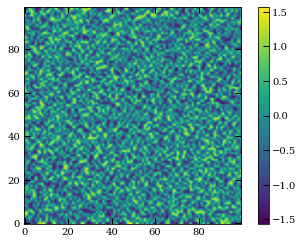

In [55]:
idx = 0
plt.imshow(0.5*np.arctan2(U[idx],Q[idx]),origin='lower',interpolation='gaussian')
plt.colorbar()

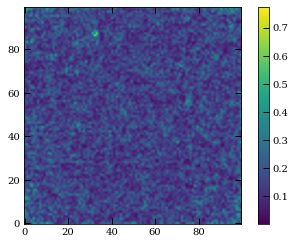

In [56]:
plt.imshow(np.sqrt(Q[idx]**2+U[idx]**2),origin='lower',interpolation='gaussian')
plt.colorbar()

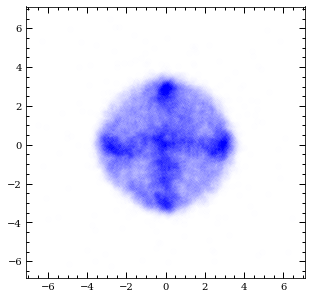

In [82]:
fig, ax = plt.subplots(figsize=(5,5))
ax.minorticks_on()
plt.scatter(B[5][:,0],B[5][:,1], c='b',alpha=0.0055 )

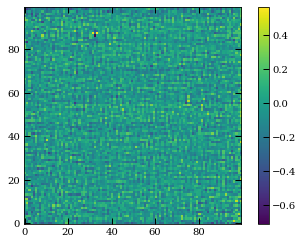

In [39]:
plt.imshow(Q[idx],origin='lower')
plt.colorbar()

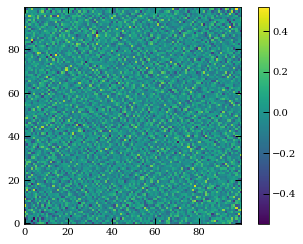

In [40]:
plt.imshow(U[idx],origin='lower')
plt.colorbar()

In [ ]:
with fits.open(home_dir + "data/gen4_paper/gen4_3p8.fits", memmap=False) as hdu:
    sim_data = hdu[3].data

In [ ]:
with fits.open(home_dir + "data/gen4_paper/gen4_3p8_recon.fits", memmap=False) as hdu:
    data = hdu[1].data

(array([3.99265113e-03, 9.01738445e-02, 1.22798620e-01, 1.27029484e-01,
        1.30747673e-01, 1.24709500e-01, 1.26299310e-01, 1.28779829e-01,
        1.29080184e-01, 1.29251076e-01, 1.26941449e-01, 1.25118604e-01,
        1.26900021e-01, 1.27366089e-01, 1.27982335e-01, 1.29784465e-01,
        1.29711966e-01, 1.32544625e-01, 1.31270705e-01, 1.30126248e-01,
        1.32586053e-01, 1.33031407e-01, 1.33528547e-01, 1.31358740e-01,
        1.27795907e-01, 1.27086448e-01, 1.27252161e-01, 1.25553601e-01,
        1.23430402e-01, 1.20245602e-01, 1.17790976e-01, 1.15118852e-01,
        1.13321900e-01, 1.08681932e-01, 1.03788215e-01, 9.48655980e-02,
        8.23542554e-02, 6.48870540e-02, 4.48512989e-02, 2.56700021e-02,
        1.38007980e-02, 6.17281472e-03, 2.82748057e-03, 1.17034910e-03,
        4.91960904e-04, 1.65713147e-04, 9.32136450e-05, 4.66068225e-05,
        3.10712150e-05, 2.58926792e-05]),
 array([ 0.73546991,  0.95387569,  1.17228146,  1.39068723,  1.60909301,
         1.82749878, 

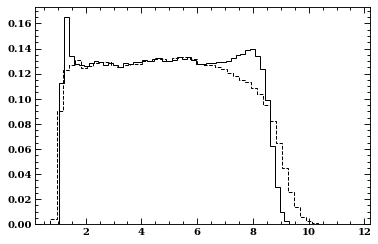

In [23]:
hist = plt.hist(energies,histtype="step",density=True)
hist = plt.hist(energies_processed[~np.isnan(energies_processed)],histtype="step",density=True)

In [67]:
# with fits.open(home_dir + '/newpaper_pol_train___newpaper_pol_bess_rand_geo__ensemble.fits', memmap=False) as hdu:
#     data = hdu[1].data
    
with fits.open(home_dir + '/newpaper_pol_test___tailvpeak_newpaper_pol_test__ensemble.fits', memmap=False) as hdu:
    data = hdu[1].data
    
# with fits.open(home_dir + 'pol_heads3_train___pol_heads_ensemble3__ensemble.fits', memmap=False) as hdu:
#     data = hdu[1].data
    
    
    
E = set(data['ENERGY'])
E = list(E)
E.sort()


(array([1.000e+00, 4.000e+00, 8.000e+00, 4.000e+01, 6.200e+01, 1.820e+02,
        5.900e+02, 1.437e+03, 2.849e+03, 4.439e+03, 4.268e+03, 3.112e+03,
        2.401e+03, 2.093e+03, 1.847e+03, 1.770e+03, 1.646e+03, 1.564e+03,
        1.551e+03, 1.444e+03, 1.521e+03, 1.592e+03, 1.580e+03, 1.706e+03,
        1.713e+03, 1.779e+03, 1.867e+03, 1.917e+03, 1.966e+03, 2.123e+03,
        2.208e+03, 2.347e+03, 2.378e+03, 2.264e+03, 2.246e+03, 2.106e+03,
        1.896e+03, 1.876e+03, 1.813e+03, 1.775e+03, 1.726e+03, 1.657e+03,
        1.671e+03, 1.576e+03, 1.432e+03, 7.700e+02, 3.270e+02, 1.550e+02,
        3.700e+01, 7.000e+00]),
 array([-6.6236844 , -6.4040813 , -6.1844783 , -5.9648747 , -5.7452717 ,
        -5.5256686 , -5.3060656 , -5.0864625 , -4.866859  , -4.647256  ,
        -4.427653  , -4.20805   , -3.9884465 , -3.7688434 , -3.54924   ,
        -3.329637  , -3.110034  , -2.8904307 , -2.6708276 , -2.4512243 ,
        -2.2316213 , -2.0120182 , -1.7924149 , -1.5728118 , -1.3532087 ,
        -1.

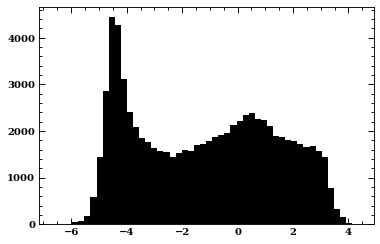

In [69]:
plt.hist(data['P_TAIL'])

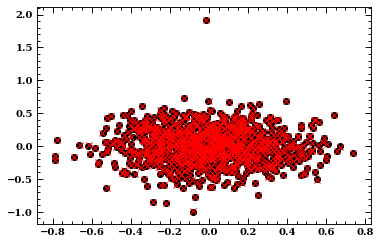

In [15]:
plt.scatter(data['XY_NN_ABS'][:1000,0],data['XY_NN_ABS'][:1000,1])
plt.scatter(data['XY_MOM_ABS'][:1000,0],data['XY_MOM_ABS'][:1000,1], marker='x',color='r')

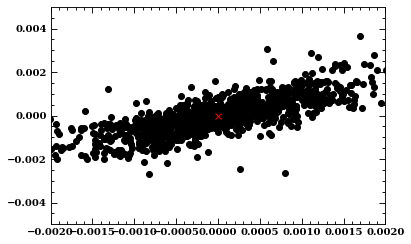

In [14]:
plt.scatter(data['XY_NN_ABS'][:1000,0]-data['XY_MOM_ABS'][:1000,0],data['XY_NN_ABS'][:1000,1]-data['XY_MOM_ABS'][:1000,1])
# plt.scatter(data['XY_MOM_ABS'][:200,0],data['XY_MOM_ABS'][:200,1], marker='x',color='r')
plt.xlim(-0.002,0.002)
plt.ylim(-0.005,0.005)
plt.scatter(0,0,marker='x',color='r')

In [3]:
data.columns

ColDefs(
    name = 'NN_PHI'; format = 'E'
    name = 'MOM_PHI'; format = 'E'
    name = 'PHI'; format = 'E'
    name = 'MOM_ELLIP'; format = 'E'
    name = 'NN_WEIGHT'; format = 'E'
    name = 'NN_WEIGHT_EPIS'; format = 'E'
    name = 'NN_ABS'; format = '2E'; dim = '(2)'
    name = 'MOM_ABS'; format = '2E'; dim = '(2)'
    name = 'XY_MOM_ABS'; format = '2E'; dim = '(2)'
    name = 'ABS'; format = '2E'; dim = '(3)'
    name = 'ENERGY'; format = 'E'
    name = 'NN_ENERGY'; format = 'E'
    name = 'XY_NN_ABS'; format = '2E'; dim = '(2)'
    name = 'XYZ_ABS'; format = '3E'; dim = '(3)'
    name = 'MOM_ENERGY'; format = 'E'
)

/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


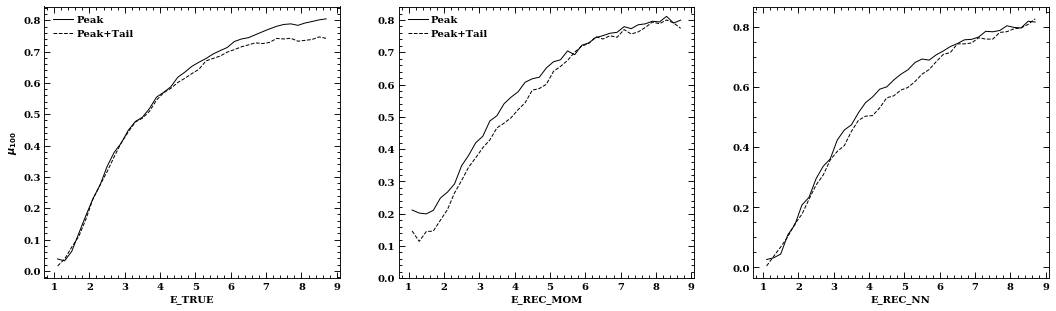

In [127]:
_,(ax1,ax2,ax3) = plt.subplots(figsize=(18,5),ncols=3)
with fits.open(home_dir + 'pol_heads3_train___pol_heads_ensemble3__ensemble.fits', memmap=False) as hdu:
    data = hdu[1].data

mu = []
mu_rec = []
mu_rec_nn = []
for e1,e2 in pairwise(E[::2]):
    cut = (data['ENERGY'] <= e2) * (data['ENERGY'] >= e1)
    cut_rec = (data['MOM_ENERGY'] <= e2) * (data['MOM_ENERGY'] >= e1)
    cut_rec_nn = (data['NN_ENERGY'] <= e2) * (data['NN_ENERGY'] >= e1)
    mu1, phi, Neff = weighted_stokes(data['NN_PHI'][cut],(data['NN_WEIGHT']*data['NN_WEIGHT_EPIS'])[cut], 1)
    mu2, phi, Neff = weighted_stokes(data['NN_PHI'][cut_rec],(data['NN_WEIGHT']*data['NN_WEIGHT_EPIS'])[cut_rec], 1)
    mu3, phi, Neff = weighted_stokes(data['NN_PHI'][cut_rec_nn],(data['NN_WEIGHT']*data['NN_WEIGHT_EPIS'])[cut_rec_nn], 1)
    mu.append(mu1)
    mu_rec.append(mu2)
    mu_rec_nn.append(mu3)
ax1.plot(E[1::2][:-1],mu, label='Peak')
ax2.plot(E[1::2][:-1],mu_rec, label='Peak')
ax3.plot(E[1::2][:-1],mu_rec_nn, label='Peak')
ax1.set_xlabel('E_TRUE')
ax1.set_ylabel(r'$\mu_{100}$')
ax2.set_xlabel('E_REC_MOM')
ax2.set_ylim(0)
ax3.set_xlabel('E_REC_NN')


with fits.open(home_dir + '/newpaper_pol_train___newpaper_pol_bess_rand_geo__ensemble.fits', memmap=False) as hdu:
    data = hdu[1].data
    
mu = []
mu_rec = []
mu_rec_nn = []
for e1,e2 in pairwise(E[::2]):
    cut = (data['ENERGY'] <= e2) * (data['ENERGY'] >= e1)
    cut_rec = (data['MOM_ENERGY'] <= e2) * (data['MOM_ENERGY'] >= e1)
    cut_rec_nn = (data['NN_ENERGY'] <= e2) * (data['NN_ENERGY'] >= e1)
    mu1, phi, Neff = weighted_stokes(data['NN_PHI'][cut],(data['NN_WEIGHT']*data['NN_WEIGHT_EPIS'])[cut], 1)
    mu2, phi, Neff = weighted_stokes(data['NN_PHI'][cut_rec],(data['NN_WEIGHT']*data['NN_WEIGHT_EPIS'])[cut_rec], 1)
    mu3, phi, Neff = weighted_stokes(data['NN_PHI'][cut_rec_nn],(data['NN_WEIGHT']*data['NN_WEIGHT_EPIS'])[cut_rec_nn], 1)
    mu.append(mu1)
    mu_rec.append(mu2)
    mu_rec_nn.append(mu3)
ax1.plot(E[1::2][:-1],mu,label='Peak+Tail',ls='--')
ax2.plot(E[1::2][:-1],mu_rec,label='Peak+Tail',ls='--')
ax3.plot(E[1::2][:-1],mu_rec_nn,label='Peak+Tail',ls='--')
ax1.legend()
ax2.legend()

plt.savefig("plots/" + "peakvspeak+tail" + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

Text(0,0.5,'RMSE')

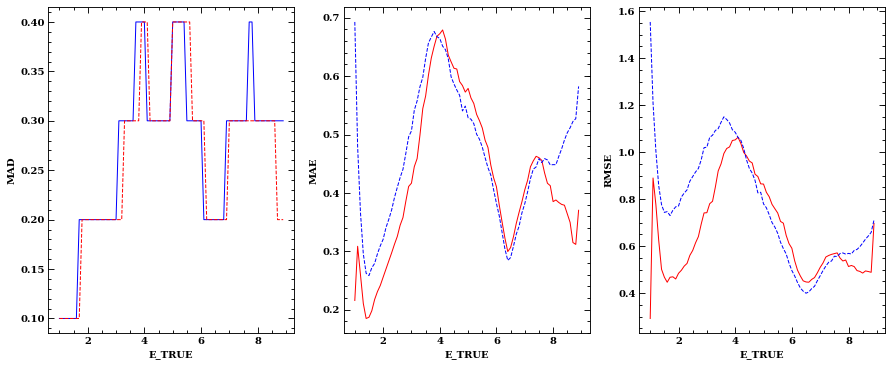

In [83]:
mom0 = []
mom1 = []
mom2 = []

nn0 = []
nn1=[]
nn2=[]

nn_fw = []
mom_fw = []

nn_rmse = []
mom_rmse = []


for e1,e2 in pairwise(np.linspace(1,9,81) - 0.05):
    cut_nn = (data['NN_ENERGY'] >= e1) * (data['NN_ENERGY'] <= e2)
    cut_mom = (data['MOM_ENERGY'] >= e1) * (data['MOM_ENERGY'] <= e2)
    nn = data['ENERGY'][cut_nn]
    mom = data['ENERGY'][cut_mom]
#     nn = np.array([E_correct(x) for x in nn])
    
    nn0.append(mad(nn, side=0))
    nn1.append(mad(nn, side=1))
    nn2.append(mad(nn, side=-1))
    nn_fw.append(np.mean(np.abs(nn-(e1/2+e2/2))))
    nn_rmse.append(np.sqrt(np.mean((nn-(e1/2+e2/2))**2)))
    
    mom0.append(mad(mom, side=0))
    mom1.append(mad(mom, side=1))
    mom2.append(mad(mom, side=-1))
    mom_fw.append(np.mean(np.abs(mom-(e1/2+e2/2))))
    mom_rmse.append(np.sqrt(np.mean((mom-(e1/2+e2/2))**2)))

_, (ax1,ax2,ax3) = plt.subplots(figsize=(15,6),ncols=3)
ax1.plot(E,mom0,'b')
ax1.plot(E,nn0,'r')
ax1.set_ylabel('MAD')
ax1.set_xlabel('E_TRUE')

ax2.plot(E,nn_fw,'r')
ax2.plot(E,mom_fw,'b')
ax2.set_xlabel('E_TRUE')
ax2.set_ylabel('MAE')


ax3.plot(E,nn_rmse,'r')
ax3.plot(E,mom_rmse,'b')
ax3.set_xlabel('E_TRUE')
ax3.set_ylabel('RMSE')

Text(0,0.5,'RMSE')

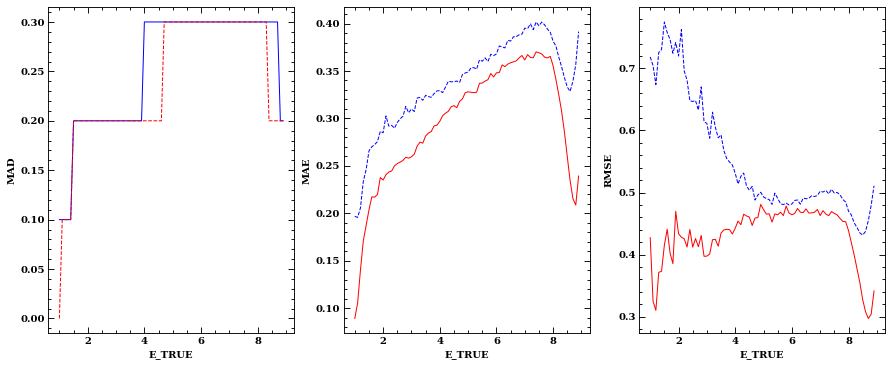

In [81]:
mom0 = []
mom1 = []
mom2 = []

nn0 = []
nn1=[]
nn2=[]

nn_fw = []
mom_fw = []

nn_rmse = []
mom_rmse = []


for e1,e2 in pairwise(np.linspace(1,9,81) - 0.05):
    cut_nn = (data['NN_ENERGY'] >= e1) * (data['NN_ENERGY'] <= e2)
    cut_mom = (data['MOM_ENERGY'] >= e1) * (data['MOM_ENERGY'] <= e2)
    nn = data['ENERGY'][cut_nn]
    mom = data['ENERGY'][cut_mom]
#     nn = np.array([E_correct(x) for x in nn])
    
    nn0.append(mad(nn, side=0))
    nn1.append(mad(nn, side=1))
    nn2.append(mad(nn, side=-1))
    nn_fw.append(np.mean(np.abs(nn-(e1/2+e2/2))))
    nn_rmse.append(np.sqrt(np.mean((nn-(e1/2+e2/2))**2)))
    
    mom0.append(mad(mom, side=0))
    mom1.append(mad(mom, side=1))
    mom2.append(mad(mom, side=-1))
    mom_fw.append(np.mean(np.abs(mom-(e1/2+e2/2))))
    mom_rmse.append(np.sqrt(np.mean((mom-(e1/2+e2/2))**2)))

_, (ax1,ax2,ax3) = plt.subplots(figsize=(15,6),ncols=3)
ax1.plot(E,mom0,'b')
ax1.plot(E,nn0,'r')
ax1.set_ylabel('MAD')
ax1.set_xlabel('E_TRUE')

ax2.plot(E,nn_fw,'r')
ax2.plot(E,mom_fw,'b')
ax2.set_xlabel('E_TRUE')
ax2.set_ylabel('MAE')


ax3.plot(E,nn_rmse,'r')
ax3.plot(E,mom_rmse,'b')
ax3.set_xlabel('E_TRUE')
ax3.set_ylabel('RMSE')


In [100]:
with fits.open(home_dir + 'pol_heads3_train___pol_heads_ensemble3__ensemble.fits', memmap=False) as hdu:
    data = hdu[1].data

In [113]:
bins=np.linspace(1,9,81)+0.05

0.53118974 0.4423652
0.32929847 0.29690373
0.29999995 0.20000005
19158 18894
1.0845993 1.052128
0.66446227 0.67250144
0.3000002 0.4000001
10479 10546


Text(0.5,0,'E_TRUE')

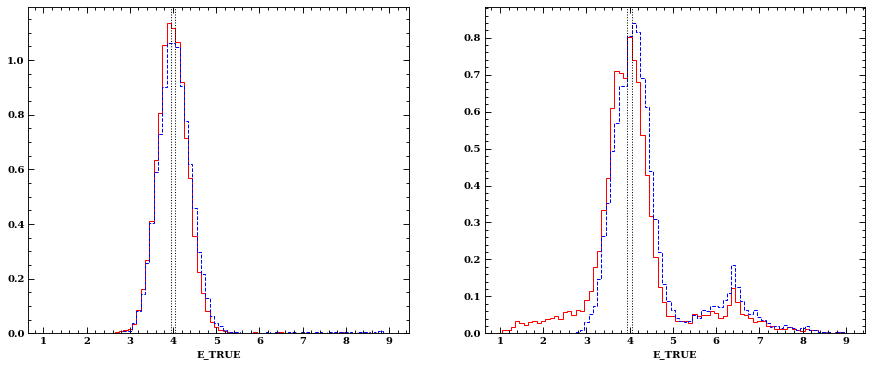

In [124]:
e = 4.0
e1 = e-0.05
e2 = e+0.05
_, (ax1,ax2) = plt.subplots(figsize=(15,6),ncols=2)

with fits.open(home_dir + 'pol_heads3_train___pol_heads_ensemble3__ensemble.fits', memmap=False) as hdu:
    data = hdu[1].data

cut_nn = (data['NN_ENERGY'] >= e1) * (data['NN_ENERGY'] <= e2)
cut_mom = (data['MOM_ENERGY'] >= e1) * (data['MOM_ENERGY'] <= e2)
nn = data['ENERGY'][cut_nn]
mom = data['ENERGY'][cut_mom]

print(np.sqrt(np.mean((mom-e)**2)), np.sqrt(np.mean((nn-e)**2)))
print(np.mean(np.abs(mom-e)), np.mean(np.abs(nn-e)))
print(np.median(np.abs(mom-e)), np.median(np.abs(nn-e)))
print(len(mom),len(nn))
hist = ax1.hist(nn,histtype='step',color='r',bins=bins,density=True)
hist = ax1.hist(mom,histtype='step',color='b',bins=bins,density=True)
ax1.axvline(e1,ls=':')
ax1.axvline(e2,ls=':')
ax1.set_xlabel('E_TRUE')

with fits.open(home_dir + '/newpaper_pol_train___newpaper_pol_bess_rand_geo__ensemble.fits', memmap=False) as hdu:
    data = hdu[1].data

cut_nn = (data['NN_ENERGY'] >= e1) * (data['NN_ENERGY'] <= e2)
cut_mom = (data['MOM_ENERGY'] >= e1) * (data['MOM_ENERGY'] <= e2)
nn = data['ENERGY'][cut_nn]
mom = data['ENERGY'][cut_mom]

print(np.sqrt(np.mean((mom-e)**2)), np.sqrt(np.mean((nn-e)**2)))
print(np.mean(np.abs(mom-e)), np.mean(np.abs(nn-e)))
print(np.median(np.abs(mom-e)), np.median(np.abs(nn-e)))
print(len(mom),len(nn))
hist = ax2.hist(nn,histtype='step',color='r',bins=bins,density=True)
hist = ax2.hist(mom,histtype='step',color='b',bins=bins,density=True)
ax2.axvline(e1,ls=':')
ax2.axvline(e2,ls=':')
ax2.set_xlabel('E_TRUE')

In [182]:
E_recovered = np.array([E_correct(e) for e in data['NN_ENERGY']])

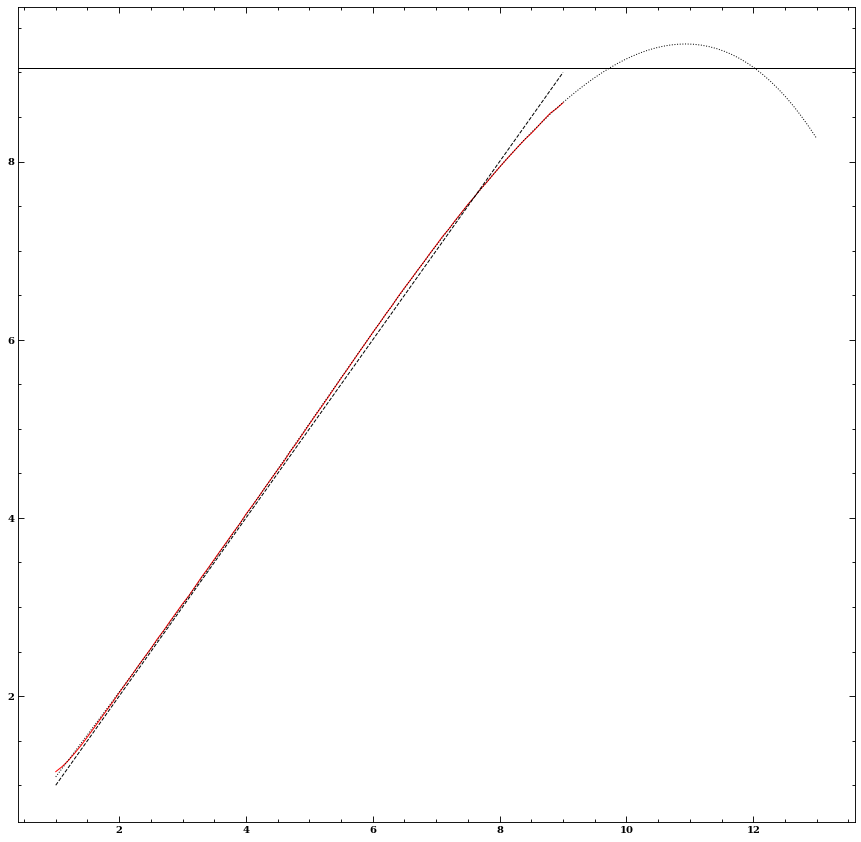

In [123]:
medians = []
medians_mom = []
for e in E:
    cut = (data['ENERGY'] == e)

    med = np.median(data['NN_ENERGY'][cut])
    dev = stats.median_absolute_deviation(data['NN_ENERGY'][cut])
    cut_q = (data['NN_ENERGY'][cut] > med - 3.5*dev) * (data['NN_ENERGY'][cut] < med + 3.5*dev)
    medians.append(np.median(data['NN_ENERGY'][cut][cut_q]) )
    
    med = np.median(data['MOM_ENERGY'][cut])
    dev = stats.median_absolute_deviation(data['MOM_ENERGY'][cut])
    cut_q = (data['MOM_ENERGY'][cut] > med - 3.5*dev) * (data['MOM_ENERGY'][cut] < med + 3.5*dev)
    medians_mom.append(np.median(data['MOM_ENERGY'][cut][cut_q]))

plt.figure(figsize=(15,15))
plt.plot(E,medians,"r")
plt.plot(E,E,"k")
# plt.plot(E,medians_mom,"b")
# plt.axhline(0,ls=":",color="k")
e1, e0 = np.polyfit(E,medians_mom,1)
# plt.plot(E, e0 + e1*np.array(E))
e4, e3, e2, e1, e0 = np.polyfit(E,medians,4)
x = np.linspace(1,13,100)
plt.axhline(9.05)
plt.plot(x, e0 + e1*x + e2*x**2+ e3*x**3 + e4*x**4)
# plt.plot(x,[E_correct(X) for X in x], 'b')

In [157]:
def E_correct(pred):
    """
    """
#     e5,e4,e3 = -0.00010832113846986568, 0.0021686712392714295, -0.019489886251797043, 
#     e2,e1,e0 = 0.09970907563202648, 0.7406701235056472, 0.28371776331407184
    pred = min(pred,9.31995)
    roots = np.roots([e4,e3,e2,e1,e0-pred])
    real_roots = np.real(roots[np.imag(roots) == 0])
    e = real_roots[(real_roots < 11) & (real_roots > 0)][0]
    return e

(array([2.37327994e-03, 7.91091254e-04, 1.58218663e-03, 7.91091254e-04,
        5.53765319e-03, 1.18663997e-02, 2.37327376e-02, 3.24348258e-02,
        7.11982129e-02, 9.09757310e-02, 1.46352263e-01, 2.37327376e-01,
        3.25139352e-01, 4.39055646e-01, 5.45063293e-01, 7.16730542e-01,
        8.86815604e-01, 1.06559715e+00, 1.17952013e+00, 1.33061895e+00,
        1.39232423e+00, 1.41763922e+00, 1.42316946e+00, 1.49041980e+00,
        1.33932098e+00, 1.24992743e+00, 1.12493469e+00, 1.01971397e+00,
        8.39350005e-01, 7.48374274e-01, 5.92528892e-01, 5.21330493e-01,
        4.20859452e-01, 3.17228419e-01, 2.48403300e-01, 1.69293969e-01,
        1.22619464e-01, 9.65128819e-02, 6.24963717e-02, 3.79724790e-02,
        3.08526392e-02, 1.58218663e-02, 1.50306947e-02, 6.32874651e-03,
        6.32874651e-03, 5.53765319e-03, 1.58218663e-03, 7.91089195e-04,
        7.91093313e-04, 7.91093313e-04]),
 array([1.266449 , 1.3122537, 1.3580586, 1.4038633, 1.4496682, 1.4954729,
        1.5412776, 1

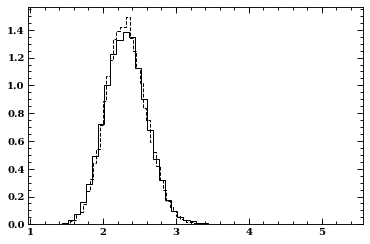

In [161]:
e=2.3
nn = data['NN_ENERGY'][data['ENERGY'] == e]
nn = np.array([E_correct(x) for x in nn])
plt.hist(nn,histtype='step',density=True)
plt.hist(data['MOM_ENERGY'][data['ENERGY'] == e],histtype='step',density=True)

1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
3.0
3.1
3.2
3.3
3.4
3.5
3.6
3.7
3.8
3.9
4.0
4.1
4.2
4.3
4.4
4.5
4.6
4.7
4.8
4.9
5.0
5.1
5.2
5.3
5.4
5.5
5.6
5.7
5.8
5.9
6.0
6.1
6.2
6.3
6.4
6.5
6.6
6.7
6.8
6.9
7.0
7.1
7.2
7.3
7.4
7.5
7.6
7.7
7.8
7.9
8.0
8.1
8.2
8.3
8.4
8.5
8.6
8.7
8.8
8.9
9.0


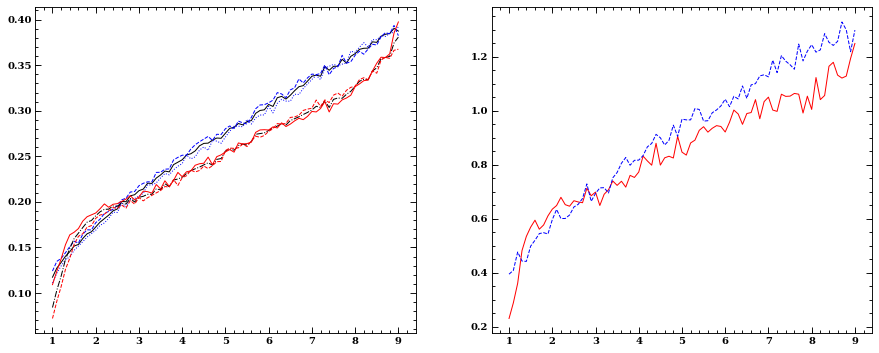

In [158]:
mom0 = []
mom1 = []
mom2 = []

nn0 = []
nn1=[]
nn2=[]

nn_fw = []
mom_fw = []

for e in E:
    print(e)
    nn = data['NN_ENERGY'][data['ENERGY'] == e]
    mom = data['MOM_ENERGY'][data['ENERGY'] == e]
    nn = np.array([E_correct(x) for x in nn])
    
    nn0.append(mad(nn, side=0))
    nn1.append(mad(nn, side=1))
    nn2.append(mad(nn, side=-1))
    nn_fw.append(fwhm(nn))
    
    mom0.append(mad(mom, side=0))
    mom1.append(mad(mom, side=1))
    mom2.append(mad(mom, side=-1))
    mom_fw.append(fwhm(mom))

_, (ax1,ax2) = plt.subplots(figsize=(15,6),ncols=2)
ax1.plot(E,mom0)
ax1.plot(E,mom1,'b')
ax1.plot(E,mom2,'b')
ax1.plot(E,nn0)
ax1.plot(E,nn1,'r')
ax1.plot(E,nn2,'r')

ax2.plot(E,nn_fw,'r')
ax2.plot(E,mom_fw,'b')

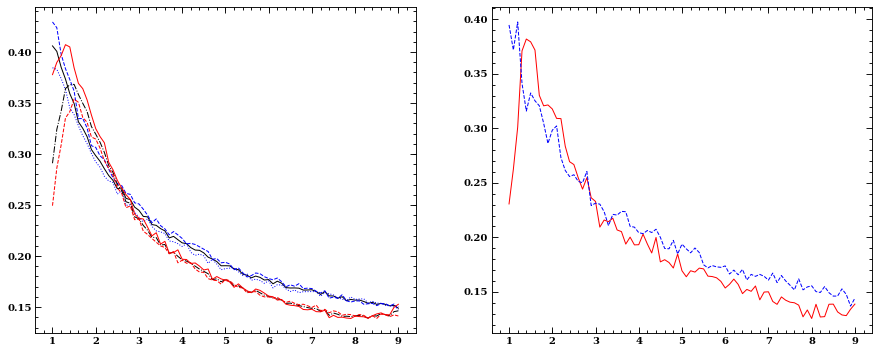

In [163]:
_, (ax1,ax2) = plt.subplots(figsize=(15,6),ncols=2)
ax1.plot(E,3.46 *np.array(mom0)/np.array(E))
ax1.plot(E,3.46 *np.array(mom1)/np.array(E),'b')
ax1.plot(E,3.46 *np.array(mom2)/np.array(E),'b')
ax1.plot(E,3.46 *np.array(nn0)/np.array(E))
ax1.plot(E,3.46 *np.array(nn1)/np.array(E),'r')
ax1.plot(E,3.46 *np.array(nn2)/np.array(E),'r')
ax1.plot()

ax2.plot(E,np.array(nn_fw)/np.array(E),'r')
ax2.plot(E,np.array(mom_fw)/np.array(E),'b')

27635 31655
(0.007060558375637522, -1.4163875687334002) (0.007704923165342956, -1.429254194248627)


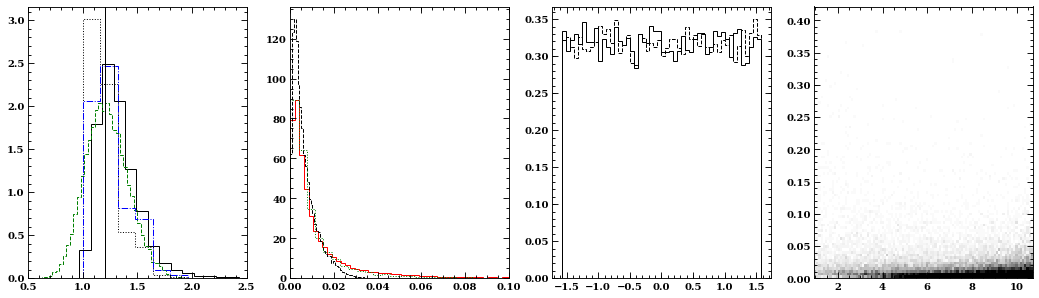

In [76]:
_, (ax1,ax2,ax3,ax4) = plt.subplots(figsize=(18,5),ncols=4)
e = 1.2

hist = ax1.hist(data['NN_ENERGY'][data['ENERGY'] == e],histtype="step",density=True)
hist = ax1.hist(data['MOM_ENERGY'][data['ENERGY'] == e],histtype="step",density=True,color='g')
hist = ax1.hist(data['ENERGY'][(data['NN_ENERGY'] <= 0.05+e) & (data['NN_ENERGY'] >= e-0.05)],histtype="step",density=True)
hist = ax1.hist(data['ENERGY'][(data['MOM_ENERGY'] <= 0.05+e) & (data['MOM_ENERGY'] >= e-0.05)],histtype="step",density=True,color='b')
ax1.set_xlim(0.5,2.5)
ax1.axvline(e)
print(len(data['NN_ENERGY'][data['ENERGY'] == e]), len(data['ENERGY'][(data['NN_ENERGY'] <= 0.05+e)& (data['NN_ENERGY'] >= e-0.05)]))
# hist = ax1.hist(data['MOM_ENERGY'][data['ENERGY'] == e],histtype="step",density=True)
# hist = ax1.hist(data['ENERGY'],histtype="step",density=True)

hist = ax2.hist((data['NN_WEIGHT']*data['NN_WEIGHT_EPIS'])[data['ENERGY'] == e],histtype="step",density=True,color='r',bins=200)
hist = ax2.hist((data['NN_WEIGHT']*data['NN_WEIGHT_EPIS'])[(data['NN_ENERGY'] <= 0.05+e) & (data['NN_ENERGY'] >= e-0.05)],histtype="step",density=True)
hist = ax2.hist((data['NN_WEIGHT']*data['NN_WEIGHT_EPIS'])[(data['MOM_ENERGY'] <= 0.05+e) & (data['MOM_ENERGY'] >= e-0.05)],
                histtype="step",density=True,color='g',bins=200)
ax2.set_xlim(0,0.1)


hist = ax3.hist(pi2_pi2(data['NN_PHI'][data['ENERGY'] == e]),histtype="step",density=True)
hist = ax3.hist(pi2_pi2(data['MOM_PHI'][data['ENERGY'] == e]),histtype="step",density=True)
print(stokes(data['NN_PHI'][data['ENERGY'] == e]),stokes(data['MOM_PHI'][data['ENERGY'] == e]))
# hist = ax3.hist(data['PHI'],histtype="step",density=True)

hist = ax4.hist2d(data['XYZ_ABS'][data['ENERGY'] == e][:,2],(data['NN_WEIGHT']*data['NN_WEIGHT_EPIS'])[data['ENERGY'] == e],
bins=(100, 100), cmap=plt.cm.binary,vmax=50)


No handles with labels found to put in legend.
/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


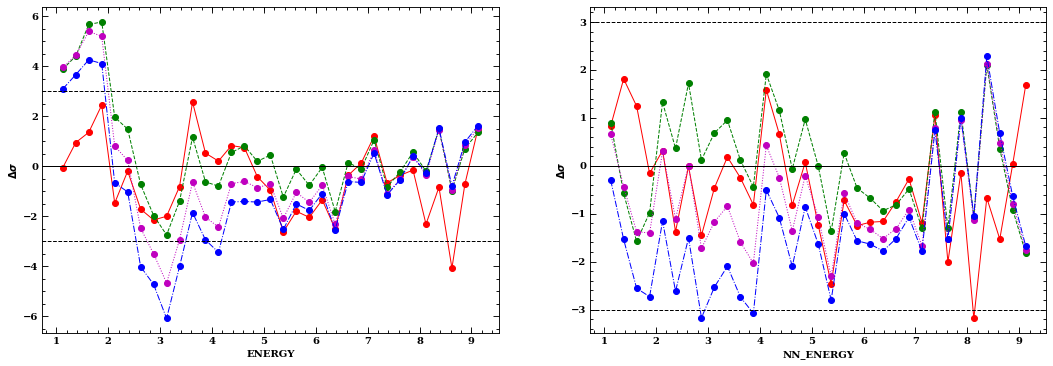

In [35]:
xrange = np.linspace(1,9,33)
offset = 0.25

_, axs = plt.subplots(figsize=(18,6), ncols=2)
for p, ax in enumerate(axs):
    true_mu = []
    theory_mu = []
    true_mu_err = []
    mu_E = []
    mu_Erec = []
    mu_W = []
    mu_Wsplit = []
    if p:
        plot_energy = 'NN_ENERGY'
    else:
        plot_energy = 'ENERGY'
    for x in xrange:
        cut = (data[plot_energy] < x+offset) * (data[plot_energy] >= x) #* (data['XYZ_ABS'][:,2] > 0.9) * (data['XYZ_ABS'][:,2] < 10.75)
    #     cut = (data['NN_ENERGY'] < 7) * (data['NN_ENERGY'] >= 6.5)
    #     cut += (data['NN_ENERGY'] < 3) * (data['NN_ENERGY'] >= 1)
        tail_cut = (data['XYZ_ABS'][:,2] > 0.9) * (data['XYZ_ABS'][:,2] < 10.75)
        tail_cut_top = (data['XYZ_ABS'][:,2] >= 10.75)
        tail_cut_bottom = (data['XYZ_ABS'][:,2] <= 0.9) 
        angs = data['NN_PHI'][cut]
        errs = weightVM(np.sqrt(data['NN_SIGMA']**2 + 4*data['NN_SIGMA_EPIS']**2))[cut]
    #     errs = weightVM(data['NN_SIGMA'][cut])
        energies = data['ENERGY'][cut]
        energies_rec = data['NN_ENERGY'][cut]
        errs_notail = weightVM(data['NN_SIGMA'][cut * tail_cut])
        errs_tail_top = weightVM(data['NN_SIGMA'][cut * tail_cut_top])
        errs_tail_bottom = weightVM(data['NN_SIGMA'][cut * tail_cut_bottom])


        mu1, phi1, Neff1 = weighted_stokes(angs,errs,1)
        Q = np.sum(errs * np.cos(2*angs))
        U = np.sum(errs * np.sin(2*angs))
        mu1_err = mu_error_stokes(Q, U, mu1, phi1, Neff1)

        muE = np.sum(mu_funcE(energies)
                   * errs) / np.sum(errs)

        muErec = np.sum(mu_funcErec(energies_rec)
                   * errs) / np.sum(errs)

        muW = np.sum(mu_func3(errs)
                   * errs) / np.sum(errs)

        errs =  weightVM(np.sqrt(data['NN_SIGMA'][cut]**2))
        muTh = np.sum(errs**2) / np.sum(errs)

#         muWsplit = (np.sum(mu_func4(errs_notail)
#                        * errs_notail) + np.sum(mu_func5(errs_tail_bottom)
#                        * errs_tail_bottom) + np.sum(mu_func6(errs_tail_top)
#                        * errs_tail_top))  / (np.sum(errs_notail) + np.sum(errs_tail_bottom) + np.sum(errs_tail_top))

        muWsplit = np.sum(mu_func4(errs)
                   * errs) / np.sum(errs)

        true_mu.append(mu1)
        mu_E.append(muE)
        mu_Erec.append(muErec)
        mu_Wsplit.append(muWsplit)
        mu_W.append(muW)
        theory_mu.append(muTh)
        true_mu_err.append(mu1_err)
    #     print(mu1,mu1_err,mu2,)
    
    if not p:
        ax.plot(xrange+offset/2,(np.array(mu_E) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='r')
    else:
        ax.plot(xrange+offset/2,(np.array(mu_Erec) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='r')
    ax.plot(xrange+offset/2,(np.array(mu_W) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='g')
    ax.plot(xrange+offset/2,(np.array(mu_Wsplit) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='m')
    ax.plot(xrange+offset/2,(np.array(theory_mu) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='b')
    ax.axhline(0,ls='-')
    ax.axhline(3,ls='--')
    ax.axhline(-3,ls='--')
    ax.set_ylabel(r"$\Delta\sigma$")
    ax.set_xlabel(r"{}".format(plot_energy))

# # ax1.plot(xrange+offset/2, mu_E, color='r', label=r"$\mu_{100}(E)$")
# # ax1.plot(xrange+offset/2, mu_Erec, color='orange', label=r"$\mu_{100}(E_{rec})$")
# ax1.plot(xrange+offset/2, mu_W, color='g', label=r"$\mu_{100}(W)$")
# ax1.plot(xrange+offset/2, mu_Wsplit, color='m', label=r"$\mu_{100}(W)$ Tail")
# ax1.plot(xrange+offset/2, theory_mu,color='b', label="Perfect Weights")
# ax1.errorbar(xrange+offset/2, true_mu, yerr=true_mu_err, label="True")
# ax1.set_ylabel(r"$\mu_{100}$")
# ax1.set_xlabel(r"$E_{rec}$")

leg = ax.legend(loc = 4,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())


name = "mu100_energy_rec"
# plt.savefig("plots/" + name + ".pdf",format="pdf")


/home/groups/rwr/alpv95/tracksml/util/methods.py:113: RuntimeWarning: invalid value encountered in double_scalars
  mu = np.sqrt(Q**2 + U**2) / I
/home/groups/rwr/alpv95/tracksml/util/methods.py:115: RuntimeWarning: invalid value encountered in double_scalars
  Neff = I**2 / np.sum(weights**(2*lambd))
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in float_scalars
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in float_scalars
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in float_scalars
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in float_scalars
/share/software/user/open/py-jupyter/1.0.0_py36/lib/p

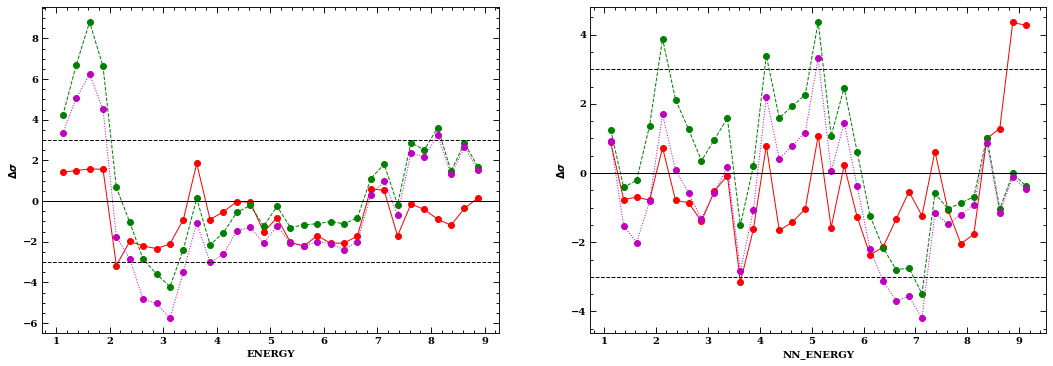

In [18]:
xrange = np.linspace(1,9,33)
offset = 0.25

_, axs = plt.subplots(figsize=(18,6), ncols=2)
for p, ax in enumerate(axs):
    true_mu = []
    theory_mu = []
    theory_mu2 = []
    true_mu_err = []
    mu_E = []
    mu_Erec = []
    mu_W = []
    mu_Wsplit = []
    if p:
        plot_energy = 'NN_ENERGY'
    else:
        plot_energy = 'ENERGY'
    for x in xrange:
        cut = (data[plot_energy] < x+offset) * (data[plot_energy] >= x) #* (data['XYZ_ABS'][:,2] > 0.9) * (data['XYZ_ABS'][:,2] < 10.75)
    #     cut = (data['NN_ENERGY'] < 7) * (data['NN_ENERGY'] >= 6.5)
    #     cut += (data['NN_ENERGY'] < 3) * (data['NN_ENERGY'] >= 1)
        tail_cut = (data['XYZ_ABS'][:,2] > 0.9) * (data['XYZ_ABS'][:,2] < 10.75)
        tail_cut_top = (data['XYZ_ABS'][:,2] >= 10.75)
        tail_cut_bottom = (data['XYZ_ABS'][:,2] <= 0.9) 
        angs = data['NN_PHI'][cut]
        errs = data['NN_WEIGHT'][cut]*data['NN_WEIGHT_EPIS'][cut]
        energies = data['ENERGY'][cut]
        energies_rec = data['NN_ENERGY'][cut]
        errs_notail = data['NN_WEIGHT'][cut * tail_cut]
        errs_tail_top = data['NN_WEIGHT'][cut * tail_cut_top]
        errs_tail_bottom = data['NN_WEIGHT'][cut * tail_cut_bottom]


        mu1, phi1, Neff1 = weighted_stokes(angs,errs,1)
        Q = np.sum(errs * np.cos(2*angs))
        U = np.sum(errs * np.sin(2*angs))
        mu1_err = mu_error_stokes(Q, U, mu1, phi1, Neff1)

        muE = np.sum(mu_funcE(energies)
                   * errs) / np.sum(errs)

        muErec = np.sum(mu_funcErec(energies_rec)
                   * errs) / np.sum(errs)

        muW = np.sum(mu_func3(errs)
                   * errs) / np.sum(errs)
        
        muTh2 = np.sum(errs**2) / np.sum(errs)
        errs = data['NN_WEIGHT'][cut]
        muTh = np.sum(errs**2) / np.sum(errs)

#         muWsplit = (np.sum(mu_func4(errs_notail)
#                        * errs_notail) + np.sum(mu_func5(errs_tail_bottom)
#                        * errs_tail_bottom) + np.sum(mu_func6(errs_tail_top)
#                        * errs_tail_top))  / (np.sum(errs_notail) + np.sum(errs_tail_bottom) + np.sum(errs_tail_top))

        muWsplit = np.sum(mu_func4(errs)
                   * errs) / np.sum(errs)

        true_mu.append(mu1)
        mu_E.append(muE)
        mu_Erec.append(muErec)
        mu_Wsplit.append(muWsplit)
        mu_W.append(muW)
        theory_mu.append(muTh)
        theory_mu2.append(muTh2)
        true_mu_err.append(mu1_err)
    #     print(mu1,mu1_err,mu2,)
    
    if not p:
        ax.plot(xrange+offset/2,(np.array(mu_E) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='r')
    else:
        ax.plot(xrange+offset/2,(np.array(mu_Erec) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='r')
    ax.plot(xrange+offset/2,(np.array(mu_W) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='g')
    ax.plot(xrange+offset/2,(np.array(mu_Wsplit) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='m')
#     ax.plot(xrange+offset/2,(np.array(theory_mu) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='b')
#     ax.plot(xrange+offset/2,(np.array(theory_mu2) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='b',ls='--')

    ax.axhline(0,ls='-')
    ax.axhline(3,ls='--')
    ax.axhline(-3,ls='--')
    ax.set_ylabel(r"$\Delta\sigma$")
    ax.set_xlabel(r"{}".format(plot_energy))

# # ax1.plot(xrange+offset/2, mu_E, color='r', label=r"$\mu_{100}(E)$")
# # ax1.plot(xrange+offset/2, mu_Erec, color='orange', label=r"$\mu_{100}(E_{rec})$")
# ax1.plot(xrange+offset/2, mu_W, color='g', label=r"$\mu_{100}(W)$")
# ax1.plot(xrange+offset/2, mu_Wsplit, color='m', label=r"$\mu_{100}(W)$ Tail")
# ax1.plot(xrange+offset/2, theory_mu,color='b', label="Perfect Weights")
# ax1.errorbar(xrange+offset/2, true_mu, yerr=true_mu_err, label="True")
# ax1.set_ylabel(r"$\mu_{100}$")
# ax1.set_xlabel(r"$E_{rec}$")

leg = ax.legend(loc = 4,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())


name = "mu100_energy_rec"
# plt.savefig("plots/" + name + ".pdf",format="pdf")

/home/groups/rwr/alpv95/tracksml/util/methods.py:113: RuntimeWarning: invalid value encountered in double_scalars
  mu = np.sqrt(Q**2 + U**2) / I
/home/groups/rwr/alpv95/tracksml/util/methods.py:115: RuntimeWarning: invalid value encountered in double_scalars
  Neff = I**2 / np.sum(weights**(2*lambd))
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in float_scalars
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in float_scalars
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in float_scalars
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in float_scalars
/share/software/user/open/py-jupyter/1.0.0_py36/lib/p

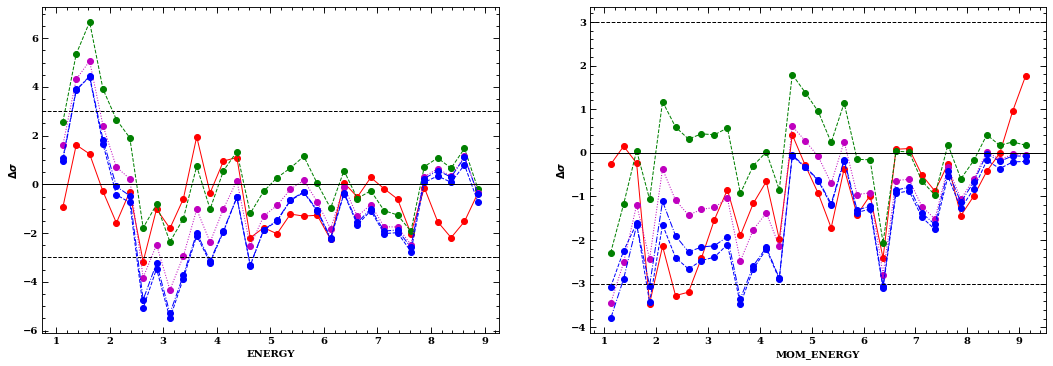

In [9]:
xrange = np.linspace(1,9,33)
offset = 0.25

_, axs = plt.subplots(figsize=(18,6), ncols=2)
for p, ax in enumerate(axs):
    true_mu = []
    theory_mu = []
    theory_mu2 = []
    true_mu_err = []
    mu_E = []
    mu_Erec = []
    mu_W = []
    mu_Wsplit = []
    if p:
        plot_energy = 'MOM_ENERGY'
    else:
        plot_energy = 'ENERGY'
    for x in xrange:
        cut = (data[plot_energy] < x+offset) * (data[plot_energy] >= x) #* (data['XYZ_ABS'][:,2] > 0.9) * (data['XYZ_ABS'][:,2] < 10.75)
    #     cut = (data['NN_ENERGY'] < 7) * (data['NN_ENERGY'] >= 6.5)
    #     cut += (data['NN_ENERGY'] < 3) * (data['NN_ENERGY'] >= 1)
        tail_cut = (data['XYZ_ABS'][:,2] > 0.9) * (data['XYZ_ABS'][:,2] < 10.75)
        tail_cut_top = (data['XYZ_ABS'][:,2] >= 10.75)
        tail_cut_bottom = (data['XYZ_ABS'][:,2] <= 0.9) 
        angs = data['NN_PHI'][cut]
        errs = data['NN_WEIGHT'][cut]*data['NN_WEIGHT_EPIS'][cut]
        energies = data['ENERGY'][cut]
        energies_rec = data['NN_ENERGY'][cut]
        errs_notail = data['NN_WEIGHT'][cut * tail_cut]
        errs_tail_top = data['NN_WEIGHT'][cut * tail_cut_top]
        errs_tail_bottom = data['NN_WEIGHT'][cut * tail_cut_bottom]


        mu1, phi1, Neff1 = weighted_stokes(angs,errs,1)
        Q = np.sum(errs * np.cos(2*angs))
        U = np.sum(errs * np.sin(2*angs))
        mu1_err = mu_error_stokes(Q, U, mu1, phi1, Neff1)

        muE = np.sum(mu_funcE(energies)
                   * errs) / np.sum(errs)

        muErec = np.sum(mu_funcErec(energies_rec)
                   * errs) / np.sum(errs)

        muW = np.sum(mu_func3(errs)
                   * errs) / np.sum(errs)
        
        muTh2 = np.sum(errs**2) / np.sum(errs)
        errs = data['NN_WEIGHT'][cut]
        muTh = np.sum(errs**2) / np.sum(errs)

#         muWsplit = (np.sum(mu_func4(errs_notail)
#                        * errs_notail) + np.sum(mu_func5(errs_tail_bottom)
#                        * errs_tail_bottom) + np.sum(mu_func6(errs_tail_top)
#                        * errs_tail_top))  / (np.sum(errs_notail) + np.sum(errs_tail_bottom) + np.sum(errs_tail_top))

        muWsplit = np.sum(mu_func4(errs)
                   * errs) / np.sum(errs)

        true_mu.append(mu1)
        mu_E.append(muE)
        mu_Erec.append(muErec)
        mu_Wsplit.append(muWsplit)
        mu_W.append(muW)
        theory_mu.append(muTh)
        theory_mu2.append(muTh2)
        true_mu_err.append(mu1_err)
    #     print(mu1,mu1_err,mu2,)
    
    if not p:
        ax.plot(xrange+offset/2,(np.array(mu_E) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='r')
    else:
        ax.plot(xrange+offset/2,(np.array(mu_Erec) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='r')
    ax.plot(xrange+offset/2,(np.array(mu_W) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='g')
    ax.plot(xrange+offset/2,(np.array(mu_Wsplit) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='m')
    ax.plot(xrange+offset/2,(np.array(theory_mu) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='b')
    ax.plot(xrange+offset/2,(np.array(theory_mu2) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='b',ls='--')

    ax.axhline(0,ls='-')
    ax.axhline(3,ls='--')
    ax.axhline(-3,ls='--')
    ax.set_ylabel(r"$\Delta\sigma$")
    ax.set_xlabel(r"{}".format(plot_energy))

# # ax1.plot(xrange+offset/2, mu_E, color='r', label=r"$\mu_{100}(E)$")
# # ax1.plot(xrange+offset/2, mu_Erec, color='orange', label=r"$\mu_{100}(E_{rec})$")
# ax1.plot(xrange+offset/2, mu_W, color='g', label=r"$\mu_{100}(W)$")
# ax1.plot(xrange+offset/2, mu_Wsplit, color='m', label=r"$\mu_{100}(W)$ Tail")
# ax1.plot(xrange+offset/2, theory_mu,color='b', label="Perfect Weights")
# ax1.errorbar(xrange+offset/2, true_mu, yerr=true_mu_err, label="True")
# ax1.set_ylabel(r"$\mu_{100}$")
# ax1.set_xlabel(r"$E_{rec}$")

leg = ax.legend(loc = 4,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())


name = "mu100_energy_rec"
# plt.savefig("plots/" + name + ".pdf",format="pdf")

No handles with labels found to put in legend.
/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


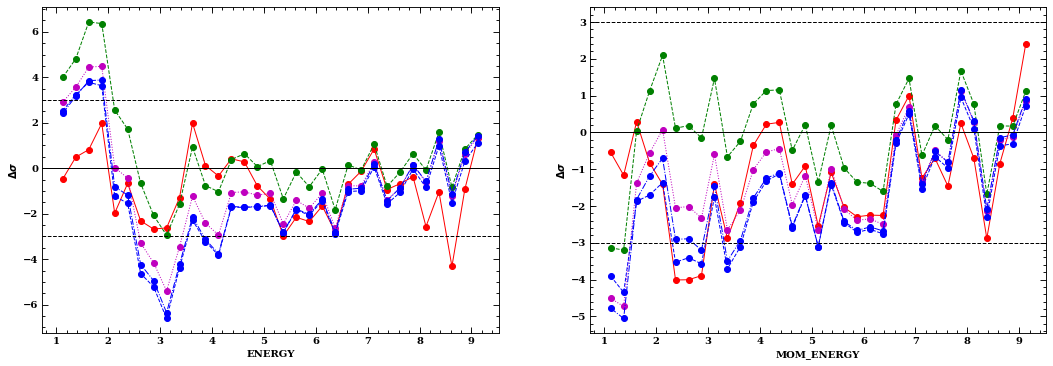

In [79]:
xrange = np.linspace(1,9,33)
offset = 0.25

_, axs = plt.subplots(figsize=(18,6), ncols=2)
for p, ax in enumerate(axs):
    true_mu = []
    theory_mu = []
    theory_mu2 = []
    true_mu_err = []
    mu_E = []
    mu_Erec = []
    mu_W = []
    mu_Wsplit = []
    if p:
        plot_energy = 'MOM_ENERGY'
    else:
        plot_energy = 'ENERGY'
    for x in xrange:
        cut = (data[plot_energy] < x+offset) * (data[plot_energy] >= x) #* (data['XYZ_ABS'][:,2] > 0.9) * (data['XYZ_ABS'][:,2] < 10.75)
    #     cut = (data['NN_ENERGY'] < 7) * (data['NN_ENERGY'] >= 6.5)
    #     cut += (data['NN_ENERGY'] < 3) * (data['NN_ENERGY'] >= 1)
        tail_cut = (data['XYZ_ABS'][:,2] > 0.9) * (data['XYZ_ABS'][:,2] < 10.75)
        tail_cut_top = (data['XYZ_ABS'][:,2] >= 10.75)
        tail_cut_bottom = (data['XYZ_ABS'][:,2] <= 0.9) 
        angs = data['NN_PHI'][cut]
        errs = data['NN_WEIGHT'][cut]*data['NN_WEIGHT_EPIS'][cut]
        energies = data['ENERGY'][cut]
        energies_rec = data['NN_ENERGY'][cut]
        errs_notail = data['NN_WEIGHT'][cut * tail_cut]
        errs_tail_top = data['NN_WEIGHT'][cut * tail_cut_top]
        errs_tail_bottom = data['NN_WEIGHT'][cut * tail_cut_bottom]


        mu1, phi1, Neff1 = weighted_stokes(angs,errs,1)
        Q = np.sum(errs * np.cos(2*angs))
        U = np.sum(errs * np.sin(2*angs))
        mu1_err = mu_error_stokes(Q, U, mu1, phi1, Neff1)

        muE = np.sum(mu_funcE(energies)
                   * errs) / np.sum(errs)

        muErec = np.sum(mu_funcErec(energies_rec)
                   * errs) / np.sum(errs)

        muW = np.sum(mu_func3(errs)
                   * errs) / np.sum(errs)
        
        muTh2 = np.sum(errs**2) / np.sum(errs)
        errs = data['NN_WEIGHT'][cut]
        muTh = np.sum(errs**2) / np.sum(errs)

#         muWsplit = (np.sum(mu_func4(errs_notail)
#                        * errs_notail) + np.sum(mu_func5(errs_tail_bottom)
#                        * errs_tail_bottom) + np.sum(mu_func6(errs_tail_top)
#                        * errs_tail_top))  / (np.sum(errs_notail) + np.sum(errs_tail_bottom) + np.sum(errs_tail_top))

        muWsplit = np.sum(mu_func4(errs)
                   * errs) / np.sum(errs)

        true_mu.append(mu1)
        mu_E.append(muE)
        mu_Erec.append(muErec)
        mu_Wsplit.append(muWsplit)
        mu_W.append(muW)
        theory_mu.append(muTh)
        theory_mu2.append(muTh2)
        true_mu_err.append(mu1_err)
    #     print(mu1,mu1_err,mu2,)
    
    if not p:
        ax.plot(xrange+offset/2,(np.array(mu_E) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='r')
    else:
        ax.plot(xrange+offset/2,(np.array(mu_Erec) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='r')
    ax.plot(xrange+offset/2,(np.array(mu_W) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='g')
    ax.plot(xrange+offset/2,(np.array(mu_Wsplit) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='m')
    ax.plot(xrange+offset/2,(np.array(theory_mu) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='b')
    ax.plot(xrange+offset/2,(np.array(theory_mu2) - np.array(true_mu))/np.array(true_mu_err),marker='o',color='b',ls='--')

    ax.axhline(0,ls='-')
    ax.axhline(3,ls='--')
    ax.axhline(-3,ls='--')
    ax.set_ylabel(r"$\Delta\sigma$")
    ax.set_xlabel(r"{}".format(plot_energy))

# # ax1.plot(xrange+offset/2, mu_E, color='r', label=r"$\mu_{100}(E)$")
# # ax1.plot(xrange+offset/2, mu_Erec, color='orange', label=r"$\mu_{100}(E_{rec})$")
# ax1.plot(xrange+offset/2, mu_W, color='g', label=r"$\mu_{100}(W)$")
# ax1.plot(xrange+offset/2, mu_Wsplit, color='m', label=r"$\mu_{100}(W)$ Tail")
# ax1.plot(xrange+offset/2, theory_mu,color='b', label="Perfect Weights")
# ax1.errorbar(xrange+offset/2, true_mu, yerr=true_mu_err, label="True")
# ax1.set_ylabel(r"$\mu_{100}$")
# ax1.set_xlabel(r"$E_{rec}$")

leg = ax.legend(loc = 4,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())


name = "mu100_energy_rec"
# plt.savefig("plots/" + name + ".pdf",format="pdf")

In [11]:
def MLError(angles, mu_hat, phi_hat):
    denom = (1 + mu_hat*np.cos(2*(angles - phi_hat)))**2
    I00 = np.sum(np.cos(2*(angles - phi_hat))**2 / denom)
    I01 = np.sum(2*np.sin(2*(angles - phi_hat)) / denom)
    I11 = np.sum(4*mu_hat*(mu_hat + np.cos(2*(angles - phi_hat)) ) / denom)
    I = np.array([[I00,I01],[I01,I11]])
    I_1 = np.linalg.inv(I)
    return np.sqrt(I_1[0,0]), np.sqrt(I_1[1,1]), I_1[0,1]/np.sqrt(I_1[0,0]*I_1[1,1])

In [14]:
pErec = np.polyfit(wsErec[:-1], predicted_muErec[:-1], 7)
pE = np.polyfit(E, predicted_muE, 7)
pE_noweight = np.polyfit(E, recovered_muE, 7)
p6 = np.polyfit([0]*30+[1]+ws6, [0]*30+[1]+predicted_mu6, 3)
p5 = np.polyfit([0]*30+[1]+ws5, [0]*30+[1]+predicted_mu5, 3)
p4 = np.polyfit([0]+[1]+ws4, [0]+[1]+predicted_mu4, 7)
p3 = np.polyfit([0,1]+ws3, [0,1]+predicted_mu3, 7)

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


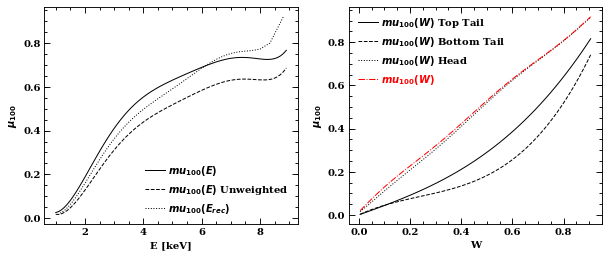

In [15]:
_, (ax1,ax2) = plt.subplots(figsize=(10,4), ncols=2)
mu_funcE = lambda x: np.dot(pE,np.array([x**7,x**6,x**5,x**4,x**3,x**2,x,1]))
mu_funcErec = lambda x: np.dot(pErec,np.array([x**7,x**6,x**5,x**4,x**3,x**2,x,1]))
mu_funcE_noweight = lambda x: np.dot(pE_noweight,np.array([x**7,x**6,x**5,x**4,x**3,x**2,x,1]))
ax1.plot(E, mu_funcE(np.array(E)),label=r"$mu_{100}(E)$")
ax1.plot(E, mu_funcE_noweight(np.array(E)),label=r"$mu_{100}(E)$ Unweighted")
ax1.plot(wsErec, mu_funcErec(np.array(wsErec)),label=r"$mu_{100}(E_{rec})$")
# ax1.errorbar(wsErec,predicted_muErec, yerr=errErec, fmt='o',color='k')
ax1.set_ylabel(r'$\mu_{100}$')
ax1.set_xlabel(r'E [keV]')

leg = ax1.legend(loc = 4,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())


mu_func6 = lambda x: np.dot(p6,np.array([x**3,x**2,x,1]))    
mu_func5 = lambda x: np.dot(p5,np.array([x**3,x**2,x,1]))
mu_func4 = lambda x: np.dot(p4,np.array([x**7,x**6,x**5,x**4,x**3,x**2,x,1]))
mu_func3 = lambda x: np.dot(p3,np.array([x**7,x**6,x**5,x**4,x**3,x**2,x,1]))
ax2.plot(ws4, mu_func6(np.array(ws4)),label=r"$mu_{100}(W)$ Top Tail")
ax2.plot(ws4, mu_func5(np.array(ws4)),label=r"$mu_{100}(W)$ Bottom Tail")
ax2.plot(ws4, mu_func4(np.array(ws4)),label=r"$mu_{100}(W)$ Head")
ax2.plot(ws4, mu_func3(np.array(ws4)),color='r',label=r"$mu_{100}(W)$")
# ax2.errorbar(ws3, predicted_mu3, yerr=err3, fmt='o',color='k')
# ax2.errorbar(ws5, predicted_mu5, yerr=err5, fmt='o',color='b')
ax2.set_xlabel("W")
ax2.set_ylabel(r"$\mu_{100}$")

leg = ax2.legend(loc = 2,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())


name = "mu100_fits"
# plt.savefig("plots/" + name + ".pdf",format="pdf")

In [13]:
step_size = 16000

# result = np.zeros((16,20))
# result_err = np.zeros((16,20))
# weights = data['NN_WEIGHT']*data['NN_WEIGHT_EPIS']
# angles = data['NN_PHI']
# for i,(e1,e2) in enumerate(pairwise([x/2 for x in range(2,19)])):
#     print(e1)
#     cut = (data['MOM_ENERGY'] < e2) * (data['MOM_ENERGY'] >= e1)
# #     weighted_angles = sorted(zip(data['NN_WEIGHT']*data['NN_WEIGHT_EPIS'][cut], data['NN_PHI'][cut]))
#     for j,(w1,w2) in enumerate(pairwise(np.linspace(0,1,21))):
#         cut_w = (weights < w2) * (weights >= w1)
#         final_cut = cut_w * cut
        
#         mu1, phi1, Neff1 = weighted_stokes(angles[final_cut],weights[final_cut],1)
#         mu2, phi2, Neff2 = weighted_stokes(angles,None,1)
#         Q = np.sum(np.cos(2*angles))
#         U = np.sum(np.sin(2*angles))
#         result[i,j] = mu1
#         result_err[i,j] = mu_error_stokes(Q,U,mu1,phi1,Neff1)
        
    

recovered_mu3 = []
predicted_mu3 = []
err3 = []
ws3 = []
i = 0
cut = (data['ENERGY'] < 10) * (data['ENERGY'] >= 0) 
weighted_angles = sorted(zip(data['NN_WEIGHT'][cut]*data['NN_WEIGHT_EPIS'][cut], data['NN_PHI'][cut]))
while True:
    try:
        weights, angles = map(np.array, zip(*weighted_angles[i*step_size:(i+1)*step_size]))
        i += 1
    except:
        break
    print(len(weighted_angles) - i*step_size)
    ws3.append(np.mean(weights)) 
    mu1, phi1, Neff1 = weighted_stokes(angles,weights,1)
    mu2, phi2, Neff2 = weighted_stokes(angles,None,1)
    Q = np.sum(np.cos(2*angles))
    U = np.sum(np.sin(2*angles))
    err3.append(mu_error_stokes(Q,U,mu1,phi1,Neff1))
    recovered_mu3.append(mu2)
    predicted_mu3.append(mu1)
    

recovered_mu4 = []
predicted_mu4 = []
err4 = []
ws4 = []
i = 0
cut = (data['ENERGY'] < 10) * (data['ENERGY'] >= 0) 
weighted_angles = sorted(zip(data['NN_WEIGHT'][cut], data['NN_PHI'][cut]))
while True:
    try:
        weights, angles = map(np.array, zip(*weighted_angles[i*step_size:(i+1)*step_size]))
        i += 1
    except:
        break
    print(len(weighted_angles) - i*step_size)
    ws4.append(np.mean(weights)) 
    mu1, phi1, Neff1 = weighted_stokes(angles,weights,1)
    mu2, phi2, Neff2 = weighted_stokes(angles,None,1)
    Q = np.sum(np.cos(2*angles))
    U = np.sum(np.sin(2*angles))
    err4.append(mu_error_stokes(Q,U,mu1,phi1,Neff1))
    recovered_mu4.append(mu2)
    predicted_mu4.append(mu1)
    
recovered_mu5 = []
predicted_mu5 = []
err5 = []
ws5 = []
i = 0
cut = (data['ENERGY'] < 10) * (data['ENERGY'] >= 0) * \
        (data['XYZ_ABS'][:,2] <= 0.9) 
weighted_angles = sorted(zip(data['NN_WEIGHT'][cut], data['NN_PHI'][cut]))
while True:
    try:
        weights, angles = map(np.array, zip(*weighted_angles[i*step_size:(i+1)*step_size]))
        i += 1
    except:
        break
    print(len(weighted_angles) - i*step_size)
    ws5.append(np.mean(weights)) 
    mu1, _, Neff1 = weighted_stokes(angles,weights,1)
    mu2, phi2, Neff2 = weighted_stokes(angles,None,1)
    Q = np.sum(np.cos(2*angles))
    U = np.sum(np.sin(2*angles))
    err5.append(mu_error_stokes(Q,U,mu1,phi2,Neff1))
    recovered_mu5.append(mu2)
    predicted_mu5.append(mu1)
    
    
recovered_mu6 = []
predicted_mu6 = []
err6 = []
ws6 = []
i = 0
cut = (data['ENERGY'] < 10) * (data['ENERGY'] >= 0) * \
       (data['XYZ_ABS'][:,2] >= 10.75)
weighted_angles = sorted(zip(data['NN_WEIGHT'][cut], data['NN_PHI'][cut]))
while True:
    try:
        weights, angles = map(np.array, zip(*weighted_angles[i*step_size:(i+1)*step_size]))
        i += 1
    except:
        break
    print(len(weighted_angles) - i*step_size)
    ws6.append(np.mean(weights)) 
    mu1, _, Neff1 = weighted_stokes(angles,weights,1)
    mu2, phi2, Neff2 = weighted_stokes(angles,None,1)
    Q = np.sum(np.cos(2*angles))
    U = np.sum(np.sin(2*angles))
    err6.append(mu_error_stokes(Q,U,mu1,phi2,Neff1))
    recovered_mu6.append(mu2)
    predicted_mu6.append(mu1)

    
recovered_muE = []
predicted_muE = []
errE = []
wsE = []

for e in E:
    cut = (data['ENERGY'] == e)
    weights, angles = data['NN_WEIGHT'][cut], data['NN_PHI'][cut]

    wsE.append(np.mean(weights)) 
    mu1, _, Neff1 = weighted_stokes(angles,weights,1)
    mu2, phi2, Neff2 = weighted_stokes(angles,None,1)
    Q = np.sum(np.cos(2*angles))
    U = np.sum(np.sin(2*angles))
    errE.append(mu_error_stokes(Q,U,mu1,phi2,Neff1))
    recovered_muE.append(mu2)
    predicted_muE.append(mu1)
    
    
recovered_muErec = []
predicted_muErec = []
errErec = []
wsErec = []
i = 0
energy_angles = sorted(zip(data['NN_ENERGY'], data['NN_PHI'], data['NN_WEIGHT']))
while True:
    try:
        energies, angles, weights = map(np.array, zip(*energy_angles[i*step_size:(i+1)*step_size]))
        i += 1
    except:
        break
    wsErec.append(np.mean(energies)) 
    print(np.mean(energies))
    mu1, _, Neff1 = weighted_stokes(angles,weights,1)
    mu2, phi2, Neff2 = weighted_stokes(angles,None,1)
    Q = np.sum(np.cos(2*angles))
    U = np.sum(np.sin(2*angles))
    errErec.append(mu_error_stokes(Q,U,mu1,phi2,Neff1))
    recovered_muErec.append(mu2)
    predicted_muErec.append(mu1)
    


1412086
1396086
1380086
1364086
1348086
1332086
1316086
1300086
1284086
1268086
1252086
1236086
1220086
1204086
1188086
1172086
1156086
1140086
1124086
1108086
1092086
1076086
1060086
1044086
1028086
1012086
996086
980086
964086
948086
932086
916086
900086
884086
868086
852086
836086
820086
804086
788086
772086
756086
740086
724086
708086
692086
676086
660086
644086
628086
612086
596086
580086
564086
548086
532086
516086
500086
484086
468086
452086
436086
420086
404086
388086
372086
356086
340086
324086
308086
292086
276086
260086
244086
228086
212086
196086
180086
164086
148086
132086
116086
100086
84086
68086
52086
36086
20086
4086
-11914
1412086
1396086
1380086
1364086
1348086
1332086
1316086
1300086
1284086
1268086
1252086
1236086
1220086
1204086
1188086
1172086
1156086
1140086
1124086
1108086
1092086
1076086
1060086
1044086
1028086
1012086
996086
980086
964086
948086
932086
916086
900086
884086
868086
852086
836086
820086
804086
788086
772086
756086
740086
724086
708086
692086
676

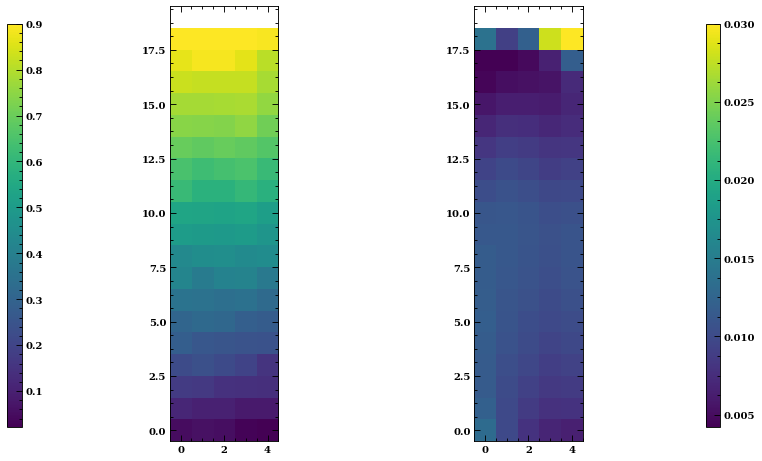

In [17]:
fig, (ax1,ax2) = plt.subplots(figsize=(10,8), ncols=2)
pic = ax1.imshow(result.T,origin='lower',vmax=0.9)

cb_ax = fig.add_axes([0., 0.15, 0.02, 0.7])
cbar = fig.colorbar(pic, cax=cb_ax)
# fig.colorbar(pic,ax=ax1)

pic2 = ax2.imshow(result_err.T,origin='lower',vmax=0.03)
cb_ax = fig.add_axes([0.97, 0.15, 0.02, 0.7])
cbar2 = fig.colorbar(pic2, cax=cb_ax)

In [20]:
np.arange(1,12,2).shape

(6,)

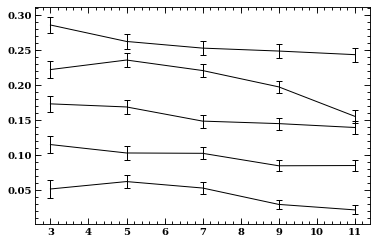

In [25]:
for w in range(5): 
    plt.errorbar(np.arange(2,12,2)+1,result[:,w],yerr=result_err[:,w])

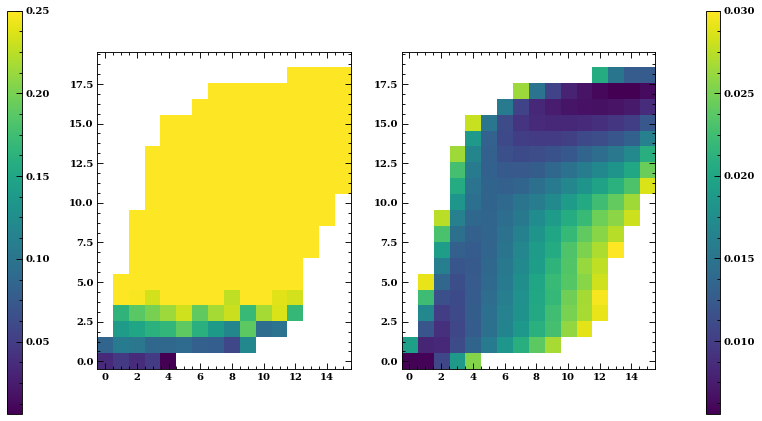

In [44]:
fig, (ax1,ax2) = plt.subplots(figsize=(10,8), ncols=2)
pic = ax1.imshow(r.T,origin='lower',vmax=0.25)

cb_ax = fig.add_axes([0., 0.15, 0.02, 0.7])
cbar = fig.colorbar(pic, cax=cb_ax)
# fig.colorbar(pic,ax=ax1)

pic2 = ax2.imshow(r_err.T,origin='lower',vmax=0.03)
cb_ax = fig.add_axes([0.97, 0.15, 0.02, 0.7])
cbar2 = fig.colorbar(pic2, cax=cb_ax)

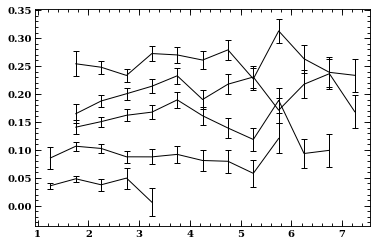

In [45]:
for w in range(5): 
    plt.errorbar(np.linspace(1,8.5,16)+0.25,r[:,w],yerr=r_err[:,w])

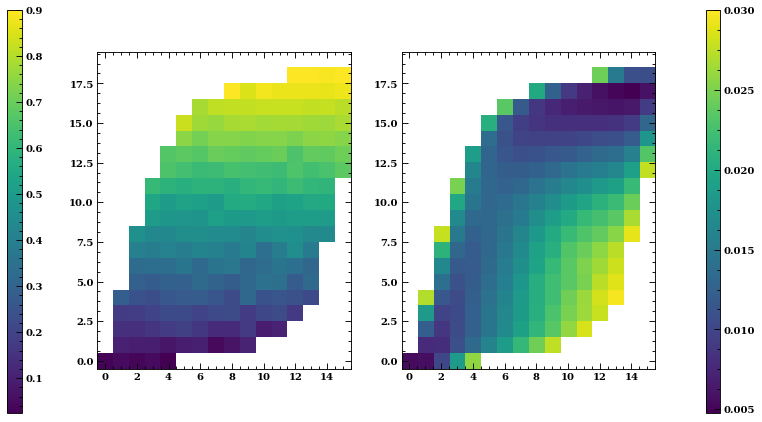

In [28]:
fig, (ax1,ax2) = plt.subplots(figsize=(10,8), ncols=2)
pic = ax1.imshow(r.T,origin='lower',vmax=0.9)

cb_ax = fig.add_axes([0., 0.15, 0.02, 0.7])
cbar = fig.colorbar(pic, cax=cb_ax)
# fig.colorbar(pic,ax=ax1)

pic2 = ax2.imshow(r_err.T,origin='lower',vmax=0.03)
cb_ax = fig.add_axes([0.97, 0.15, 0.02, 0.7])
cbar2 = fig.colorbar(pic2, cax=cb_ax)

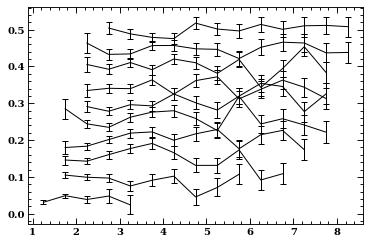

In [38]:
for w in range(10): 
    plt.errorbar(np.linspace(1,8.5,16)+0.25,r[:,w],yerr=r_err[:,w])

In [40]:
r = np.where(result_err > 0.03,np.nan,result)
r = np.where(r > 1,np.nan,r)

r_err = np.where(result_err > 0.03,np.nan,result_err)
r_err = np.where(r > 1,np.nan,r_err)

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


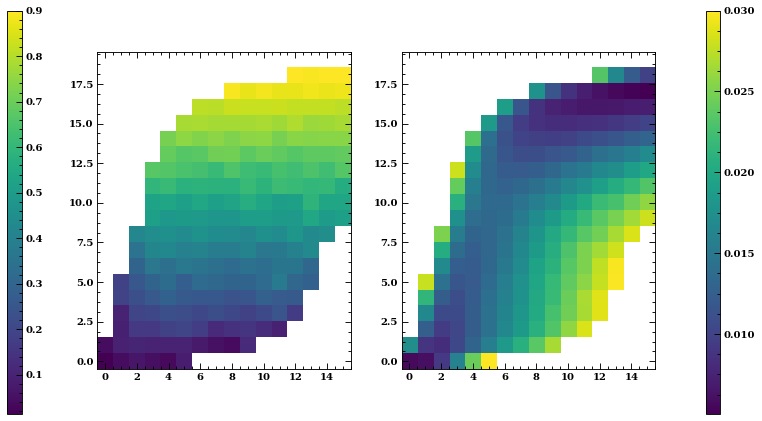

In [246]:
fig, (ax1,ax2) = plt.subplots(figsize=(10,8), ncols=2)
pic = ax1.imshow(r.T,origin='lower',vmax=0.9)

cb_ax = fig.add_axes([0., 0.15, 0.02, 0.7])
cbar = fig.colorbar(pic, cax=cb_ax)
# fig.colorbar(pic,ax=ax1)

pic2 = ax2.imshow(r_err.T,origin='lower',vmax=0.03)
cb_ax = fig.add_axes([0.97, 0.15, 0.02, 0.7])
cbar2 = fig.colorbar(pic2, cax=cb_ax)

In [249]:
np.linspace(1,8.5,16)+0.25

array([1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25, 5.75, 6.25,
       6.75, 7.25, 7.75, 8.25, 8.75])

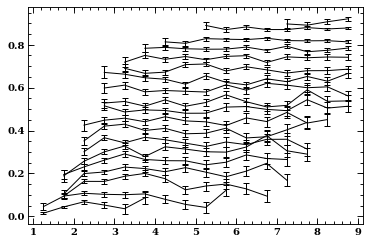

In [258]:
for w in range(19): 
    plt.errorbar(np.linspace(1,8.5,16)+0.25,r[:,w],yerr=r_err[:,w])

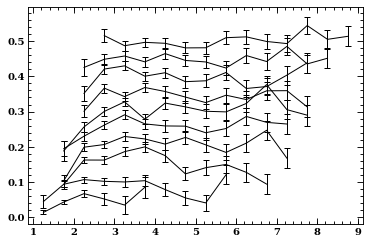

In [261]:
for w in range(10): 
    plt.errorbar(np.linspace(1,8.5,16)+0.25,r[:,w],yerr=r_err[:,w])

In [202]:
result

array([[0.02904831, 0.08320971, 0.08965686, 0.10492967, 0.18519193,
        0.17883738, 0.22875918, 0.30577613, 0.32377833, 0.30434611,
        0.27477707, 0.4657639 , 0.59637808, 1.99999992, 2.00000005,
               nan,        nan,        nan,        nan,        nan],
       [0.06250231, 0.10536269, 0.16267776, 0.2027173 , 0.24757884,
        0.28285369, 0.34278094, 0.39817118, 0.44151657, 0.51546091,
        0.52886676, 0.59863434, 0.66916334, 0.62341555, 0.71098074,
        0.94228993,        nan,        nan,        nan,        nan],
       [0.03610704, 0.10132951, 0.19133456, 0.22647079, 0.27929039,
        0.30557122, 0.35396466, 0.41561819, 0.44914045, 0.49145587,
        0.52311771, 0.59331736, 0.65232002, 0.67464356, 0.74151364,
        0.78633891, 0.77623896, 0.9468119 ,        nan,        nan],
       [0.033294  , 0.06852656, 0.15215137, 0.21543731, 0.25902966,
        0.31899229, 0.34985529, 0.39895594, 0.45554491, 0.48744234,
        0.52880963, 0.58469362, 0.62732684, 0

Text(0,0.5,'$\\mu$')

/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


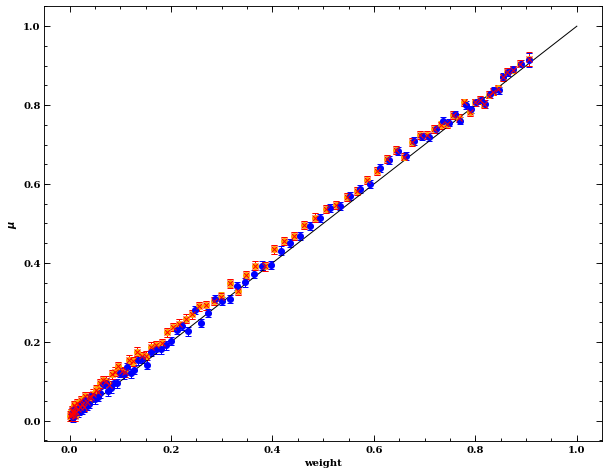

In [16]:
_, ax1 = plt.subplots(figsize=(10,8), ncols=1)
ax1.errorbar(ws3,predicted_mu3, yerr=err3, fmt='o',color='orange')
ax1.errorbar(ws4,predicted_mu4, yerr=err4, fmt='o',color='b')
ax1.errorbar(ws3,recovered_mu3, yerr=err3, fmt='x',color='red')
ax1.plot(np.linspace(0,1,100),np.linspace(0,1,100))
# ax1.set_xlim(-0.01,0.1)
# ax1.set_ylim(-0.01,0.1)


ax1.set_xlabel("weight")
ax1.set_ylabel(r"$\mu$")

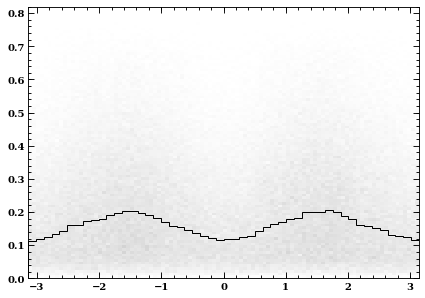

In [177]:
cut = (data['ENERGY'] <= 3) * (data['ENERGY'] >= 2.25)
_,ax = plt.subplots(figsize=(7,5),)
hist = ax.hist2d(data['NN_PHI'][cut],data['NN_WEIGHT'][cut]*data['NN_WEIGHT_EPIS'][cut],bins=(100,100),cmap=plt.cm.binary,vmax=500)
hsit = ax.hist(data['NN_PHI'][cut],histtype='step',density=True)
# ax.set_ylim(0,0.4)

In [2]:
from scipy.stats import vonmises
from scipy.optimize import fsolve

In [96]:
K = [20,19,0.5]

0.2300507458005626 0.1904881568657668


/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


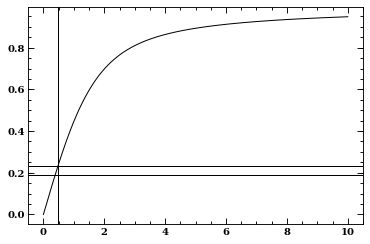

In [97]:
k1 = 1/(1/K[0] + 1/K[1] + 1/K[2])
R2 = (weightVM(1/np.sqrt(K[0]))*weightVM(1/np.sqrt(K[1]))*weightVM(1/np.sqrt(K[2])))
func2 = lambda k: weightVM(1/np.sqrt(k)) - R2  
R3 = weightVM(1/np.sqrt(K[0])) + weightVM(1/np.sqrt(K[1])) + weightVM(1/np.sqrt(K[2])) - 2
func3 = lambda k: weightVM(1/np.sqrt(k)) - R3  

x = np.linspace(0,10,500)
plt.plot(x,weightVM(1/np.sqrt(x)))
plt.axhline(R2)
plt.axhline(R3)
plt.axvline(k1)
print(R2,R3)

In [98]:
k2 = fsolve(func2,k1)[0]
k3 = fsolve(func3,k1)[0]
print(k1,k2,k3)

0.4755944931163955 0.4728420137031589 0.3881048003023131


(array([0.09271184, 0.10265947, 0.09828251, 0.08714117, 0.09788461,
        0.11658614, 0.11141337, 0.12096309, 0.11897357, 0.12454423,
        0.13329814, 0.14523529, 0.13966462, 0.16393682, 0.17468025,
        0.17627187, 0.18263835, 0.19218807, 0.2025336 , 0.2272037 ,
        0.20611474, 0.2355597 , 0.22959113, 0.22600999, 0.23396808,
        0.23794713, 0.24670104, 0.23396808, 0.23675342, 0.23436599,
        0.21646027, 0.20492103, 0.20929798, 0.19775874, 0.19099435,
        0.15757034, 0.1623452 , 0.15319339, 0.14165415, 0.13369605,
        0.13608348, 0.11499452, 0.12892119, 0.10942385, 0.10027204,
        0.09788461, 0.10703642, 0.09589508, 0.0807747 , 0.0891307 ]),
 array([-3.14141300e+00, -3.01575483e+00, -2.89009667e+00, -2.76443850e+00,
        -2.63878034e+00, -2.51312217e+00, -2.38746401e+00, -2.26180584e+00,
        -2.13614768e+00, -2.01048951e+00, -1.88483135e+00, -1.75917318e+00,
        -1.63351502e+00, -1.50785685e+00, -1.38219869e+00, -1.25654052e+00,
        -1.130

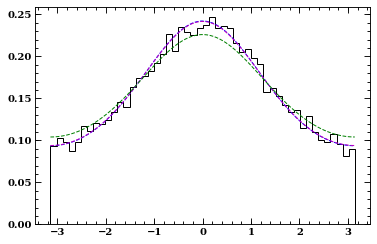

In [99]:
Y = vonmises.rvs(kappa=K[0],loc=0,size=20000) + vonmises.rvs(kappa=K[1],loc=0,size=20000) + vonmises.rvs(kappa=K[2],loc=0,size=20000)
x = np.linspace(-np.pi,np.pi,100)
# plt.plot(x,vonmises.pdf(x,1,0,))
# plt.plot(x,vonmises.pdf(x,3,0,),'r-')
plt.plot(x,vonmises.pdf(x,k1,0,),'b--')
plt.plot(x,vonmises.pdf(x,k2,0,),'m--')
plt.plot(x,vonmises.pdf(x,k3,0,),'g--')
# plt.xlim(-0.5,0.5)

plt.hist(pi_pi(Y),histtype='step',density=True)

Text(0,0.5,'NN_K_EPIS')

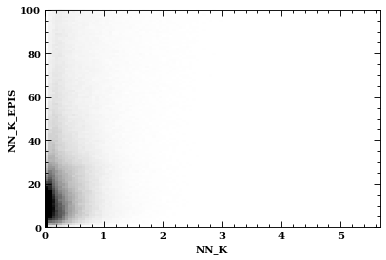

In [87]:
cut = data['NN_SIGMA_EPIS'] >= 0.1
plt.hist2d(1/data['NN_SIGMA'][cut]**2,1/data['NN_SIGMA_EPIS'][cut]**2,bins=(100,100),cmap=plt.cm.binary,vmax=2000)
plt.xlabel('NN_K')
plt.ylabel('NN_K_EPIS')

/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


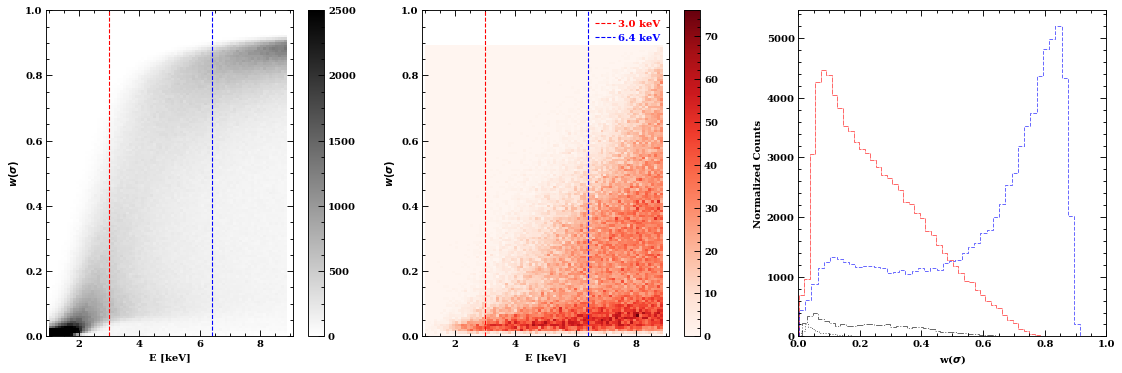

In [91]:
name = "weight_dist_bess_rec"
#X,Y = np.load("plots/" + name + ".npy",allow_pickle=True)
X = data['ENERGY']
Y = weightVM(data['NN_SIGMA'])
# Y = np.sqrt(np.mean(np.reshape(Y1**2,[len(Y1),-1]),axis=1))
# cut = (Y <= 2*np.pi) * ~np.isnan(X)
# X = X[cut]
# Y = Y[cut]

cut = (data['XYZ_ABS'][:,-1] <= 0.832) #+ (data['XYZ_ABS'][:,-1] >= 10.83)
X2 = data['ENERGY'][cut]
Y2 = weightVM(data['NN_SIGMA'])[cut]

fig,(ax1,ax2, ax3) = plt.subplots(figsize=(19,6),ncols=3,gridspec_kw={"wspace":0.22})
e = 3.0
e2 = 6.4

# plt.subplot(211)
hist = ax1.hist2d(X, Y, bins=(80, 120), 
                  cmap=plt.cm.binary,vmax=2500)
ax1.set_ylim((0.0,1))
ax1.set_xlim((0.9,9.1))
# hist2 = ax1.hist2d(X2, Y2, bins=(80, 120), 
#                   cmap=plt.cm.Reds,)
# ax1.scatter(X2,Y2,alpha=0.01,color='r')
ax1.axvline(e,linestyle="--",color='r',label=r"{} keV".format(e),linewidth=1.1)
ax1.axvline(e2,linestyle="--",color='b',label=r"{} keV".format(e2),linewidth=1.1)
fig.colorbar(hist[3],ax=ax1)

ax1.set_xlabel(r"E [keV]",fontweight='bold')
ax1.set_ylabel(r"$w(\sigma)$",fontweight="bold")


hist2 = ax2.hist2d(X2, Y2, bins=(80, 120), 
                  cmap=plt.cm.Reds,)
# ax1.scatter(X2,Y2,alpha=0.01,color='r')
ax2.axvline(e,linestyle="--",color='r',label=r"{} keV".format(e),linewidth=1.1)
ax2.axvline(e2,linestyle="--",color='b',label=r"{} keV".format(e2),linewidth=1.1)
fig.colorbar(hist2[3],ax=ax2)

ax2.set_xlabel(r"E [keV]",fontweight='bold')
ax2.set_ylabel(r"$w(\sigma)$",fontweight="bold")
ax2.set_ylim((0.0,1))
ax2.set_xlim((0.9,9.1))


cut = (np.round(X,3) <= e+0.1) * (np.round(X,3) >= e-0.1)
cut2 = (np.round(X,3) <= e2+0.1) *(np.round(X,3) >= e2-0.1)
hist = ax3.hist(Y[cut], bins=45,density=False,color='r',
                alpha=0.58, label=r"{} keV".format(e),histtype="step", linestyle=(0, (5, 1)))
hist2 = ax3.hist(Y[cut2], bins=45,density=False,color='b',
                 alpha=0.58, label=r"{} keV".format(e2),histtype="step")

cut = (np.round(X2,3) <= e+0.1) * (np.round(X2,3) >= e-0.1)
cut2 = (np.round(X2,3) <= e2+0.1) *(np.round(X2,3) >= e2-0.1)
ax3.hist(Y2[cut], bins=45,density=False,color='k',
                 alpha=0.58, label=r"{} keV".format(e),histtype="step")
ax3.hist(Y2[cut2], bins=45,density=False,color='k',
                 alpha=0.58, label=r"{} keV".format(e2),histtype="step")
ax3.set_xlim((0.0,1))
leg = ax2.legend(loc = 1,)

ax3.set_xlabel(r"w($\sigma$)",fontweight="bold")
ax3.set_ylabel(r"Normalized Counts",fontweight='bold')

for color, text in zip(["r","b"],leg.get_texts()):
    text.set_color(color)

# plt.savefig("plots/" + name + ".pdf",format="pdf")
# np.save("plots/" + name, (X,Y))

/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


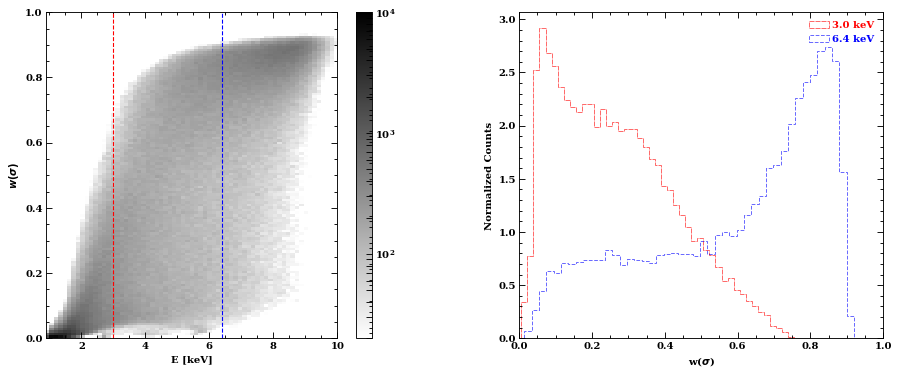

In [35]:
name = "weight_dist_bess_rec"
#X,Y = np.load("plots/" + name + ".npy",allow_pickle=True)
X = energies_processed
errors_epis_spec = circular_std(angles,axis=(1,2))
angles_NN_spec = circular_mean(angles,axis=(1,2))
Y1 = np.sqrt(errors.T**2 + 4*errors_epis_spec**2).T
Y = np.sqrt(np.mean(Y1**2,axis=(1,2)))
Y = weightVM(Y)
# Y = np.sqrt(np.mean(np.reshape(Y1**2,[len(Y1),-1]),axis=1))
cut = (Y <= 2*np.pi) * ~np.isnan(X)
X = X[cut]
Y = Y[cut]

fig,(ax1,ax2) = plt.subplots(figsize=(15,6),ncols=2,gridspec_kw={"wspace":0.3})
e = 3.0
e2 = 6.4

# plt.subplot(211)
hist = ax1.hist2d(X, Y, bins=(80, 120), 
                  cmap=plt.cm.binary,norm=LogNorm(vmin=20,vmax=10000))
ax1.set_ylim((0.0,1))
ax1.set_xlim((0.9,10))
ax1.axvline(e,linestyle="--",color='r',label=r"{} keV".format(e),linewidth=1.1)
ax1.axvline(e2,linestyle="--",color='b',label=r"{} keV".format(e2),linewidth=1.1)
fig.colorbar(hist[3],ax=ax1)

ax1.set_xlabel(r"E [keV]",fontweight='bold')
ax1.set_ylabel(r"$w(\sigma)$",fontweight="bold")
# leg = ax1.legend(loc = 1,)
# for line, text in zip(leg.get_lines(), leg.get_texts()):
#     text.set_color(line.get_color())


cut = (np.round(X,3) <= e+0.1) * (np.round(X,3) >= e-0.1)
cut2 = (np.round(X,3) <= e2+0.1) *(np.round(X,3) >= e2-0.1)
hist = ax2.hist(Y[cut], bins=45,density=True,color='r',
                alpha=0.58, label=r"{} keV".format(e),histtype="step", linestyle=(0, (5, 1)))
hist2 = ax2.hist(Y[cut2], bins=45,density=True,color='b',
                 alpha=0.58, label=r"{} keV".format(e2),histtype="step")
ax2.set_xlim((0.0,1))
leg = ax2.legend(loc = 1,)

ax2.set_xlabel(r"w($\sigma$)",fontweight="bold")
ax2.set_ylabel(r"Normalized Counts",fontweight='bold')

for color, text in zip(["r","b"],leg.get_texts()):
    text.set_color(color)

plt.savefig("plots/" + name + ".pdf",format="pdf")
np.save("plots/" + name, (X,Y))

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


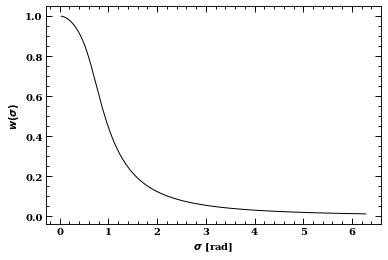

In [36]:
x = np.linspace(0,2*np.pi,1000)
plt.plot(x,weightVM(x))
plt.ylabel(r'$w(\sigma)$')
plt.xlabel(r'$\sigma$ [rad]')
plt.savefig("plots/" + "bessel" + ".pdf",format="pdf")

In [8]:
import copy as cp

In [9]:
energies_processed = cp.deepcopy(energies)
energies_processed[energies_sim >= 6.6] = highE_correct(energies_processed[energies_sim >= 6.6])
energies_processed[energies_sim <= 1.5] = lowE_correct(energies_processed[energies_sim <= 1.5])

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


(array([5.600e+01, 3.500e+01, 2.800e+01, 2.800e+01, 4.600e+01, 3.200e+01,
        3.900e+01, 6.700e+01, 5.700e+01, 4.800e+01, 7.000e+01, 6.900e+01,
        8.700e+01, 7.300e+01, 9.200e+01, 8.200e+01, 8.600e+01, 7.900e+01,
        9.000e+01, 1.540e+02, 2.520e+02, 4.270e+02, 7.880e+02, 1.296e+03,
        2.001e+03, 2.636e+03, 3.227e+03, 3.513e+03, 3.305e+03, 2.770e+03,
        2.182e+03, 1.530e+03, 9.290e+02, 6.040e+02, 3.590e+02, 2.210e+02,
        1.380e+02, 7.600e+01, 5.800e+01, 3.900e+01, 3.000e+01, 2.000e+01,
        7.000e+00, 3.000e+00, 7.000e+00, 1.000e+00, 6.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00]),
 array([1.08176732, 1.20489798, 1.32802864, 1.4511593 , 1.57428996,
        1.69742062, 1.82055128, 1.94368194, 2.0668126 , 2.18994326,
        2.31307392, 2.43620458, 2.55933524, 2.6824659 , 2.80559656,
        2.92872722, 3.05185788, 3.17498854, 3.2981192 , 3.42124986,
        3.54438052, 3.66751118, 3.79064184, 3.9137725 , 4.03690316,
        4.16003382, 4.28316448, 4.40

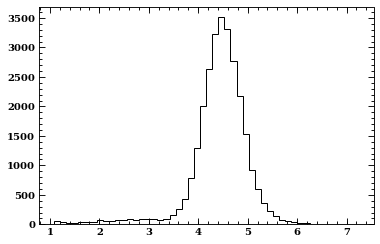

In [8]:
plt.hist(energies_processed[energies_sim==4.5][~np.isnan(energies_processed[energies_sim==4.5])],histtype="step")

In [9]:
stokes(angles_sim[:50000])

(0.9995399766763697, -1.5706984258451915)

In [13]:
from scipy.special import erf

In [10]:
a = []
for sigma in np.linspace(0,1.57,100):
    x = np.random.normal(loc=angles_sim[:50000], scale=sigma, size=(50,50000))
    a.append(stokes(np.ndarray.flatten(x)))

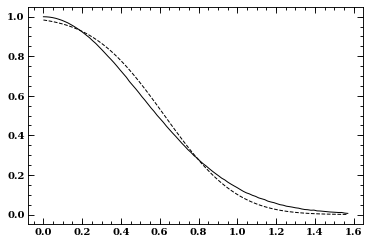

In [57]:
plt.plot(np.linspace(0,1.57,100), [r[0] for r in a])
plt.plot(np.linspace(0,1.57,100), 0.5*(1-erf(-1.5+2.4*np.linspace(0,1.57,100))))
plt.plot(np.linspace(0,1.57,100), 0.5*(1-erf(-1.5+2.4*np.linspace(0,1.57,100))))

In [37]:
x.shape

(50, 50000)

(array([1369., 1428., 1372., 1492., 1402., 1364., 1335., 1267., 1209.,
        1165., 1141., 1014., 1001.,  953.,  891.,  824.,  749.,  737.,
         706.,  650.,  644.,  619.,  641.,  567.,  538.,  535.,  550.,
         570.,  585.,  659.,  636.,  666.,  701.,  760.,  854.,  893.,
         917., 1060., 1040., 1087., 1231., 1279., 1241., 1254., 1308.,
        1371., 1404., 1416., 1451., 1454.]),
 array([-1.57078706e+00, -1.50795610e+00, -1.44512514e+00, -1.38229419e+00,
        -1.31946323e+00, -1.25663228e+00, -1.19380132e+00, -1.13097036e+00,
        -1.06813941e+00, -1.00530845e+00, -9.42477496e-01, -8.79646540e-01,
        -8.16815584e-01, -7.53984628e-01, -6.91153672e-01, -6.28322716e-01,
        -5.65491760e-01, -5.02660804e-01, -4.39829848e-01, -3.76998892e-01,
        -3.14167936e-01, -2.51336980e-01, -1.88506024e-01, -1.25675068e-01,
        -6.28441121e-02, -1.31560901e-05,  6.28177999e-02,  1.25648756e-01,
         1.88479712e-01,  2.51310668e-01,  3.14141624e-01,  3.769725

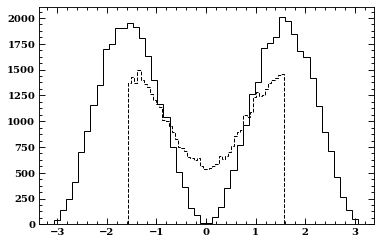

In [43]:
plt.hist(angles_sim[:50000],histtype="step")
plt.hist(angles_NN[:50000],histtype="step")

/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


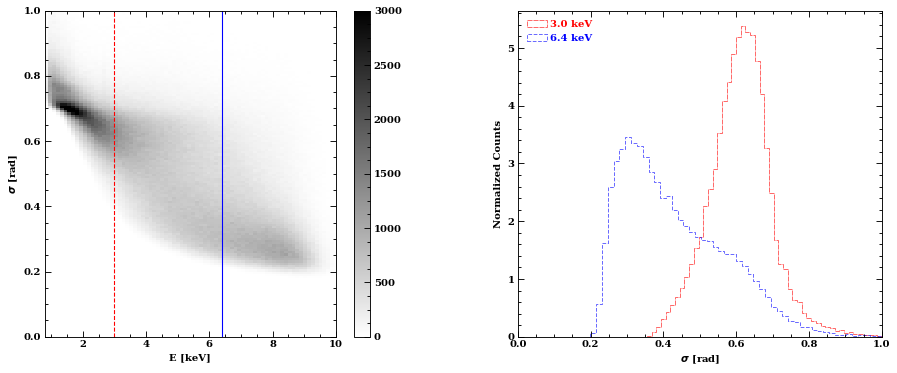

In [10]:
name = "error_dist"
#X,Y = np.load("plots/" + name + ".npy",allow_pickle=True)
X = energies_processed
Y1 = np.sqrt(errors.T**2/4 + circular_std(np.reshape(angles,[len(angles),-1]),axis=1)**2).T
Y = np.sqrt(np.mean(np.reshape(Y1**2,[len(Y1),-1]),axis=1))
cut = Y <= 1.0
angles_NN = circular_mean(angles,axis=(1,2))
angles_NN = angles_NN[cut][~np.isnan(X[cut])]
Y = Y[cut][~np.isnan(X[cut])]
X = X[cut][~np.isnan(X[cut])]


fig,(ax1,ax2) = plt.subplots(figsize=(15,6),ncols=2,gridspec_kw={"wspace":0.3})
e = 3.0
e2 = 6.4

# plt.subplot(211)
hist = ax1.hist2d(X, Y, bins=(100, 120), 
                  cmap=plt.cm.binary, vmax=3000,)
ax1.set_ylim((0.0,1.0))
ax1.set_xlim((0.8,10.0))
ax1.axvline(e,linestyle="--",color='r',label=r"{} keV".format(e),linewidth=1.1)
ax1.axvline(e2,linestyle="solid",color='b',label=r"{} keV".format(e2),linewidth=1.1)
fig.colorbar(hist[3],ax=ax1)

ax1.set_xlabel(r"E [keV]",fontweight='bold')
ax1.set_ylabel(r"$\sigma$ [rad]",fontweight="bold")
# leg = ax1.legend(loc = 1,)
# for line, text in zip(leg.get_lines(), leg.get_texts()):
#     text.set_color(line.get_color())


cut = np.round(X,1) == e
cut2 = np.round(X,1) == e2
hist = ax2.hist(Y[cut], bins=50,density=True,color='r',
                alpha=0.58, label=r"{} keV".format(e),histtype="step", linestyle=(0, (5, 1)))
hist2 = ax2.hist(Y[cut2], bins=50,density=True,color='b',
                 alpha=0.58, label=r"{} keV".format(e2),histtype="step")
ax2.set_xlim((0.0,1.0))
leg = ax2.legend(loc = 2,)

ax2.set_xlabel(r"$\sigma$ [rad]",fontweight="bold")
ax2.set_ylabel(r"Normalized Counts",fontweight='bold')

for color, text in zip(["r","b"],leg.get_texts()):
    text.set_color(color)

# plt.savefig("plots/" + name + ".pdf",format="pdf")
# np.save("plots/" + name, (X,Y))

In [21]:
stokes(angles_NN[(Y <= 0.65)*(Y >= 0.55) * (X >= 2.0) * (X <= 2.5)])

(0.25256829270012565, 1.5695092093604268)

In [22]:
stokes(angles_NN[(Y <= 0.65)*(Y >= 0.55) * (X >= 6.0) * (X <= 6.5)])

(0.32285392077297975, 1.5573310774589164)

In [23]:
print(len(angles_NN[(Y <= 0.65)*(Y >= 0.55) * (X >= 2.0) * (X <= 2.5)]))
print(len(angles_NN[(Y <= 0.65)*(Y >= 0.55) * (X >= 6.0) * (X <= 6.5)]))

54571
19270


In [24]:
np.mean(Y[(Y <= 0.65)*(Y >= 0.55) * (X >= 6.0) * (X <= 6.5)])

0.5967964804311885

In [25]:
np.mean(Y[(Y <= 0.65)*(Y >= 0.55) * (X >= 2.0) * (X <= 2.5)])

0.6144431374101109

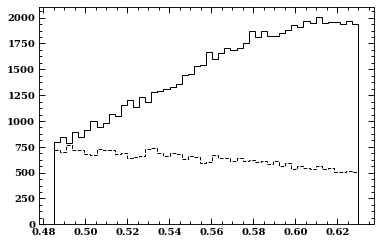

In [81]:
n, bins, _ = plt.hist(Y[(Y <= 0.63)*(Y >= 0.485) * (X >= 3.0) * (X <= 3.5)],histtype='step',density=False)
n6, bins6, _ = plt.hist(Y[(Y <= 0.63)*(Y >= 0.485) * (X >= 6.0) * (X <= 6.5)],histtype='step',density=False)


In [94]:
err2 = Y[(Y <= 0.63)*(Y >= 0.485) * (X >= 3.0) * (X <= 3.5)]
angles2 = angles_NN[(Y <= 0.63)*(Y >= 0.485) * (X >= 3.0) * (X <= 3.5)]
angles6 = angles_NN[(Y <= 0.63)*(Y >= 0.485) * (X >= 6.0) * (X <= 6.5)]
angles2_sampled = []
for i,(b1,b2) in enumerate(zip(bins[:-1],bins[1:])):
    subset = angles2[(err2 >= b1)*(err2 <= b2)]
    angles2_sampled.extend(subset[np.random.choice(len(subset),int(n6[i]),replace=False)].tolist())

(0.4056089099324313, -1.5698967688753245)
(0.39561339670943413, 1.56708577349699)


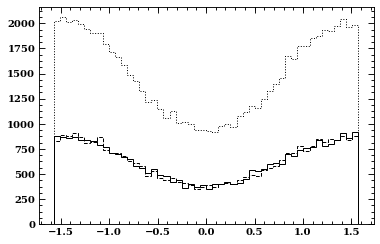

In [95]:
plt.hist(angles6,histtype='step')
plt.hist(angles2_sampled,histtype='step')
plt.hist(angles2,histtype='step')
print(stokes(np.array(angles2_sampled)))
print(stokes(angles6))

In [62]:
1/(np.sqrt(20500))

0.0069843029576957824

In [32]:
angles_NN[].shape

(2210400,)

In [ ]:
stokes[]

(0, 10)

/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


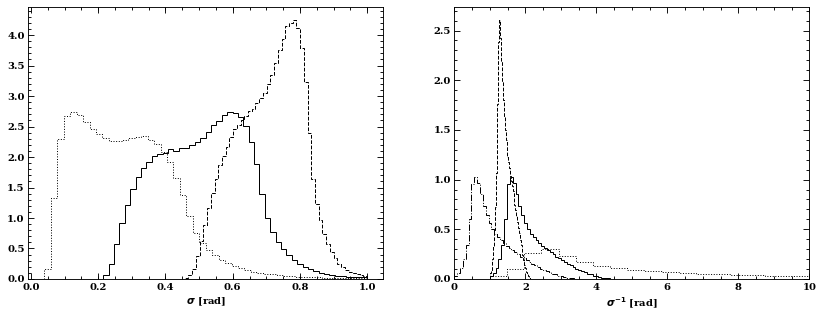

In [29]:
cut = (X <= e2) * (X >= e)
fig, (ax1,ax2) = plt.subplots(figsize=(14,5), ncols=2)

hist = ax1.hist(Y[cut], bins=50,density=True,label=r"{} keV".format(e),histtype="step")
hist = ax1.hist(Y[cut]**(1/2), bins=50,density=True,label=r"{} keV".format(e),histtype="step")
hist = ax1.hist(Y[cut]**2, bins=50,density=True,label=r"{} keV".format(e),histtype="step")
hist = ax2.hist(1/Y[cut], bins=50,density=True,label=r"{} keV".format(e),histtype="step")
hist = ax2.hist(1/Y[cut]**(1/2), bins=50,density=True,label=r"{} keV".format(e),histtype="step")
hist = ax2.hist(1/Y[cut]**2, bins=50,density=True,label=r"{} keV".format(e),histtype="step")
hist = ax2.hist(1/Y[cut] - 1, bins=50,density=True,label=r"{} keV".format(e),histtype="step")
ax1.set_xlabel(r"$\sigma$ [rad]",fontweight="bold")
ax2.set_xlabel(r"$\sigma^{-1}$ [rad]",fontweight="bold")
ax2.set_xlim(0,10)

In [28]:
print(np.sum(1/Y[cut]))
print(np.sum(1/Y[cut]**(1/2)))
print(np.sum(1/Y[cut]**2))
print(np.sum(1/Y[cut] - 1))

2070757.552553795
1412013.5439674747
4749814.54578903
1087884.5525537955


In [ ]:
    Q = np.sum(2*weights**lambd*np.cos(2*angles))
    U = np.sum(2*weights**lambd*np.sin(2*angles))
    I = np.sum(weights**lambd)
    
    mu = np.sqrt(Q**2 + U**2) / I
    phi0 = 0.5*np.arctan2(U,Q)
    Neff = I**2 / np.sum(weights**(2*lambd))

In [ ]:
1 / (mu * np.sqrt(N))

In [ ]:
np.sqrt( np.sum(weights**(2*lambd)) /  (Q**2 + U**2) )

/share/software/user/open/py-matplotlib/2.1.2_py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


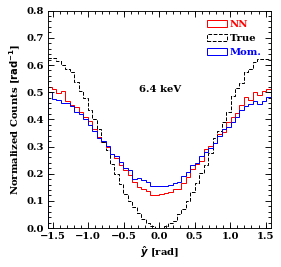

In [16]:
name = "SIRhist"
fig, ax1 = plt.subplots(figsize=(4,4))
e = E[54]
cut = (energies_sim >= e) * (energies_sim <= E[57])

hist1 = ax1.hist(circular_mean(angles[cut],axis=(1,2)),bins=50, density=True, label=r"NN",color="r",histtype="step")
hist2 = ax1.hist(pi2_pi2(angles_sim[cut]),bins=50, density=True, label=r"True",color="k",histtype="step")
hist3 = ax1.hist(pi2_pi2(angles_mom[cut]),bins=50, density=True, label=r"Mom.",color="b",histtype="step",ls='-')
leg = ax1.legend(loc=1)
ax1.set_xlabel(r"$\hat{y}$ [rad]",fontweight='bold')
ax1.set_ylabel(r"Normalized Counts [${\rm rad}^{-1}$]",fontweight='bold')
ax1.set_ylim((0.0,0.8))
ax1.set_xlim((-np.pi/2,np.pi/2))
ax1.text(-0.28,0.5,r"{} keV".format(np.round(e,2)))

for color, text in zip(["r","k","b"],leg.get_texts()):
    text.set_color(color)
    
plt.savefig("plots/" + name + ".pdf",format="pdf",pad_inches=0.5,bbox_inches="tight")

In [7]:
Y1 = (angles,angles_sim,angles_mom,energies_sim)

In [4]:
Y0 = (angles,angles_sim,angles_mom,energies_sim)

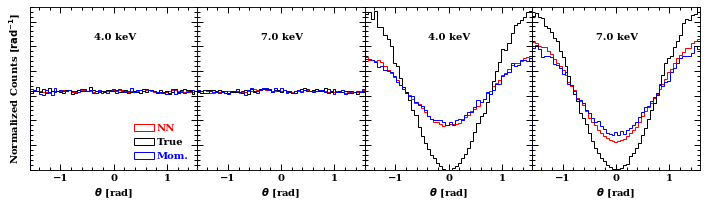

In [16]:
name = "angle01_dist_flat"
X0 = Y0[-1]
X1 = Y1[-1]

fig, ax = plt.subplots(figsize=(12,3), ncols=4, sharex=True, sharey=True, gridspec_kw={"hspace":0.0,"wspace":0.0})
(ax1,ax2,ax3,ax4) = ax.flat
e = 3.9; e1 = 4.1
e2 = 6.9; e3 = 7.1

cut = (np.round(X0,3) >= e) * (np.round(X0,3) <= e1)
hist1 = ax1.hist(pi2_pi2(np.ndarray.flatten(Y0[0][cut])),bins=57,density=True,label=r"NN",color="r",histtype="step")
hist2 = ax1.hist(pi2_pi2(Y0[1][cut]),bins=57,density=True,label=r"True",color="k",histtype="step")
hist3 = ax1.hist(pi2_pi2(Y0[2][cut]),bins=57,density=True,label=r"Mom.",color="b",histtype="step")
leg = ax1.legend(loc="lower right")
#ax1.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
ax1.set_ylabel(r"Normalized Counts [${\rm rad}^{-1}$]",fontweight='bold')
ax1.set_ylim((0.0,0.5))
ax1.annotate(r"{} keV".format(4.0), xy=(0.38, 0.8), xycoords='axes fraction')
ax1.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
ax1.minorticks_on()

cut = (np.round(X0,3) >= e2) * (np.round(X0,3) <= e3)
ax2.hist(pi2_pi2(np.ndarray.flatten(Y0[0][cut])),bins=57,density=True,label=r"NN",color="r",histtype="step")
ax2.hist(pi2_pi2(Y0[1][cut]),bins=57,density=True,label=r"True",color="k",histtype="step")
ax2.hist(pi2_pi2(Y0[2][cut]),bins=57,density=True,label=r"Mom.",color="b",histtype="step")
#ax2.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
#ax2.set_ylabel(r"Normalized Counts [$rad^{-1}$]",fontweight='bold')
ax2.annotate(r"{} keV".format(7.0), xy=(0.38, 0.8), xycoords='axes fraction')
ax2.set_ylim((0.0,0.5))
ax2.set_xlim((-np.pi/2,np.pi/2))
ax2.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
ax2.axes.yaxis.set_ticklabels([])
ax2.minorticks_on()

cut = (np.round(X1,3) >= e) * (np.round(X1,3) <= e1)
hist1 = ax3.hist(pi2_pi2(np.ndarray.flatten(Y1[0][cut])),bins=54,density=True,label=r"NN",color="r",histtype="step")
hist2 = ax3.hist(pi2_pi2(Y1[1][cut]),bins=54,density=True,label=r"True",color="k", histtype="step")
hist3 = ax3.hist(pi2_pi2(Y1[2][cut]),bins=54,density=True,label=r"Mom.",color="b",histtype="step")
#leg = ax1.legend()
ax3.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
#ax3.set_ylabel(r"Normalized Counts [${\rm rad}^{-1}$]",fontweight='bold')
ax3.set_ylim((0.0,0.66))
ax3.annotate(r"{} keV".format(4.0), xy=(0.38, 0.8), xycoords='axes fraction')
ax3.minorticks_on()

cut = (np.round(X1,3) >= e2) * (np.round(X1,3) <= e3)
ax4.hist(pi2_pi2(np.ndarray.flatten(Y1[0][cut])),bins=57,density=True,label=r"NN",color="r",histtype="step")
ax4.hist(pi2_pi2(Y1[1][cut]),bins=57,density=True,label=r"True",color="k", histtype="step")
ax4.hist(pi2_pi2(Y1[2][cut]),bins=57,density=True,label=r"Mom.",color="b",histtype="step")
ax4.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
#ax4.set_ylabel(r"p",fontweight='bold')
ax4.annotate(r"{} keV".format(7.0), xy=(0.38, 0.8), xycoords='axes fraction')
ax4.set_ylim((0.0,0.66))
ax4.axes.yaxis.set_ticklabels([])
ax4.minorticks_on()

for color, text in zip(["r","k","b"],leg.get_texts()):
    text.set_color(color)

plt.savefig("plots/" + name + ".pdf",format="pdf")

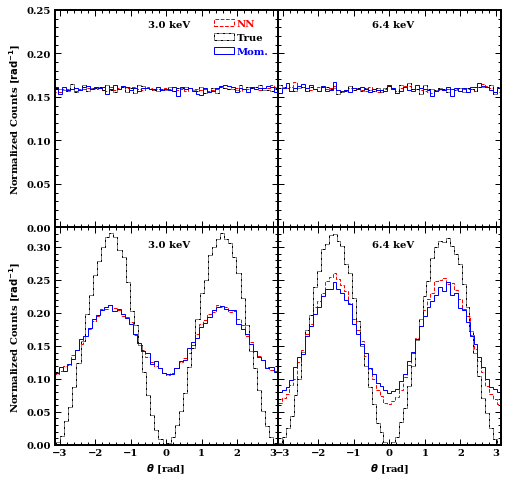

In [37]:
# name = "angle0_dist"
#X0,Y0 = np.load("plots/" + name + ".npy",allow_pickle=True)
# name = "angle1_dist"
# X1,Y1 = np.load("plots/" + name + ".npy",allow_pickle=True)
name = "angle01_dist"
# X = energies_sim * (8.2 - 1.8 ) + 1.8
# Y = [angles,angles_sim,angles_mom]
X0 = Y0[-1]
X1 = Y1[-1]

fig, ax = plt.subplots(figsize=(8,8), ncols=2,nrows=2, sharex=True, sharey=False, gridspec_kw={"hspace":0.0,"wspace":0.0})
(ax1,ax2,ax3,ax4) = ax.flat
e = 2.9; e1 = 3.1
e2 = 6.3; e3 = 6.5

cut = (np.round(X0,3) >= e) * (np.round(X0,3) <= e1)
hist1 = ax1.hist(np.ndarray.flatten(Y0[0][cut]),bins=57,density=True,label=r"NN",color="r",histtype="step",ls="--")
hist2 = ax1.hist(Y0[1][cut],bins=57,density=True,label=r"True",color="k",histtype="step",ls=(0, (3, 1, 1, 1)))
hist3 = ax1.hist(Y0[2][cut],bins=57,density=True,label=r"Mom.",color="b",histtype="step")
leg = ax1.legend()
#ax1.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
ax1.set_ylabel(r"Normalized Counts [${\rm rad}^{-1}$]",fontweight='bold')
ax1.set_ylim((0.0,0.25))
ax1.text(-0.5,0.23,r"{} keV".format(3.0))
ax1.minorticks_on()

cut = (np.round(X0,3) >= e2) * (np.round(X0,3) <= e3)
ax2.hist(np.ndarray.flatten(Y0[0][cut]),bins=57,density=True,label=r"NN",color="r",histtype="step",ls="--")
ax2.hist(Y0[1][cut],bins=57,density=True,label=r"True",color="k",histtype="step",ls=(0, (3, 1, 1, 1)))
ax2.hist(Y0[2][cut],bins=57,density=True,label=r"Mom.",color="b",histtype="step")
#ax2.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
#ax2.set_ylabel(r"Normalized Counts [$rad^{-1}$]",fontweight='bold')
ax2.text(-0.5,0.23,r"{} keV".format(6.4))
ax2.set_ylim((0.0,0.25))
ax2.set_xlim((-np.pi,np.pi))
ax2.axes.yaxis.set_ticklabels([])
ax2.minorticks_on()

cut = (np.round(X1,3) >= e) * (np.round(X1,3) <= e1)
hist1 = ax3.hist(np.ndarray.flatten(Y1[0][cut]),bins=54,density=True,label=r"NN",color="r",histtype="step",ls="--")
hist2 = ax3.hist(Y1[1][cut],bins=54,density=True,label=r"True",color="k", histtype="step",ls=(0, (3, 1, 1, 1)))
hist3 = ax3.hist(Y1[2][cut],bins=54,density=True,label=r"Mom.",color="b",histtype="step")
#leg = ax1.legend()
ax3.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
ax3.set_ylabel(r"Normalized Counts [${\rm rad}^{-1}$]",fontweight='bold')
ax3.set_ylim((0.0,0.33))
ax3.text(-0.5,0.3,r"{} keV".format(3.0))
ax3.minorticks_on()

cut = (np.round(X1,3) >= e2) * (np.round(X1,3) <= e3)
ax4.hist(np.ndarray.flatten(Y1[0][cut]),bins=57,density=True,label=r"NN",color="r",histtype="step",ls="--")
ax4.hist(Y1[1][cut],bins=57,density=True,label=r"True",color="k", histtype="step",ls=(0, (3, 1, 1, 1)))
ax4.hist(Y1[2][cut],bins=57,density=True,label=r"Mom.",color="b",histtype="step")
ax4.set_xlabel(r"$\theta$ [rad]",fontweight='bold')
#ax4.set_ylabel(r"p",fontweight='bold')
ax4.text(-0.5,0.3,r"{} keV".format(6.4))
ax4.set_ylim((0.0,0.33))
ax4.axes.yaxis.set_ticklabels([])
ax4.minorticks_on()

for color, text in zip(["r","k","b"],leg.get_texts()):
    text.set_color(color)

plt.savefig("plots/" + name + ".pdf",format="pdf")
# np.save("plots/" + name, (X,Y))

/share/software/user/open/py-scipy/1.1.0_py36/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


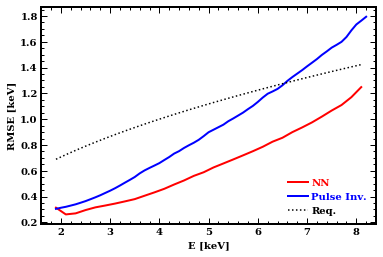

In [3]:
name = "energy"
X,Y = np.load("plots/" + name + ".npy",allow_pickle=True)
# X = [np.arange(1.9,8.3,0.2),np.arange(1.8,8.3,0.1),]
# Y = [np.sqrt(np.array(energy_acc)),np.array(E_total)]

fig, ax = plt.subplots()
ax.plot(X[0], Y[0],color='r',linewidth=2,linestyle="solid" ,label="NN")
ax.plot(X[1][1:], savgol_filter(Y[1],5,3)[1:],color='b',linewidth=2,linestyle="solid" ,label="Pulse Inv.")
ax.plot(np.arange(1.9,8.3,0.2),0.5*np.arange(1.9,8.3,0.2)**0.5,color='k',linestyle=':', label="Req.")

leg = ax.legend(loc = 4,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
ax.set_xlabel(r"E [keV]",fontweight="bold")
ax.set_ylabel(r"RMSE [keV]",fontweight="bold")
ax.set_xlim(1.6,8.4)
ax.minorticks_on()
plt.savefig("plots/" + name + ".pdf",format="pdf")

#np.save("plots/" + name, (X,Y))

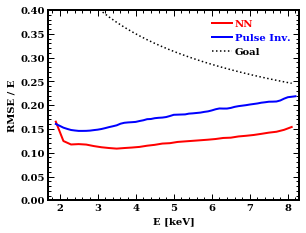

In [12]:
name = "energy_e"

fig, ax = plt.subplots(figsize=(4.5,3.5))
#ax.semilogx(x, y, 'o', label = "data")
ax.plot(X[0], Y[0] / np.arange(1.9,8.3,0.2),color='r',linewidth=2,linestyle="solid" ,label="NN")
#ax.plot(X[0], np.sqrt(np.array(energy_acc)) / np.arange(1.9,8.3,0.2),color='r',linewidth=2,linestyle="--" ,label="NN2")
ax.plot(X[1][1:], savgol_filter(Y[1],5,3)[1:] / np.arange(1.8,8.3,0.1)[1:],color='b',linewidth=2,linestyle="solid" ,label="Pulse Inv.")
ax.plot(X[0],0.7*np.arange(1.9,8.3,0.2)**0.5 / np.arange(1.9,8.3,0.2),color='k',linestyle=':', label="Goal")


leg = ax.legend(loc = 1,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
ax.set_xlabel(r"E [keV]",fontweight="bold")
ax.set_ylabel(r"RMSE / E",fontweight="bold")
ax.set_ylim(0.0,0.4)
ax.set_xlim(1.7,8.3)
ax.minorticks_on()
plt.savefig("plots/" + name + ".pdf",format="pdf")


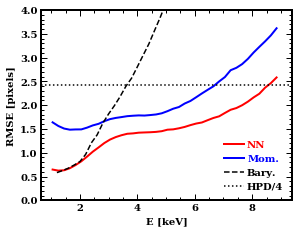

In [32]:
name = "abs_pts"
X,Y = np.load("plots/" + name + ".npy",allow_pickle=True)
#X = [np.arange(1.9,8.3,0.2),np.arange(1.8,8.3,0.1),]
#Y = [np.sqrt(np.array(abs_acc_round)),np.sqrt(np.array(abs_mom_acc)),np.array(err_round)]

fig, ax = plt.subplots(figsize=(4.5,3.5))
#ax.semilogx(x, y, 'o', label = "data")

# ax.plot(X[0], Y[0],color='r',linewidth=2,linestyle="solid",label="NN" )
# ax.plot(X[0], Y[1],color='b',linewidth=2,linestyle="solid" ,label="Mom.")

ax.plot(np.arange(1.05,9.0,0.2), abs_acc,color='r',linewidth=2,linestyle="solid",label="NN" )
# ax.plot(np.arange(1.05,9.0,0.2), abs_acc_round,color='r',linewidth=2,linestyle="--")
ax.plot(np.arange(1.05,9.0,0.2), abs_mom_acc,color='b',linewidth=2,linestyle="solid" ,label="Mom.")



#ax.plot(np.arange(1.8,8.3,0.1), np.array(err),color='k',linewidth=2,linestyle="solid" ,label="Bary.")
# ax.plot(X[1][1:], savgol_filter(Y[2][1:],5,3),color='k',linewidth=2,linestyle="--",label="Bary.")
ax.plot(np.linspace(1,9,41)[1:],savgol_filter(np.array(bar_res)[1:],7,3),"k--",label="Bary.")
# ax.plot(np.linspace(1,9,41),savgol_filter(np.array(mom_res),11,5))

ax.axhline(2.43,linestyle=":",color='k', label="HPD/4")

leg = ax.legend(loc = 4,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
ax.set_xlabel(r"E [keV]",fontweight="bold")
ax.set_ylabel(r"RMSE [pixels]",fontweight="bold")
ax.set_ylim(0.0,4.0)
# ax.set_xlim(1.7,8.3)

plt.savefig("plots/" + name + ".pdf",format="pdf")

#np.save("plots/" + name, (X,Y))


In [ ]:
name = "abs_pts_arcsec"

fig, ax = plt.subplots()
#ax.semilogx(x, y, 'o', label = "data")
#ax.plot(np.arange(1.9,8.3,0.2), np.sqrt(np.array(abs_acc)),color='r',linewidth=2,linestyle="solid",label="NN")
ax.plot(np.arange(1.9,8.3,0.2), 2.57*np.sqrt(np.array(abs_acc_round)),color='r',linewidth=2,linestyle="solid",label="NN" )
ax.plot(np.arange(1.9,8.3,0.2), 2.57*np.sqrt(np.array(abs_mom_acc)),color='b',linewidth=2,linestyle="solid" ,label="Mom.")
#ax.plot(np.arange(1.8,8.3,0.1), np.array(err),color='k',linewidth=2,linestyle="solid" ,label="Bary.")
ax.plot(np.arange(1.8,8.3,0.1)[1:], 2.57*savgol_filter(np.array(err_round)[1:],5,3),color='k',linewidth=2,linestyle="solid",label="Bary.")

ax.plot([1.5,8.5],[2.57*2.43,2.57*2.43],linestyle=":",color='k', label="HPD/4")

leg = ax.legend(loc = 4,)
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
ax.set_xlabel(r"E [keV]")
ax.set_ylabel(r"RMSE [arcsec]")
ax.set_ylim(2.0,8.0)
ax.set_xlim(1.7,8.3)
ax.minorticks_on()
plt.savefig("plots/" + name + ".pdf",format="pdf")

# data_save = np.stack(X+Y)
# np.savetxt("plots/" + name + ".txt", data_save, delimiter=',')

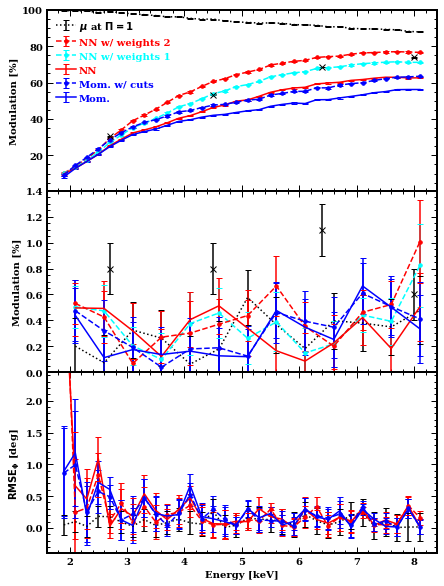

In [3]:
X, Y, Yerr, Yerr_bootstrap = np.load("plots/" + "modulation0" + ".npy", allow_pickle=True)
X1,Y1,Yerr1 = np.load("plots/" + "modulation" + ".npy",allow_pickle=True)

fig, ax = plt.subplots(nrows=3,sharex=True,gridspec_kw={"hspace":0.0},figsize=(7,10))

true_angles = Y1[2]
x_true = X1[0]
errbr0 = ax[0].errorbar(X1[0],Y1[2] ,color='k',yerr=Yerr1[2], label= r"$\mu$ at $\Pi = 1$",linestyle='dotted')
errbr1 = ax[0].errorbar(X1[0], Y1[3], yerr=Yerr1[3],color='r',linestyle='--', label=r"NN w/ weights 2",marker="o",markersize=3.5)
errbr2 = ax[0].errorbar(X1[0], Y1[5], yerr=Yerr1[3],color='cyan',linestyle='--', label=r"NN w/ weights 1",marker="o",markersize=3.5)
#errbr3 = ax[0].errorbar(X1[0], Y1[6], yerr=Yerr1[3],color='m',linestyle='--', label=r"NN w/ weights 3",marker="o",markersize=3.5)
errbr4 = ax[0].errorbar(X1[0],Y1[0] ,color='r',yerr=Yerr1[0], label= r"NN",linestyle='solid')
errbr5 = ax[0].errorbar(X1[0],Y1[4], yerr=Yerr1[4],color='b',linestyle='--', label=r"Mom. w/ cuts",fmt="o",markersize=3.5)
errbr6 = ax[0].errorbar(X1[0],Y1[1] , color='b',yerr=Yerr1[1], label= r"Mom.",linestyle='solid')

ax[0].errorbar(2.7, 30.5, yerr=0.2, marker="x", markersize="6",color="k")
ax[0].errorbar(4.5, 53.4, yerr=0.2, marker="x", markersize="6",color="k")
ax[0].errorbar(6.4, 68.6, yerr=0.2, marker="x", markersize="6",color="k")
ax[0].errorbar(8.0, 73.8, yerr=0.2, marker="x", markersize="6",color="k")

leg = ax[0].legend(loc = 2,)
#,errbr2.lines[0],errbr3.lines[0],
lines = [errbr0.lines[0],errbr1.lines[0],errbr2.lines[0],errbr4.lines[0],errbr5.lines[0],errbr6.lines[0]]
for line, text in zip(lines, leg.get_texts()):
    text.set_color(line.get_color())
#ax[0].set_xlabel(r"Energy [keV]")
ax[0].set_ylabel(r"Modulation [%]",fontweight="bold")
ax[0].set_ylim(0.5,100.0)
ax[0].set_xlim(1.6,8.4)
ax[0].minorticks_on()

errbr0 = ax[1].errorbar(X[0],Y[2] ,color='k',yerr=Yerr[2], label= r"$\mu$ at $\Pi = 0$",linestyle='dotted')
errbr1 = ax[1].errorbar(X[0], Y[5], yerr=Yerr_bootstrap[0],color='cyan',linestyle='--', label=r"NN w/ weights 1",marker="o",markersize=3.5)
#errbr2 = ax[1].errorbar(X[0], Y[6], yerr=Yerr_bootstrap[0],color='m',linestyle='--', label=r"NN w/ weights 3",marker="o",markersize=3.5)
errbr3 = ax[1].errorbar(X[0], Y[3], yerr=Yerr_bootstrap[0],color='r',linestyle='--', label=r"NN w/ weights 2",marker="o",markersize=3.5)
errbr4 = ax[1].errorbar(X[0],Y[0] ,color='r',yerr=Yerr[0], label= r"NN",linestyle='solid')
errbr5 = ax[1].errorbar(X[0],Y[4], yerr=Yerr[4],color='b',linestyle='--', label=r"Mom. w/ cuts",fmt="o",markersize=3.5)
errbr6 = ax[1].errorbar(X[0],Y[1] , color='b',yerr=Yerr[1], label= r"Moments",linestyle='solid')

ax[1].errorbar(2.7, 0.8, yerr=0.2, marker="x", markersize="6",color="k")
ax[1].errorbar(4.5, 0.8, yerr=0.2, marker="x", markersize="6",color="k")
ax[1].errorbar(6.4, 1.1, yerr=0.2, marker="x", markersize="6",color="k")
ax[1].errorbar(8.0, 0.6, yerr=0.2, marker="x", markersize="6",color="k")

#ax[1].set_xlabel(r"Energy [keV]",fontweight="bold")
ax[1].set_ylabel(r"Modulation [%]",fontweight="bold")
ax[1].set_ylim(0.0,1.4)
ax[1].set_xlim(1.6,8.4)
ax[1].minorticks_on()

name = "phi"
X,Y,Yerr,Yerr_bootstrap = np.load("plots/" + name + ".npy",allow_pickle=True)

errbr0 = ax[2].errorbar(X[0],Y[2]  ,color='k',yerr=Yerr[2], label= r"$\mu$ at $\Pi = 1$",linestyle='dotted')
errbr1 = ax[2].errorbar(X[0], Y[3], yerr=Yerr_bootstrap[0] ,color='r',linestyle='--', label=r"NN w/ weights", marker='o',markersize=3.5)
errbr2 = ax[2].errorbar(X[0],Y[0] ,color='r',yerr=Yerr_bootstrap[0], label= r"NN",linestyle='solid')
errbr3 = ax[2].errorbar(X[0],Y[4], yerr=Yerr_bootstrap[0],color='b',linestyle='--', label=r"Mom. w/ cuts",marker='o',markersize=3.5)
errbr4 = ax[2].errorbar(X[0],Y[1] , color='b',yerr=Yerr_bootstrap[0], label= r"Moments",linestyle='solid')
ax[2].set_xlabel(r"Energy [keV]",fontweight="bold")
ax[2].set_ylabel(r"$\rm{RMSE_{\phi}}$ [deg]",fontweight="bold")
# ax.set_ylim(0.0,6)
ax[2].set_xlim(1.6,8.4)
ax[2].set_ylim(-0.4,2.45)
ax[2].minorticks_on()


#plt.savefig("plots/" + "modulation_joint3" + ".pdf",format="pdf")

## Miscellaneous

In [7]:
df = pd.read_pickle("/home/groups/rwr/alpv95/tracksml/besselall.pickle")

In [8]:
df

733bessel1/models/RLRP_1024_131.ptmodel  \
0                              2365.937256   
1                                 1.149488   
2                                 1.366243   
3                                 1.067903   
4                                 1.120745   
5                                 0.002201   
6                                 0.003931   
7                                 0.000774   
8                                 0.000450   
9                                 0.570529   

   733bessel1/models/mom_2048_111.ptmodel  \
0                             3052.861572   
1                                1.136063   
2                                1.407848   
3                                1.061510   
4                                1.164106   
5                                0.002125   
6                                0.003958   
7                                0.000369   
8                                0.000450   
9                                0.536862   

   733bessel1/models/mom_1024_131.ptmodel  \
0                             1541.142700   
1                                1.134898   
2                                1.444152   
3                                1.061876   
4                                1.193052   
5                                0.003340   
6                                0.004626   
7                                0.000249   
8                                0.000450   
9                                0.533438   

   733bessel1/models/mom_2048_131.ptmodel  \
0                             1167.176514   
1                                1.135929   
2                                1.437681   
3                                1.061732   
4                                1.185939   
5                                0.002084   
6                                0.004070   
7                                0.000429   
8                                0.000450   
9                                0.536644   

   733bessel1/models/RLRP_2048_151.ptmodel  \
0                              1419.505249   
1                                 1.139353   
2                                 1.426993   
3                                 1.059969   
4                                 1.170531   
5                                 0.001286   
6                                 0.003528   
7                                 0.000655   
8                                 0.000450   
9                                 0.547071   

   733bessel1/models/RLRP_512_91.ptmodel  \
0                            3149.018311   
1                               1.134464   
2                               1.395238   
3                               1.060126   
4                               1.149496   
5                               0.003251   
6                               0.004100   
7                               0.000153   
8                               0.000450   
9                               0.532837   

   733bessel1/models/RLRP_512_131.ptmodel  \
0                             1466.711914   
1                                1.134344   
2                                1.400114   
3                                1.058940   
4                                1.152683   
5                                0.003280   
6                                0.004156   
7                                0.000109   
8                                0.000450   
9                                0.532467   

   733bessel1/models/mom_2048_91.ptmodel  \
0                            5018.811035   
1                               1.142434   
2                               1.420164   
3                               1.065044   
4                               1.171312   
5                               0.002578   
6                               0.004059   
7                               0.000664   
8                               0.000450   
9                               0.540067   

   733bessel1/models/RLRP_2048_171.

In [9]:
net_set = set()
net_list = []

# nets = (df.loc[0] * df.loc[7] * df.loc[14] * df.loc[21] * df.loc[28] * df.loc[35] * df.loc[42] * df.loc[49] *
#        df.loc[3] * df.loc[10] * df.loc[17] * df.loc[24] * df.loc[31] * df.loc[38] * df.loc[45] * df.loc[52] *
#        df.loc[4] * df.loc[11] * df.loc[18] * df.loc[25] * df.loc[32] * df.loc[39] * df.loc[46] * df.loc[53]).sort_values().keys().to_list()

nets = (df.loc[1] * df.loc[2] * df.loc[3] * df.loc[4] ).sort_values().keys().to_list()

for i,net in enumerate(nets):
#     if "flat" not in net:
#         continue
    if net[:-11] not in net_set:
        net_set.add(net[:-11])
        net_list.append(net)
print("Best:",np.sort(df.loc[1])[1])
print("Worst:",np.sort(df.loc[1])[i])
print("Best:",np.sort(df.loc[2])[1])
print("Worst:",np.sort(df.loc[2])[i])
print(len(net_list))

Best: 1.130698800086975
Worst: 1.1610296964645386
Best: 1.3268569559286172
Worst: 1.5979616504860805
43


In [ ]:
'733bessel2/models/mom_1024_171.ptmodel',
 '733bessel2/models/mom_2048_171.ptmodel',
 '733bessel3/models/RLRP_2048_151.ptmodel',
 '733bessel3/models/mom_2048_171.ptmodel',
 '733bessel1/models/RLRP_512_191.ptmodel',
 '733bessel2/models/mom_512_151.ptmodel',
 '733bessel1/models/RLRP_4096_131.ptmodel',
 '733bessel3/models/RLRP_1024_191.ptmodel',
 '733bessel1/models/mom_2048_171.ptmodel',
 '733bessel2/models/RLRP_4096_131.ptmodel',

In [ ]:
'733bessel2/models/RLRP_1024_131.ptmodel',
 '733bessel2/models/mom_4096_171.ptmodel',
 '733bessel2/models/mom_512_111.ptmodel',
 '733bessel1/models/RLRP_512_191.ptmodel',
 '733bessel1/models/RLRP_1024_131.ptmodel',
 '733bessel3/models/RLRP_512_131.ptmodel',
 '733bessel1/models/RLRP_2048_191.ptmodel',
 '733bessel3/models/mom_2048_111.ptmodel',
 '733bessel3/models/mom_4096_151.ptmodel',
'733bessel2/models/mom_1024_171.ptmodel',

In [11]:
from random import shuffle

In [14]:
shuffle(net_list)

In [ ]:
'733bessel3/models/mom_1024_91.ptmodel',
 '733bessel3/models/mom_512_171.ptmodel',
 '733bessel1/models/mom_1024_91.ptmodel',
 '733bessel2/models/RLRP_512_91.ptmodel',
 '733bessel2/models/mom_4096_171.ptmodel',
 '733bessel1/models/RLRP_1024_131.ptmodel',
 '733bessel2/models/RLRP_2048_91.ptmodel',
 '733bessel1/models/RLRP_4096_131.ptmodel',
 '733bessel3/models/mom_4096_151.ptmodel',
 '733bessel2/models/mom_1024_91.ptmodel',

In [15]:
net_list

['733bessel3/models/mom_1024_91.ptmodel',
 '733bessel3/models/mom_512_171.ptmodel',
 '733bessel1/models/mom_1024_91.ptmodel',
 '733bessel2/models/RLRP_512_91.ptmodel',
 '733bessel2/models/mom_4096_171.ptmodel',
 '733bessel1/models/RLRP_1024_131.ptmodel',
 '733bessel2/models/RLRP_2048_91.ptmodel',
 '733bessel1/models/RLRP_4096_131.ptmodel',
 '733bessel3/models/mom_4096_151.ptmodel',
 '733bessel2/models/mom_1024_91.ptmodel',
 '733bessel3/models/mom_512_91.ptmodel',
 '733bessel2/models/mom_512_111.ptmodel',
 '733bessel3/models/mom_4096_91.ptmodel',
 '733bessel2/models/mom_512_91.ptmodel',
 '733bessel1/models/mom_1024_131.ptmodel',
 '733bessel3/models/RLRP_1024_91.ptmodel',
 '733bessel2/models/RLRP_2048_111.ptmodel',
 '733bessel1/models/RLRP_4096_91.ptmodel',
 '733bessel2/models/mom_2048_111.ptmodel',
 '733bessel2/models/mom_1024_191.ptmodel',
 '733bessel3/models/mom_2048_91.ptmodel',
 '733bessel1/models/RLRP_1024_91.ptmodel',
 '733bessel2/models/RLRP_1024_131.ptmodel',
 '733bessel3/models

In [8]:
df['733bessel2/models/RLRP_1024_131.ptmodel']

0    2758.086182
1       1.158904
2       1.326857
3       1.069430
4       1.080227
5       0.003212
6       0.004500
7       0.000337
8       0.000450
9       0.586066
Name: 733bessel2/models/RLRP_1024_131.ptmodel, dtype: float64

In [12]:
df['733bessel2/models/mom_1024_171.ptmodel']

0    998.865356
1      1.130487
2      1.491465
3      1.059419
4      1.232643
5      0.002492
6      0.004226
7      0.000253
8      0.000450
9      0.534253
Name: 733bessel2/models/mom_1024_171.ptmodel, dtype: float64